# Analyse Exploratoire

### Import des modules

In [188]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from pack import utils
importlib.reload(utils)

<module 'pack.utils' from '/Users/cheick/Documents/repository/openclassrooms/projet_3/pack/utils.py'>

### Analyse Exploratoire

In [189]:
pd.set_option("display.max_columns", None)
building_consumption = pd.read_csv("data/seattle_data.csv")

In [190]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA   98,101   
1              Paramount Hotel  724 Pine street  Seattle    WA   98,101   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA   98,101   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA   98,101   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA   98,121   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN        48   
1                    0659000220                    7     DOWNTOWN        48   
2                    0659000475                    7     DOWNTOWN        48   
3                    0659000640                    7     DOWNTOWN        48   
4                    0659000970                    7     DOWNTOWN        48   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       -122       1927                  1              12             88434   
1       -122       1996                  1              11            103566   
2       -122       1969                  1              41            956110   
3       -122       1926                  1              10             61320   
4       -122       1980                  1              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                     88,434   
1                  Hotel                     83,880   
2                  Hotel                    756,493   
3                  Hotel                     61,320   
4                  Hotel                    123,445   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                           15,064   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                           68,009   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                           4,622   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                               0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN               60                82   
1                      NaN               61                95   
2                      NaN               43                96   
3                      NaN               56               111   
4                      NaN               75               115   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0                  84                 182                   189   
1                  98                 176                   179   
2

## Nettoyage du dataframe

- Notre étude est réalisé sur les batiments non destinés à l'habitation et donc nous supprimerons tous les batiments liés à l'habitation
- les colonnes qui permettent de déterminer si oui ou non un batiments est destiné à l'habitation sont:
    - BuildingType
    - PrimaryPropertyType

In [191]:
#Observons les données que peuvent prendre ces colonnes
# - BuildingType
building_consumption["BuildingType"].value_counts()
# - PrimaryPropertyType
display(building_consumption["PrimaryPropertyType"].value_counts())
display(building_consumption["PrimaryPropertyType"].value_counts())

#Liste des critères sur lesquels se baser pour supprimer des lignes
deleted_list = [
    "Multifamily",
    "Senior Care Community",
]

#supressions des individus concernés
mask = (
    building_consumption["BuildingType"].str.contains("Multifamily", na=False) |
    building_consumption["BuildingType"].str.contains("Senior Care Community", na=False) |
    building_consumption["PrimaryPropertyType"].str.contains("Multifamily", na=False) |
    building_consumption["PrimaryPropertyType"].str.contains("Senior Care Community", na=False)
)
display(f"Nombre de ligne avant supression {building_consumption.shape[0]}")
building_consumption = building_consumption[~(mask)] 
display(f"Nombre de ligne avant après {building_consumption.shape[0]}")

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

'Nombre de ligne avant supression 3376'

'Nombre de ligne avant après 1645'

- Trouver des doublons et les supprimer s'il y en a
  > Vu que nous travaillons sur des batiments, les doublons peuvent se manifester par le couple Nom du batiment, adresses

In [192]:
#Trouver les adresses qui sont en doublons
display(building_consumption[building_consumption.duplicated(subset=["PropertyName", "Address"])])

"""
    Nous n'avons donc pas de doublons
"""

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

"\n    Nous n'avons donc pas de doublons\n"

In [193]:
#On regarde le pourcentage de valeurs manquantes par colonne
column_high_na = []
for column in building_consumption.columns:
    na = utils.count_na(building_consumption, column, result_type="percent")
    if na >= 20:
        column_high_na.append(column)
    print (f"Pour {column} il y a {na}% valeurs manquantes")

print("La liste des colonnes ayant plus de 40% de valeurs manquantes")
display(column_high_na)

print("\n\n")

# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
display(building_consumption.info())


Pour OSEBuildingID il y a 0.0% valeurs manquantes
Pour DataYear il y a 0.0% valeurs manquantes
Pour BuildingType il y a 0.0% valeurs manquantes
Pour PrimaryPropertyType il y a 0.0% valeurs manquantes
Pour PropertyName il y a 0.0% valeurs manquantes
Pour Address il y a 0.0% valeurs manquantes
Pour City il y a 0.0% valeurs manquantes
Pour State il y a 0.0% valeurs manquantes
Pour ZipCode il y a 0.97% valeurs manquantes
Pour TaxParcelIdentificationNumber il y a 0.0% valeurs manquantes
Pour CouncilDistrictCode il y a 0.0% valeurs manquantes
Pour Neighborhood il y a 0.0% valeurs manquantes
Pour Latitude il y a 0.0% valeurs manquantes
Pour Longitude il y a 0.0% valeurs manquantes
Pour YearBuilt il y a 0.0% valeurs manquantes
Pour NumberofBuildings il y a 0.12% valeurs manquantes
Pour NumberofFloors il y a 0.0% valeurs manquantes
Pour PropertyGFATotal il y a 0.0% valeurs manquantes
Pour PropertyGFAParking il y a 0.0% valeurs manquantes
Pour PropertyGFABuilding(s) il y a 0.0% valeurs manquante

['SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'Comments',
 'Outlier']




<class 'pandas.core.frame.DataFrame'>
Index: 1645 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1645 non-null   int64  
 1   DataYear                         1645 non-null   int64  
 2   BuildingType                     1645 non-null   object 
 3   PrimaryPropertyType              1645 non-null   object 
 4   PropertyName                     1645 non-null   object 
 5   Address                          1645 non-null   object 
 6   City                             1645 non-null   object 
 7   State                            1645 non-null   object 
 8   ZipCode                          1629 non-null   float64
 9   TaxParcelIdentificationNumber    1645 non-null   object 
 10  CouncilDistrictCode              1645 non-null   int64  
 11  Neighborhood                     1645 non-null   object 
 12  Latitude              

None

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

### Statistiques descriptive

In [194]:
utils.category_descriptive_stat(building_consumption,[
    "BuildingType",
    "PrimaryPropertyType",
    "YearBuilt",
    "LargestPropertyUseType",
    "SecondLargestPropertyUseType",
    "ThirdLargestPropertyUseType",
])


Pour la colonne ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


effectif  fréquence
BuildingType                           
NonResidential          1438         87
SPS-District K-12         98          6
Nonresidential COS        85          5
Campus                    23          1
Nonresidential WA          1          0


Pour la colonne ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


effectif  fréquence
PrimaryPropertyType                             
Small- and Mid-Sized Office       292         18
Other                             250         15
Warehouse                         187         11
Large Office                      173         11
K-12 School                       139          8
Mixed Use Property                114          7
Retail Store                       91          6
Hotel                              76          5
Worship Facility                   71          4
Distribution Center                53          3
Supermarket / Grocery Store        40          2
Medical Office                     39          2
Self-Storage Facility              28          2
University                         24          1
Residence Hall                     21          1
Refrigerated Warehouse             12          1
Restaurant                         12          1
Hospital                           10          1
Laboratory                         10          1
Office                              3          0


Pour la colonne ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


effectif  fréquence
YearBuilt                     
1900             46          3
2000             34          2
1970             31          2
1960             30          2
1910             30          2
...             ...        ...
1939              2          0
1901              2          0
1942              2          0
1936              1          0
1935              1          0

[113 rows x 2 columns]


Pour la colonne ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


effectif  fréquence
LargestPropertyUseType                                                 
Office                                                   497         30
Non-Refrigerated Warehouse                               199         12
K-12 School                                              139          8
Retail Store                                              99          6
Other                                                     98          6
Hotel                                                     76          5
Worship Facility                                          71          4
Distribution Center                                       54          3
Supermarket/Grocery Store                                 41          2
Medical Office                                            41          2
Other - Recreation                                        31          2
Parking                                                   30          2
Self-Storage Facility                                     27          2
College/University                                        24          1
Residence Hall/Dormitory                                  22          1
Other - Entertainment/Public Assembly                     21          1
Laboratory                                                13          1
Refrigerated Warehouse                                    12          1
Restaurant                                                12          1
Hospital (General Medical & Surgical)                     10          1
Social/Meeting Hall                                       10          1
Multifamily Housing                                        9          1
Manufacturing/Industrial Plant                             8          0
Repair Services (Vehicle, Shoe, Locksmith, etc)            6          0
Strip Mall                                                 6          0
NaN                                                        6          0
Other - Lodging/Residential                                5          0
Other - Services                                           5          0
Fitness Center/Health Club/Gym                             5          0
Automobile Dealership                                      5          0
Museum                                                     5          0
Bank Branch                                                4          0
Other - Education                                          4          0
Library                                                    4          0
Urgent Care/Clinic/Other Outpatient                        4          0
Other - Mall                                               4          0
Financial Office                                           4          0
Other/Specialty Hospital                                   4          0
Performing Arts                                            3          0
Prison/Incarceration                                       3          0
Data Center                                                3          0
Lifestyle Center                                           2          0
Other - Public Services                                    2          0
Other - Restaurant/Bar                                     2          0
Adult Education                                            2          0
Other - Utility                                            2          0
Pre-school/Daycare                                         2          0
Convention Center                                          1          0
Courthouse                                                 1          0
Fire Station                                               1          0
Residential Care Facility                                  1          0
Police Station                                             1          0
Food Service                                               1          0
Movie Theater                                              1          0
Personal Services (H


Pour la colonne ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


effectif  fréquence
SecondLargestPropertyUseType                                           
NaN                                                      803         49
Parking                                                  328         20
Office                                                   167         10
Retail Store                                              84          5
Other                                                     45          3
Non-Refrigerated Warehouse                                30          2
Restaurant                                                29          2
Fitness Center/Health Club/Gym                            16          1
Data Center                                               13          1
Multifamily Housing                                       12          1
Other - Services                                          11          1
Supermarket/Grocery Store                                 10          1
Laboratory                                                 8          0
Other - Entertainment/Public Assembly                      7          0
Medical Office                                             7          0
Distribution Center                                        7          0
Bank Branch                                                6          0
K-12 School                                                5          0
Swimming Pool                                              4          0
Repair Services (Vehicle, Shoe, Locksmith, etc)            4          0
Other - Recreation                                         4          0
Worship Facility                                           3          0
Movie Theater                                              3          0
Hotel                                                      3          0
Self-Storage Facility                                      3          0
Other - Public Services                                    2          0
Manufacturing/Industrial Plant                             2          0
Food Sales                                                 2          0
Bar/Nightclub                                              2          0
Automobile Dealership                                      2          0
Other - Education                                          2          0
Other - Restaurant/Bar                                     2          0
Performing Arts                                            2          0
Refrigerated Warehouse                                     2          0
Adult Education                                            2          0
Enclosed Mall                                              1          0
Hospital (General Medical & Surgical)                      1          0
Social/Meeting Hall                                        1          0
Pre-school/Daycare                                         1          0
Food Service                                               1          0
Personal Services (Health/Beauty, Dry Cleaning,...         1          0
Vocational School                                          1          0
Courthouse                                                 1          0
Residence Hall/Dormitory                                   1          0
Other - Lodging/Residential                                1          0
College/University                                         1          0
Financial Office                                           1          0
Convenience Store without Gas Station                      1          0


Pour la colonne ['BuildingType', 'PrimaryPropertyType', 'YearBuilt', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


effectif  fréquence
ThirdLargestPropertyUseType                                            
NaN                                                     1297         79
Office                                                    48          3
Retail Store                                              48          3
Parking                                                   45          3
Other                                                     39          2
Restaurant                                                31          2
Non-Refrigerated Warehouse                                15          1
Data Center                                               14          1
Multifamily Housing                                       12          1
Swimming Pool                                             10          1
Medical Office                                             9          1
Social/Meeting Hall                                        8          0
Food Service                                               8          0
Pre-school/Daycare                                         8          0
Bank Branch                                                5          0
Other - Restaurant/Bar                                     5          0
Financial Office                                           4          0
Fitness Center/Health Club/Gym                             4          0
Other - Entertainment/Public Assembly                      4          0
Distribution Center                                        3          0
Personal Services (Health/Beauty, Dry Cleaning,...         2          0
Refrigerated Warehouse                                     2          0
Other - Technology/Science                                 2          0
Convenience Store without Gas Station                      2          0
Other - Recreation                                         2          0
Self-Storage Facility                                      2          0
Laboratory                                                 2          0
Other - Education                                          2          0
Other - Services                                           2          0
Hotel                                                      1          0
Other - Utility                                            1          0
Bar/Nightclub                                              1          0
Manufacturing/Industrial Plant                             1          0
Other/Specialty Hospital                                   1          0
Fast Food Restaurant                                       1          0
K-12 School                                                1          0
Supermarket/Grocery Store                                  1          0
Strip Mall                                                 1          0
Vocational School                                          1          0

### Nous supprimerons les colonnes
- YearsENERGYSTARCertified: Indique l’années pendant laquelle le bâtiment a été certifié ENERGY STAR (pas indispensable dans notre étude)
- Comments : commentaires(pas indispensable à notre étude)
- DataYear: Nous savons que toutes les données dates de 2016, la colonne est inutile.
- TaxParcelIdentificationNumber: Notre étude n'a pas d'input fiscal ou financier
- Nous avons Electricity qui est exprimé en kBtu et en Kwh nous garderons le kBtu
- Nous avons NaturalGas qui est exprimé en kBtu et therms nous garderons le kBtu
- SecondLargestPropertyUseTypeGFA
- SecondLargestPropertyUseType: 49% des valeurs sont inexistantes, sachant que tous les batiments n'ont pas de second usage, nos calculs risquent d'être biaisés
- ThirdLargestPropertyUseType: 79% des valeurs sont inexistantes, sachant que tous les batiments n'ont pas de troisième usage, nos calculs risquent d'être biaisés

In [195]:
del building_consumption["DataYear"]
del building_consumption["ENERGYSTARScore"]
del building_consumption["Comments"]
del building_consumption["TaxParcelIdentificationNumber"]
del building_consumption["Electricity(kWh)"]
del building_consumption["NaturalGas(therms)"]
del building_consumption["SecondLargestPropertyUseType"]
del building_consumption["SecondLargestPropertyUseTypeGFA"]
del building_consumption["ThirdLargestPropertyUseTypeGFA"]


# Trouver les outliers et les relations entre les variables

- L'objectif est de prédire la quantité des émissions de CO2 et la consommation d'énergie totale des batiments. Ces varibales sont représentées par:
> TotalGHGEmissions et SiteEnergyUse(kBtu)
- Représentons le nuage des points des différentes variables dans le but de trouver les liens et les variables prédictrices

In [196]:
utils.numeric_descriptive_stat(building_consumption, [
    "NumberofBuildings",
    "PropertyGFATotal",
    "PropertyGFAParking",
    "PropertyGFABuilding(s)",
    "LargestPropertyUseTypeGFA",
    "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)",
    "SiteEnergyUseWN(kBtu)",
    "SteamUse(kBtu)",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "TotalGHGEmissions",
    "GHGEmissionsIntensity"
])

count   1,643
mean        1
std         3
min         0
25%         1
50%         1
75%         1
max       111
Name: NumberofBuildings, dtype: float64

count       1,645
mean      118,839
std       298,964
min        11,285
25%        29,380
50%        49,066
75%       105,100
max     9,320,156
Name: PropertyGFATotal, dtype: float64

count     1,645
mean     12,915
std      42,395
min           0
25%           0
50%           0
75%           0
max     512,608
Name: PropertyGFAParking, dtype: float64

count       1,645
mean      105,924
std       285,689
min        10,925
25%        28,320
50%        47,215
75%        94,900
max     9,320,156
Name: PropertyGFABuilding(s), dtype: float64

count       1,639
mean       98,628
std       278,093
min         5,656
25%        25,500
50%        43,495
75%        91,968
max     9,320,156
Name: LargestPropertyUseTypeGFA, dtype: float64

count   1,642
mean       72
std        74
min         0
25%        34
50%        52
75%        81
max       834
Name: SiteEUI(kBtu/sf), dtype: float64

count   1,642
mean       74
std        75
min         0
25%        35
50%        54
75%        84
max       834
Name: SiteEUIWN(kBtu/sf), dtype: float64

count   1,643
mean      175
std       187
min         0
25%        76
50%       130
75%       202
max     2,620
Name: SourceEUI(kBtu/sf), dtype: float64

count   1,643
mean      178
std       187
min        -2
25%        79
50%       133
75%       204
max     2,620
Name: SourceEUIWN(kBtu/sf), dtype: float64

count         1,642
mean      8,027,525
std      22,149,847
min               0
25%       1,285,411
50%       2,653,285
75%       7,046,408
max     471,613,856
Name: SiteEnergyUseWN(kBtu), dtype: float64

count         1,643
mean        519,748
std       5,552,091
min               0
25%               0
50%               0
75%               0
max     134,943,456
Name: SteamUse(kBtu), dtype: float64

count         1,643
mean      5,858,664
std      20,933,729
min        -115,417
25%         718,792
50%       1,589,543
75%       4,821,154
max     657,074,389
Name: Electricity(kBtu), dtype: float64

count         1,643
mean      1,921,286
std       9,390,449
min               0
25%               0
50%         490,226
75%       1,465,150
max     297,909,000
Name: NaturalGas(kBtu), dtype: float64

count    1,643
mean       183
std        756
min         -1
25%         20
50%         49
75%        135
max     16,871
Name: TotalGHGEmissions, dtype: float64

count   1,643
mean        2
std         2
min        -0
25%         0
50%         1
75%         2
max        34
Name: GHGEmissionsIntensity, dtype: float64

#### LOGIQUE
> Remplacer toutes les valeurs considérer comme outliers en IQR comme étant NaN

In [197]:
building_consumption_copy = building_consumption.copy()


------------------------------- Consommation totale d'énergie ------------------------------- 

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


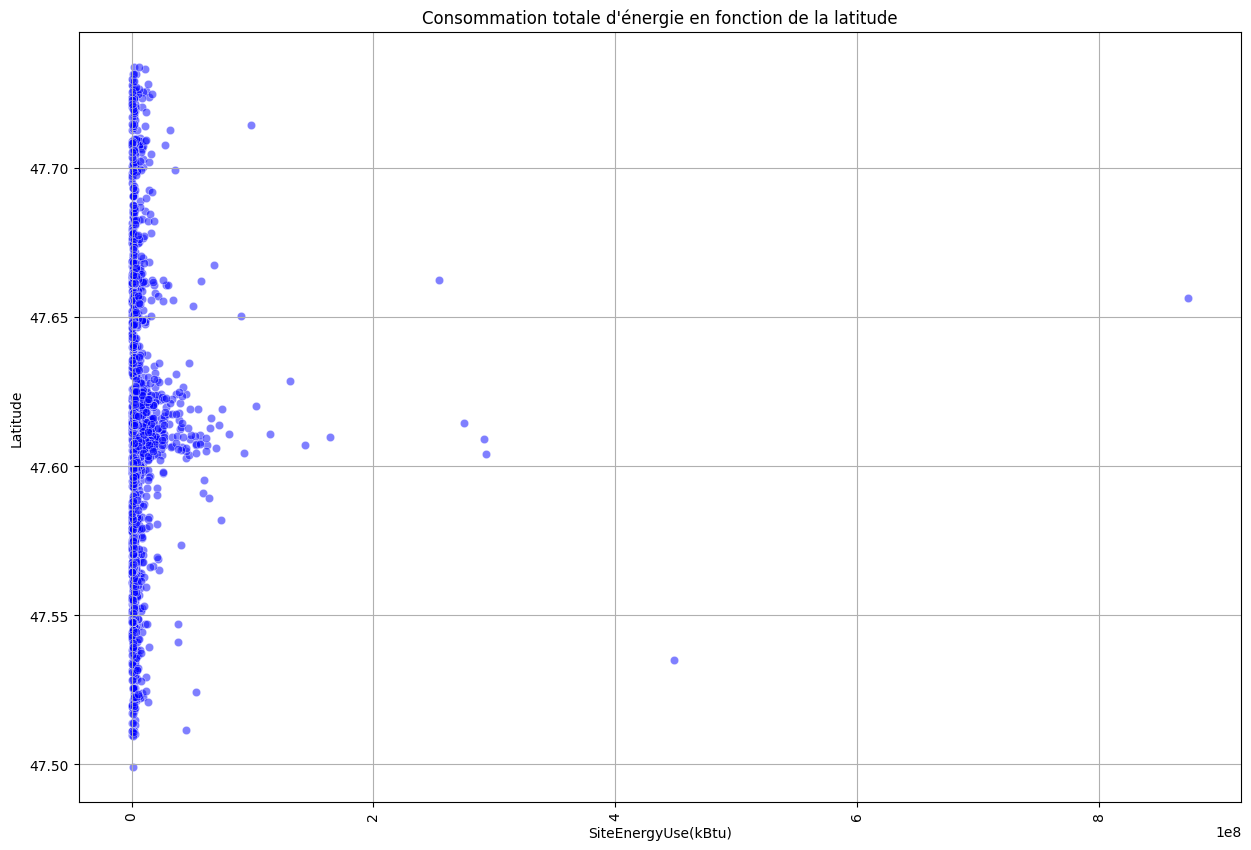

Colonne Latitude
Q1 = 47.58528, Q3 = 47.64963, IQR = 0.06435000000000457
Borne inf = 47.48875499999999, Borne sup = 47.74615500000001
Nombre d’outliers = 0


array([], dtype=float64)

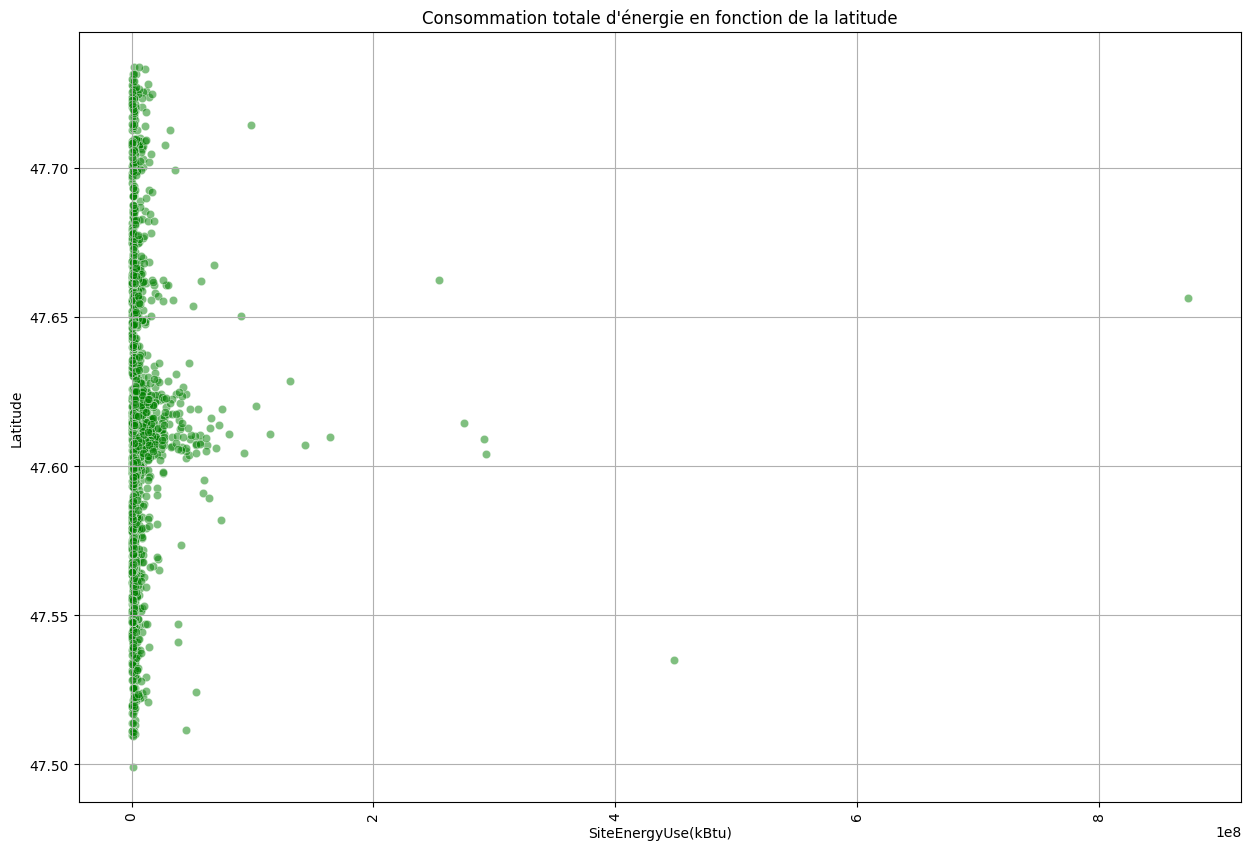

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


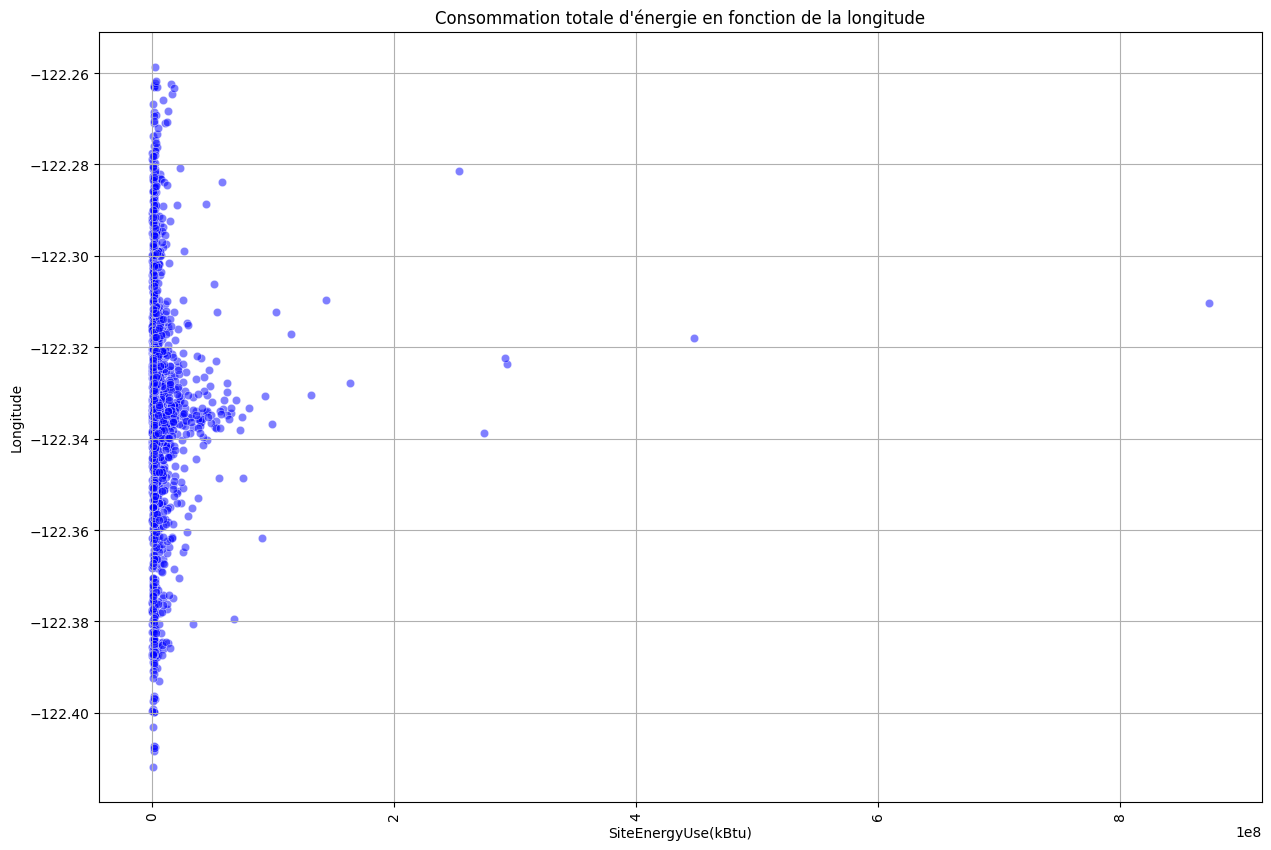

Colonne Longitude
Q1 = -122.34328, Q3 = -122.32175, IQR = 0.021529999999998495
Borne inf = -122.375575, Borne sup = -122.289455
Nombre d’outliers = 196


array([-122.26853, -122.28875, -122.39047, -122.38476, -122.37759,
       -122.27596, -122.37956, -122.26456, -122.25864, -122.28904,
       -122.28406, -122.284  , -122.28146, -122.28198, -122.26586,
       -122.3776 , -122.39631, -122.27691, -122.37737, -122.3885 ,
       -122.38459, -122.39028, -122.3783 , -122.38476, -122.3931 ,
       -122.38528, -122.38553, -122.37581, -122.26825, -122.28881,
       -122.37734, -122.37712, -122.38437, -122.28394, -122.28285,
       -122.38723, -122.4074 , -122.281  , -122.27946, -122.28192,
       -122.281  , -122.28245, -122.27097, -122.38476, -122.40836,
       -122.40735, -122.40765, -122.41182, -122.38725, -122.2738 ,
       -122.2667 , -122.38886, -122.38788, -122.26293, -122.38502,
       -122.38455, -122.38509, -122.38648, -122.38638, -122.38196,
       -122.38109, -122.37805, -122.37835, -122.28747, -122.38716,
       -122.4032 , -122.26277, -122.28712, -122.39689, -122.27466,
       -122.27092, -122.28914, -122.28718, -122.37699, -122.39

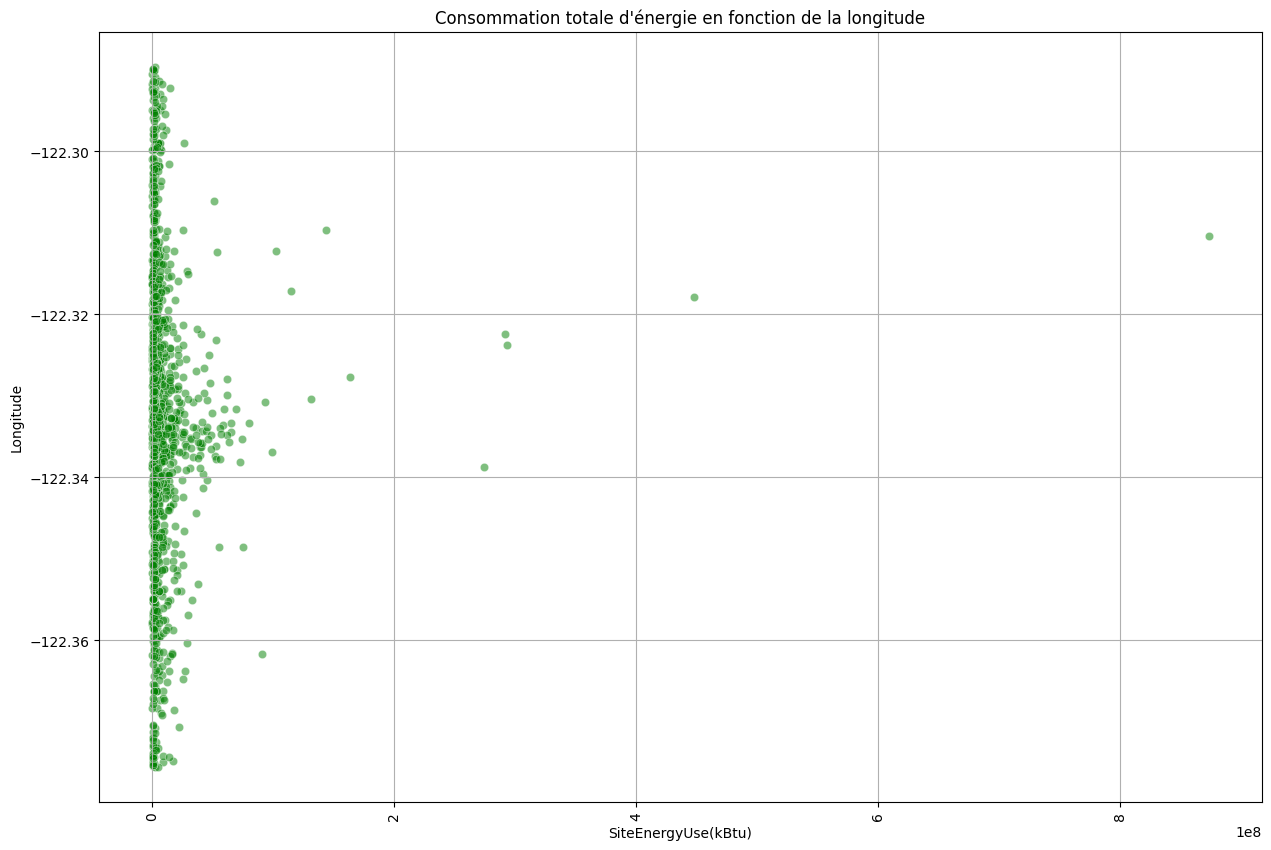

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


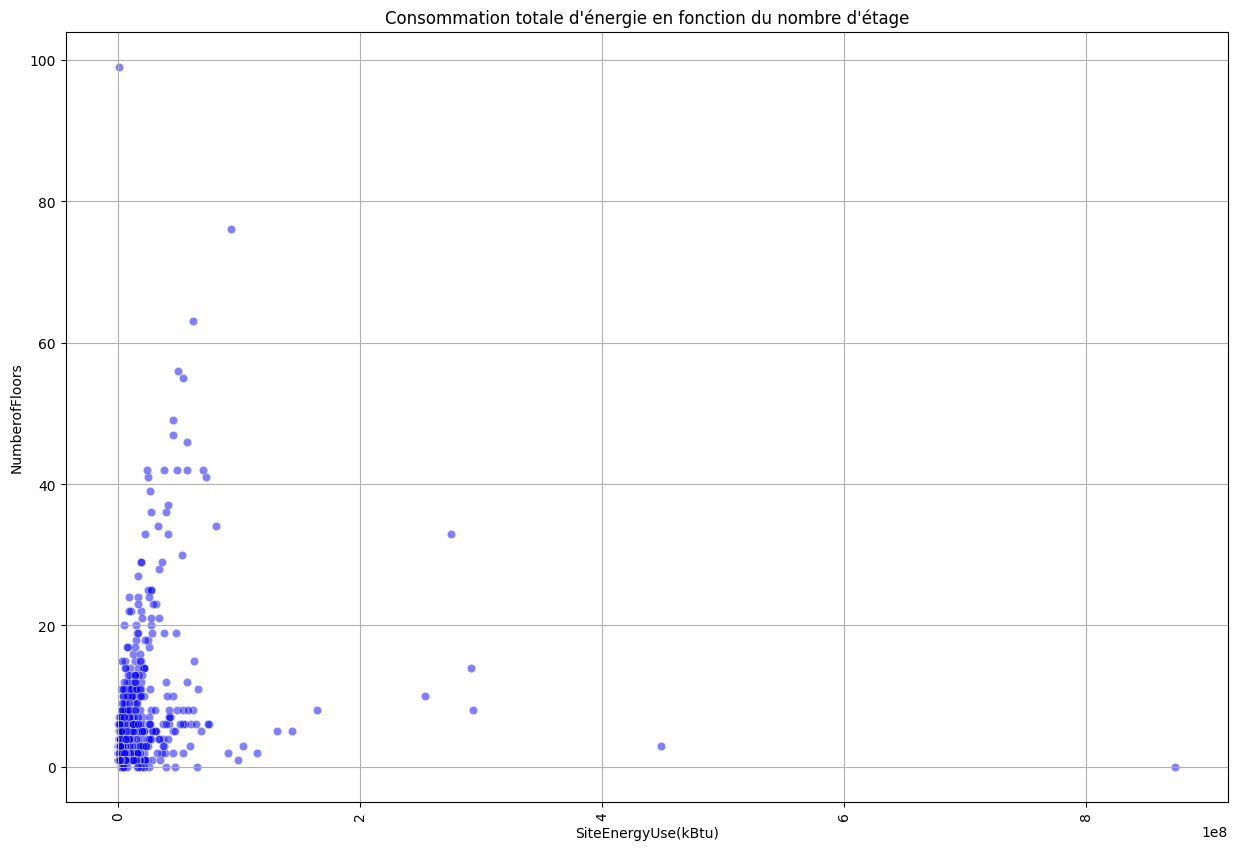

Colonne NumberofFloors
Q1 = 1.0, Q3 = 4.0, IQR = 3.0
Borne inf = -3.5, Borne sup = 8.5
Nombre d’outliers = 136


array([12, 11, 41, 10, 18, 11, 15, 11, 25,  9, 33, 11, 11, 28, 10, 10, 19,
       10, 24, 20, 34, 12, 11, 10,  9, 16,  9, 15, 12, 25, 10, 33, 23, 10,
       17, 20, 25, 12, 36, 16, 15, 22, 17, 47, 41, 29, 34, 14, 49, 37, 42,
       63, 14, 13, 23, 18, 11, 20, 24, 42, 22, 21, 42, 12, 55, 21, 46, 10,
       29, 10, 19, 10, 14, 15, 30, 10, 56, 36, 21, 12, 11, 12, 11, 10,  9,
       14, 10, 22, 14, 11, 11, 42, 10,  9, 19, 14, 23, 15, 11, 33, 76, 19,
       18, 10, 29, 27, 13, 13, 17, 42,  9, 10, 17, 14, 15,  9, 11, 99, 11,
        9, 39, 13, 19, 10, 11, 11, 11, 13, 24, 11, 13, 10, 14, 12, 12, 13])

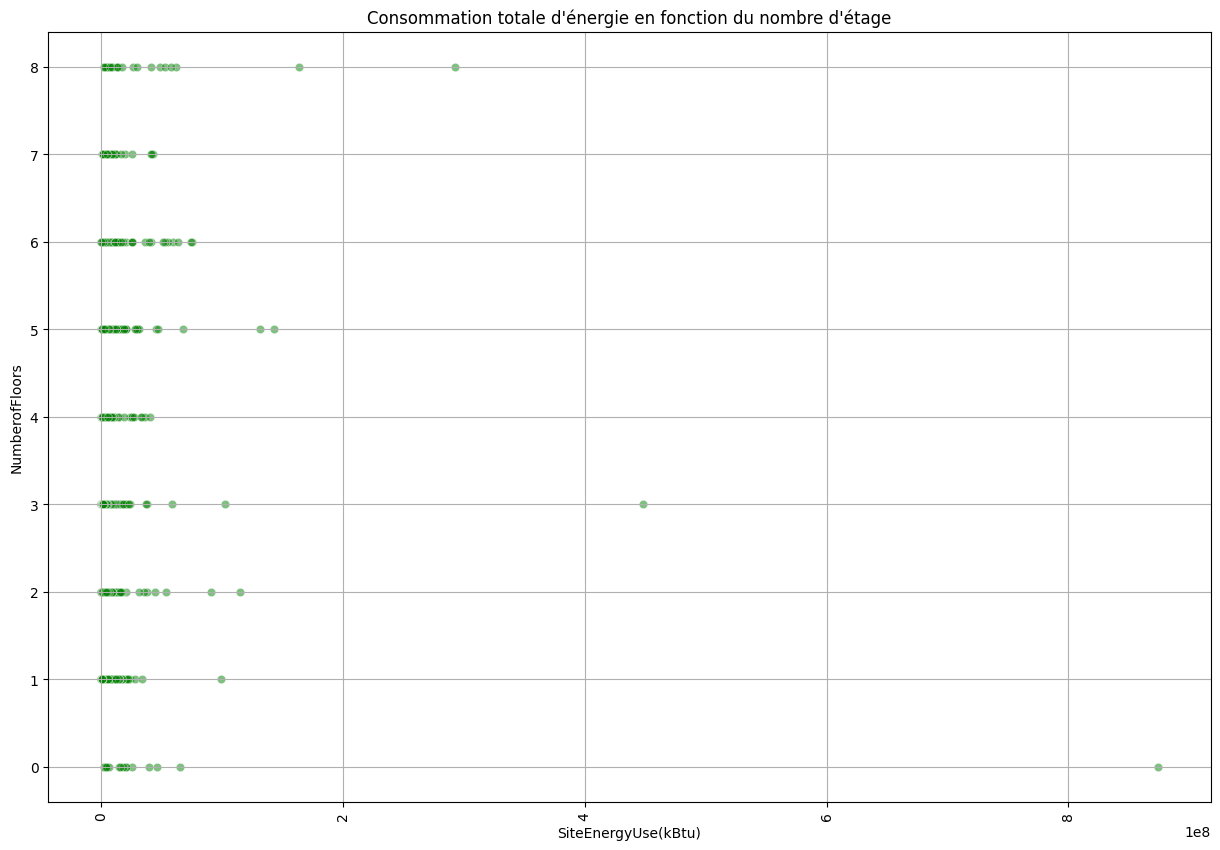

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


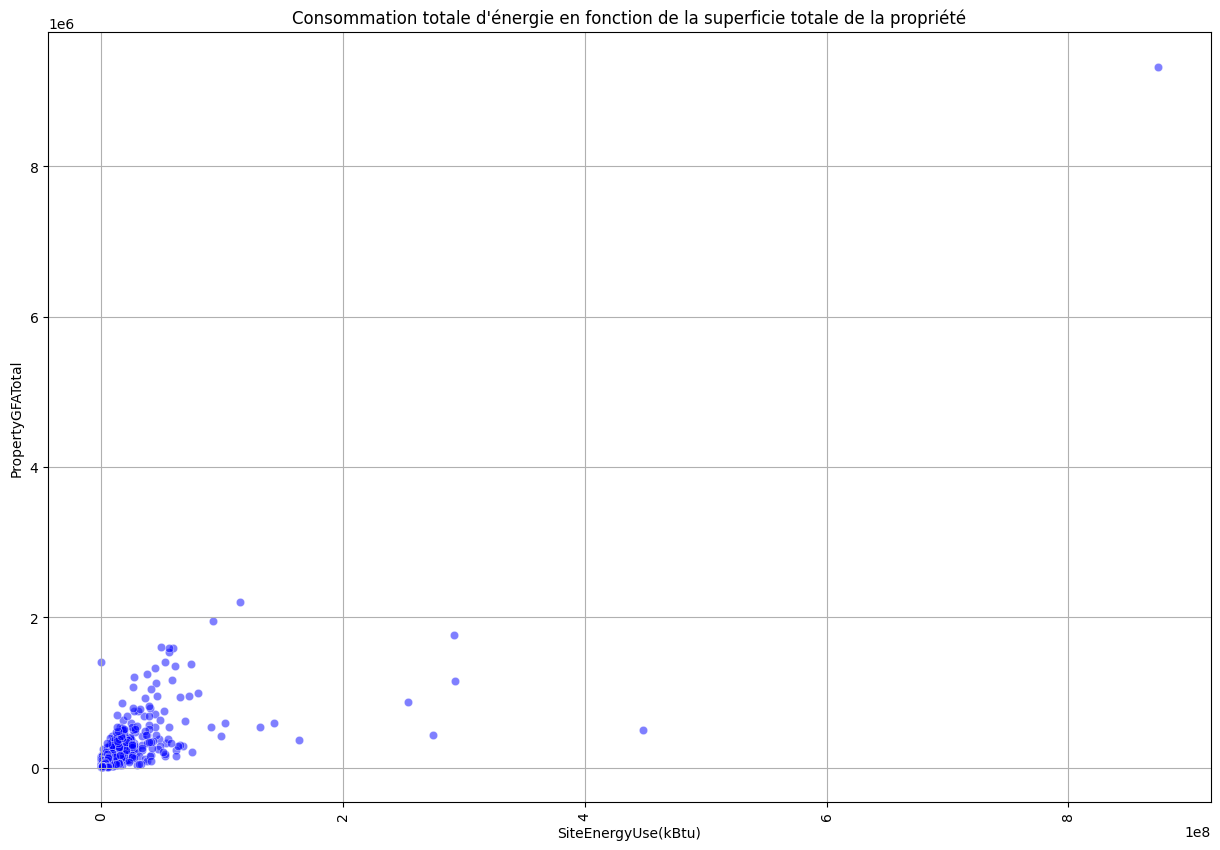

Colonne PropertyGFATotal
Q1 = 29380.0, Q3 = 105100.0, IQR = 75720.0
Borne inf = -84200.0, Borne sup = 218680.0
Nombre d’outliers = 201


array([ 956110,  333176,  315952,  412000,  416281,  540360,  385274,
        494835,  714095,  332210,  994212,  316306,  282863,  389000,
        396085,  571329,  262048,  920598,  245587,  284100,  285333,
        289588,  441071,  254523,  236758,  250981,  299070,  530039,
        879000,  242795,  694072,  234144,  367884, 1585960, 1172127,
        241066,  334368,  419848,  934292,  597519, 1158691,  269297,
        230880,  254273,  234000,  369996,  693450,  791396,  747747,
        265851,  758043,  824887,  480840,  388934,  384302,  378525,
       1323055,  589921,  635303,  776762, 1123435, 1052469,  617684,
       1354987,  310490,  372242,  474546,  220649,  413715,  381381,
        497513,  543876,  396626,  287471,  253103,  304346,  321945,
        336330,  298426,  635824,  542305,  291940,  350310, 1400000,
        305548, 1536606,  500000,  332067,  755000,  267335, 1605578,
        794592,  456304,  374405,  258497,  861702, 1400000,  266000,
        690158,  378

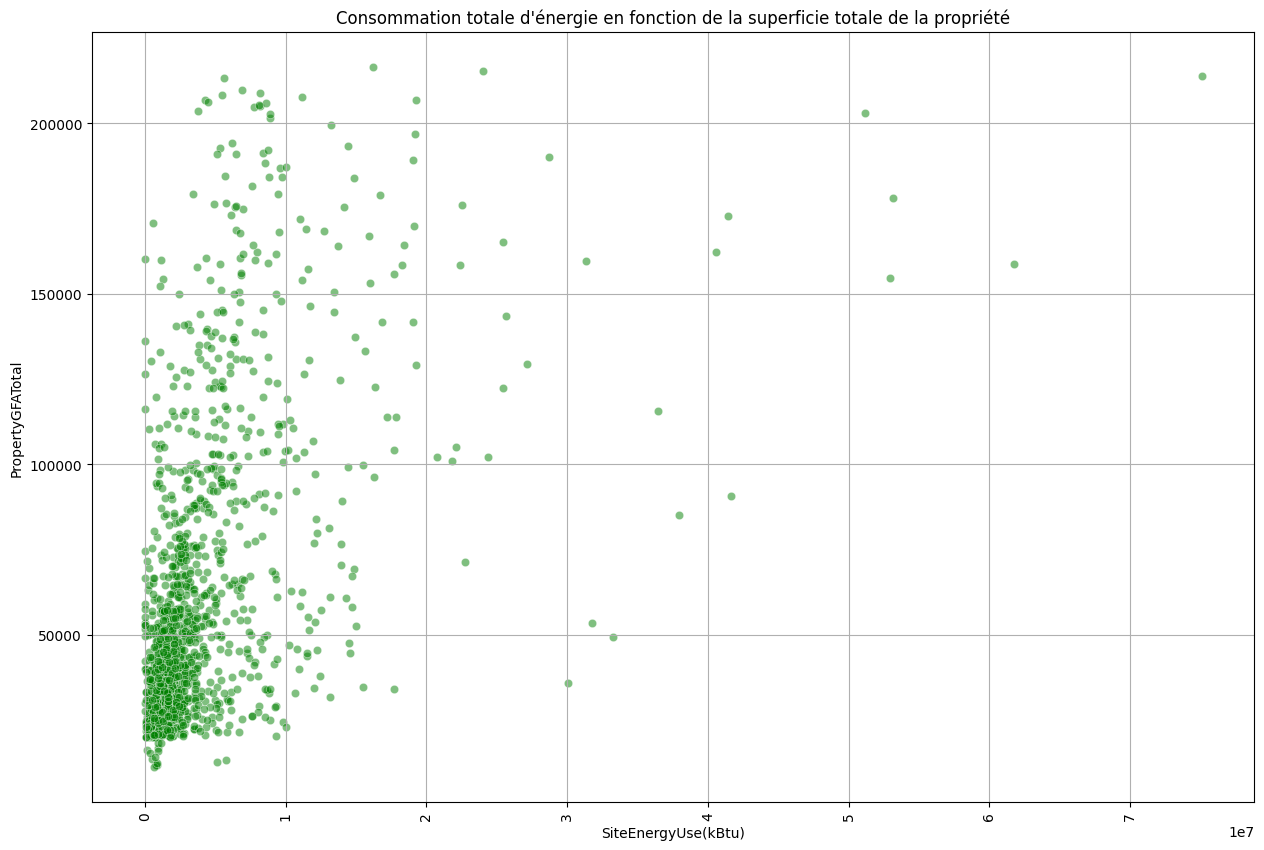

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


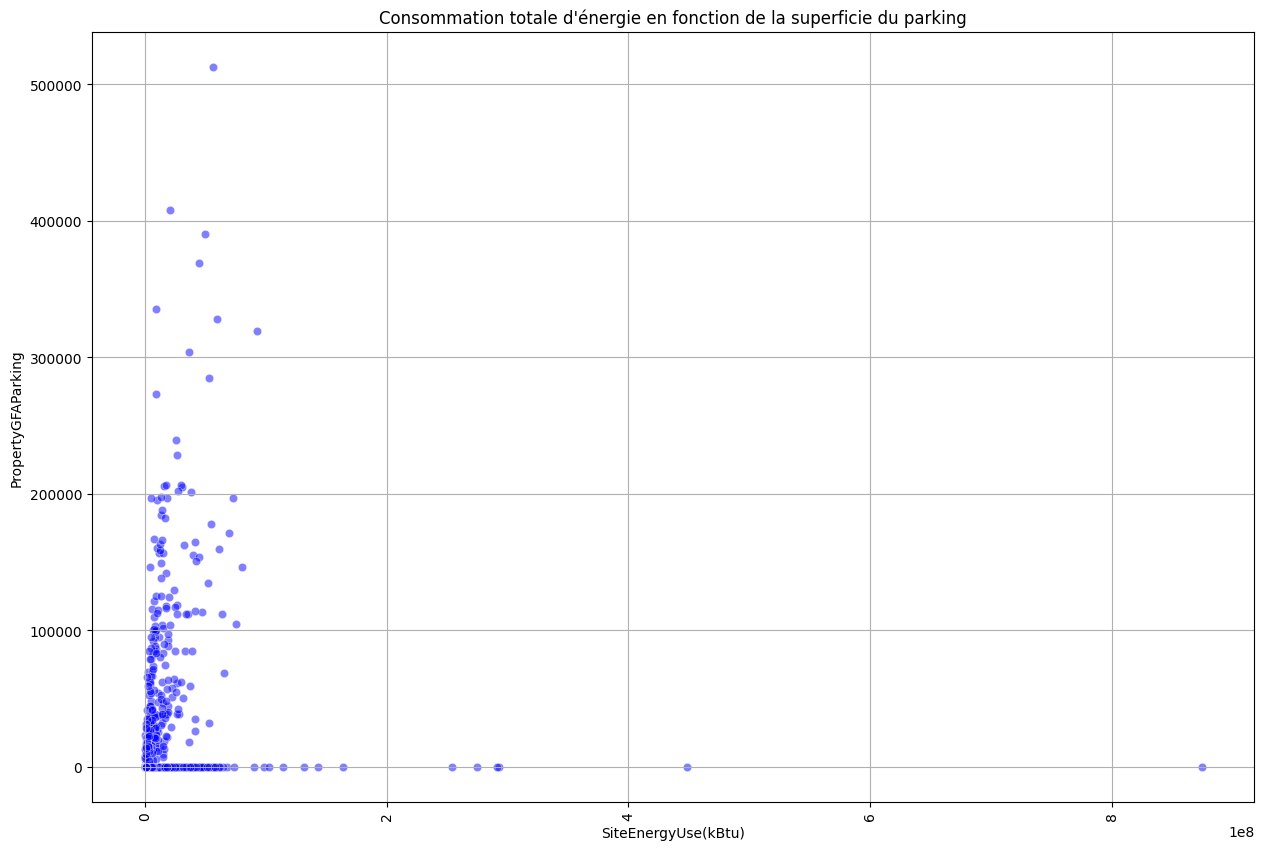

Colonne PropertyGFAParking
Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Borne inf = 0.0, Borne sup = 0.0
Nombre d’outliers = 327


array([ 15064, 196718,  62000,  37198,  19279,  61161,  57600,  25200,
        57000,  85000,  30586,  30301,  38281,  16200, 205970,  10043,
       146694,  42546,  34735,  28200,  36744,  44891,  20732,   9341,
        44766,   2352, 303707,  25930,  36934,  35752,  13820,  14200,
        37500,  68432, 111625,  30000,  54341, 327680,  14567,  31874,
       335109,   8161,  39000,  38800,  26731,  18504,  21790, 205076,
         7757,  30000,  32334, 228668, 154972, 141600,  84600, 129432,
         1392,  62993, 197231,  25920, 162604,  23775, 368980, 164420,
       171500, 159600,  30660,  52703,   8296,  44248,  82720,  64660,
       195621, 118744, 116721,  38700, 124216,  83591,  48512,  61986,
        69710,  70067, 285000, 512608,  13200,  59280, 134662,  86429,
       166960, 389860,  93204,  15140,  17500, 184776,  38000,  97400,
       104000, 407795, 177660, 104922,  29409,  38452,  38400,  44728,
        33921, 115228,  47656,  60960,  28800,  66234, 111793,  52582,
      

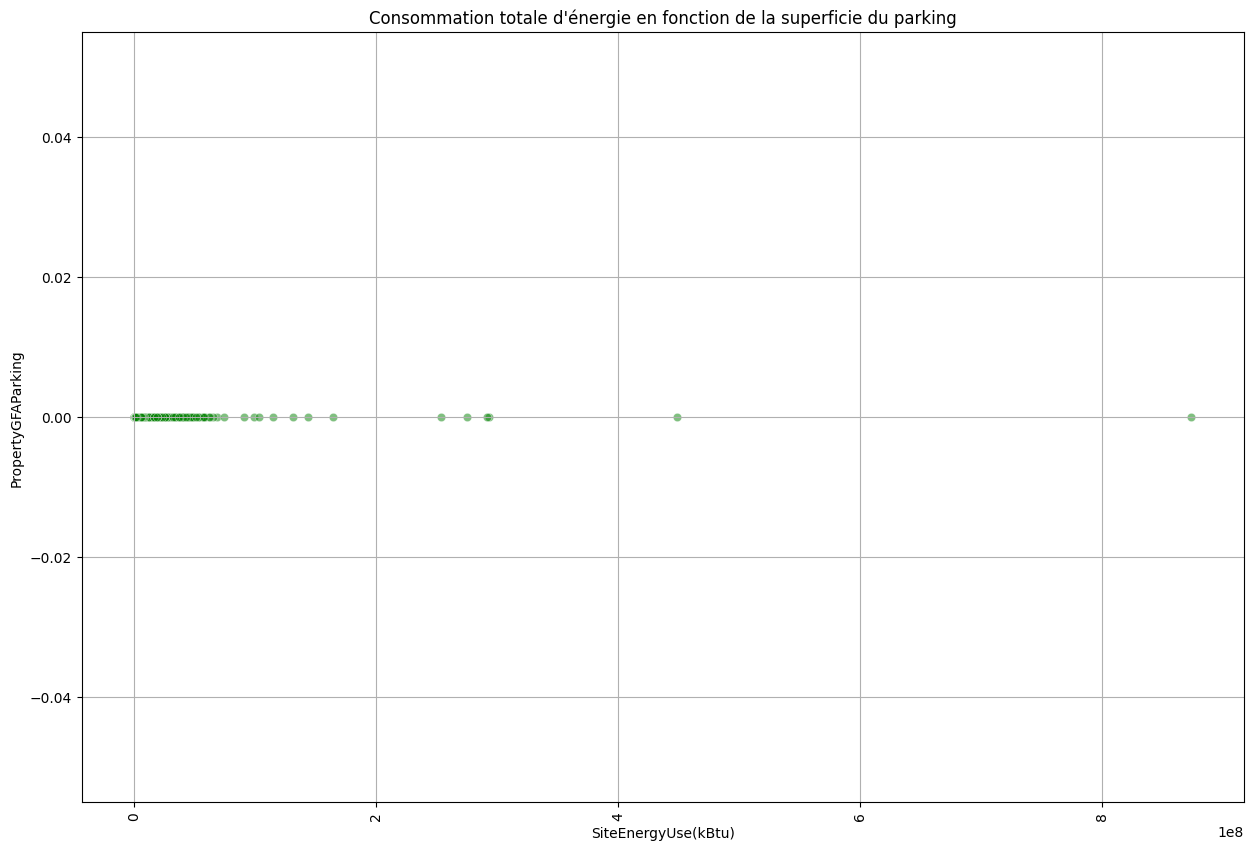

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


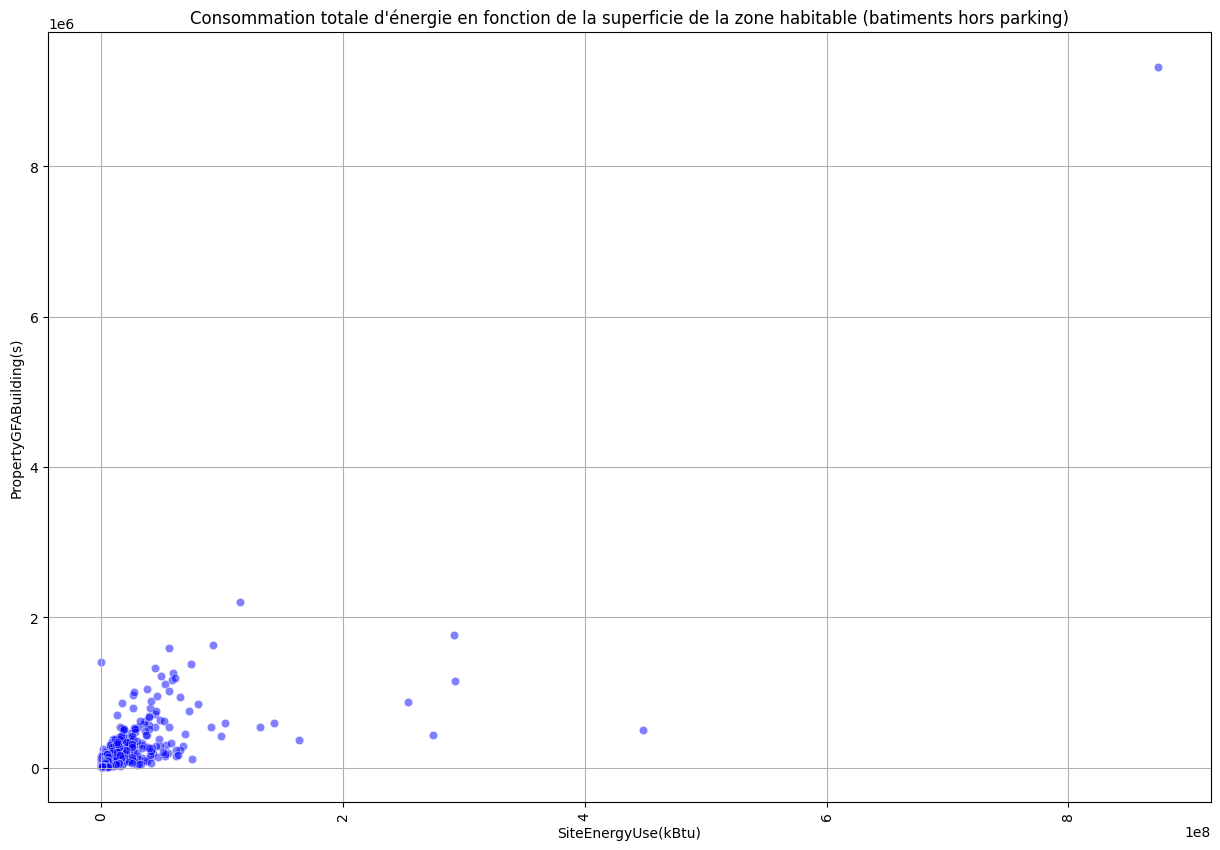

Colonne PropertyGFABuilding(s)
Q1 = 28320.0, Q3 = 94900.0, IQR = 66580.0
Borne inf = -71550.0, Borne sup = 194770.0
Nombre d’outliers = 178


array([ 759392,  272015,  258352,  355000,  331281,  540360,  385274,
        494835,  714095,  847518,  316306,  238097,  389000,  396085,
        571329,  262048,  616891,  206934,  245587,  284100,  285333,
        289588,  441071,  254523,  236758,  250981,  230638,  530039,
        879000,  242795,  582447,  234144,  367884, 1258280, 1172127,
        241066,  302494,  934292,  597519, 1158691,  208981,  269297,
        230880,  204961,  215476,  215473,  203504,  212210,  369996,
        693450,  791396,  542671,  233517,  529375,  206000,  669915,
        339240,  388934,  384302,  293925, 1323055,  460489,  438072,
        614158,  754455,  888049,  446184,  201480, 1195387,  310490,
        319539,  474546,  349055,  378769,  427155,  272410,  203880,
        304346,  321945,  336330,  298426,  635824,  542305,  291940,
        350310, 1115000,  305548, 1023998,  500000,  272787,  620338,
       1215718,  794592,  363100,  258497,  861702, 1400000,  282363,
        200783,  237

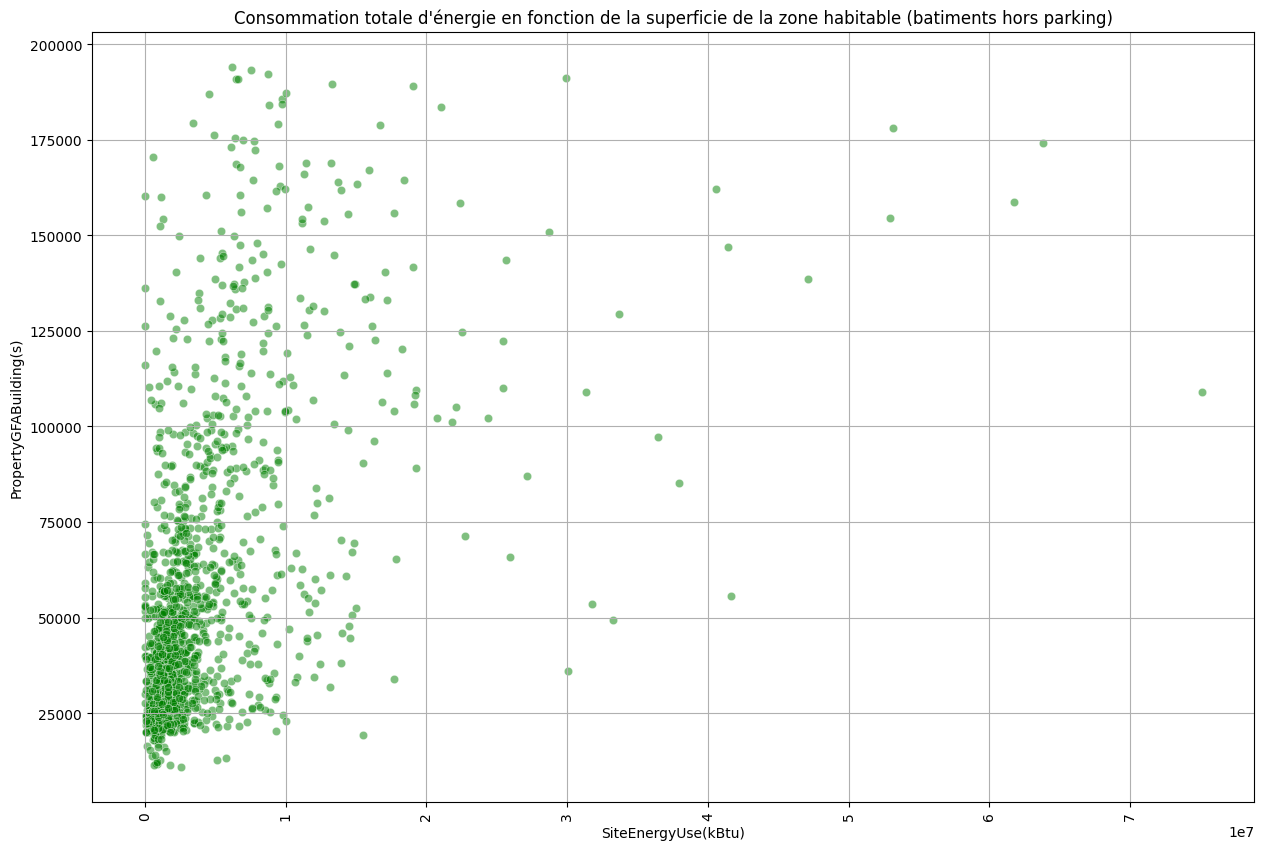

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


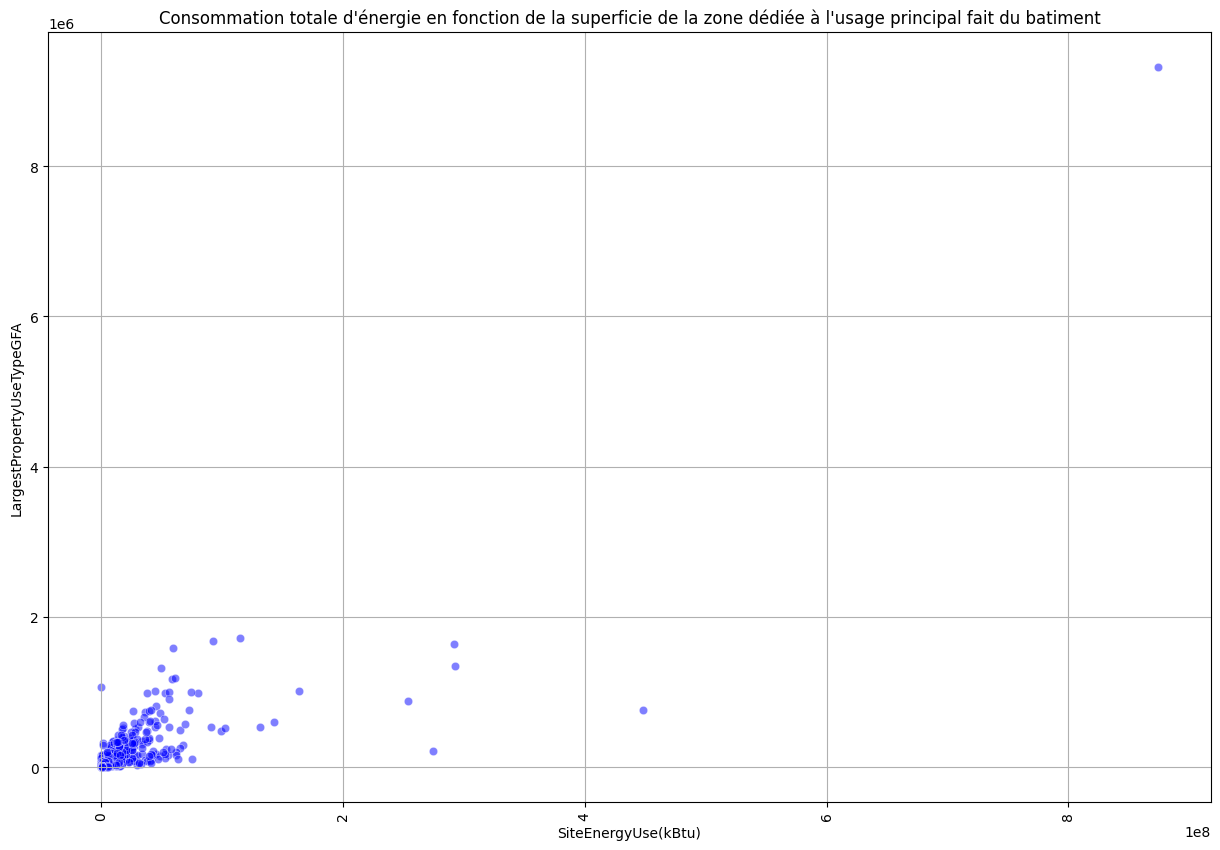

Colonne LargestPropertyUseTypeGFA
Q1 = 25500.0, Q3 = 91967.5, IQR = 66467.5
Borne inf = -74201.25, Borne sup = 191668.75
Nombre d’outliers = 170


array([ 756493.,  336640.,  295511.,  364913.,  348329.,  537150.,
        385274.,  757027.,  616000.,  348630.,  994212.,  261826.,
        235788.,  368000.,  278500.,  598801.,  296000.,  729584.,
        194104.,  245587.,  302661.,  289588.,  483000.,  254523.,
        238550.,  250000.,  505103.,  879000.,  242795.,  667335.,
        234144.,  367884., 1585960., 1172127.,  241066.,  240984.,
        335109.,  495536.,  601615., 1350182.,  208981.,  269297.,
        203000.,  204961.,  217088.,  277000.,  383942.,  361107.,
        622034.,  542461.,  226454.,  582725.,  743562.,  311736.,
        388934.,  348969.,  236827., 1011135.,  470416.,  522667.,
        606050.,  808980.,  765351.,  581558., 1191115.,  269284.,
        319539.,  474546.,  348270.,  367623.,  424044.,  274002.,
        191814.,  245028.,  256299.,  286538.,  718473.,  542305.,
        191940.,  305233.,  994116.,  310000., 1002403.,  411301.,
        332067.,  643083., 1314475.,  748011.,  342952.,  5093

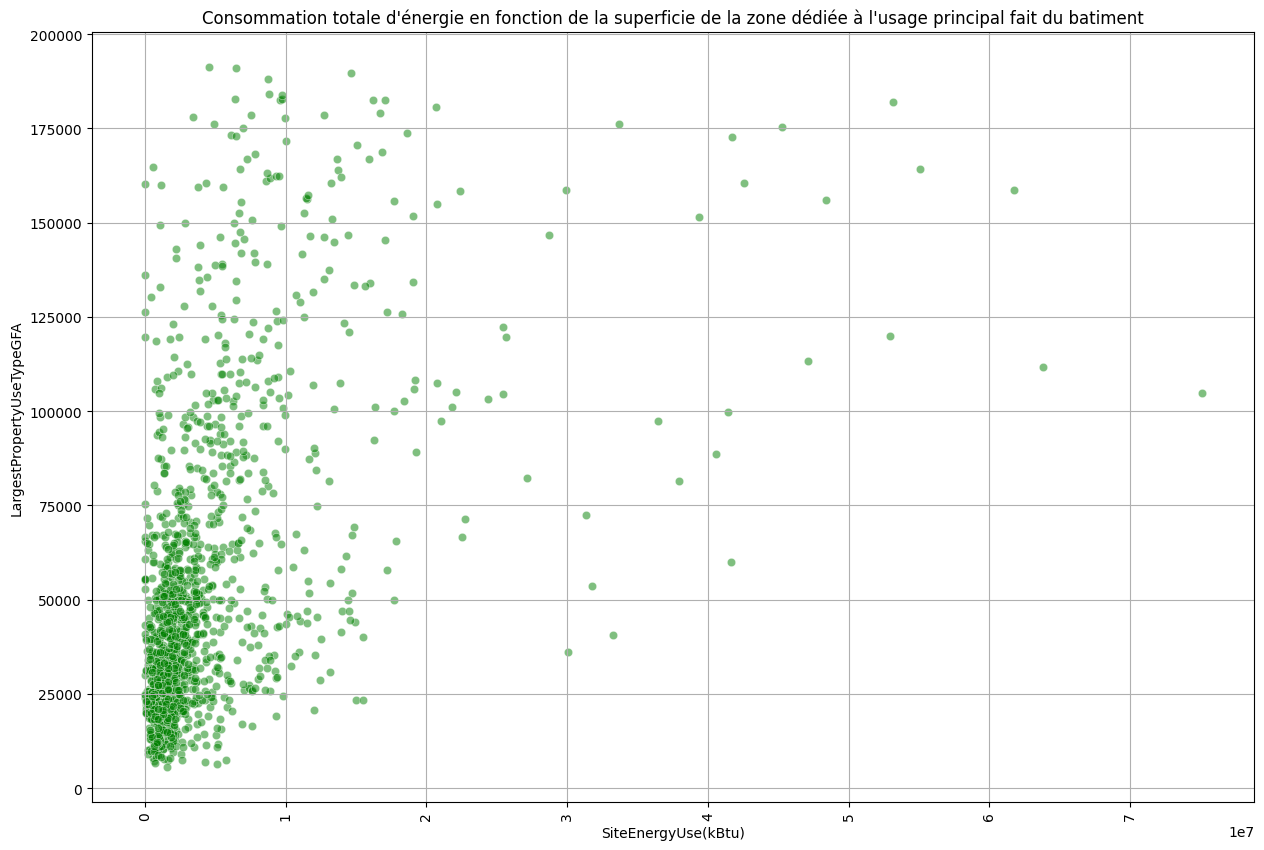

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


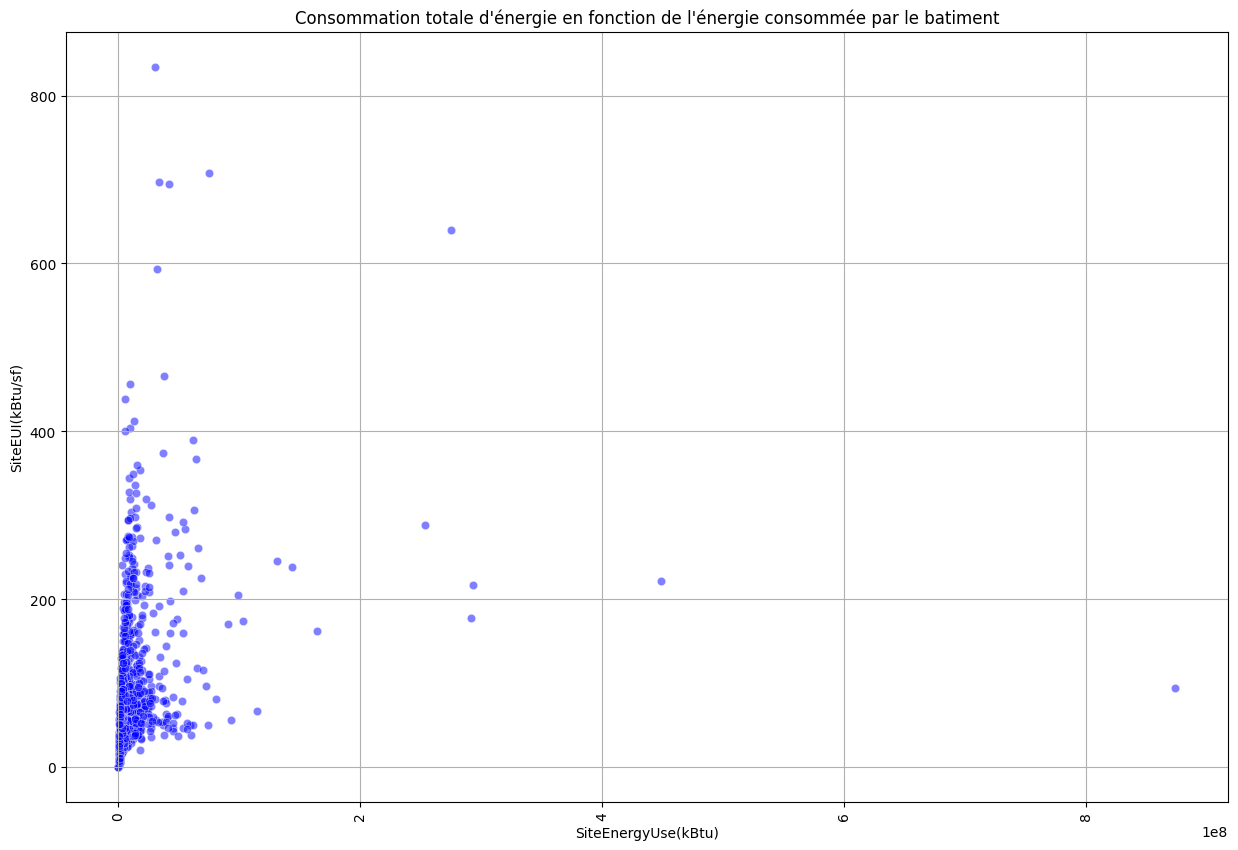

Colonne SiteEUI(kBtu/sf)
Q1 = 33.59999847, Q3 = 80.5749988525, IQR = 46.9750003825
Borne inf = -36.86250210374999, Borne sup = 151.03749942625
Nombre d’outliers = 157


array([159.5      , 221.6999969, 286.3999939, 204.5      , 225.       ,
       167.8000031, 261.2999878, 154.5      , 288.7999878, 175.6000061,
       159.8999939, 238.3999939, 217.1000061, 306.3999939, 183.5      ,
       208.1000061, 213.6999969, 158.3000031, 297.3999939, 834.4000244,
       161.1999969, 231.8000031, 157.5      , 283.7000122, 707.2999878,
       179.1000061, 176.       , 389.1000061, 210.       , 191.3999939,
       245.1000061, 270.3999939, 236.5      , 171.1999969, 176.8999939,
       198.1000061, 173.       , 209.3000031, 215.6000061, 170.       ,
       284.5      , 248.8000031, 163.3999939, 263.2000122, 280.3999939,
       232.3000031, 180.6999969, 241.3000031, 366.3999939, 203.1999969,
       180.6000061, 192.8999939, 160.8000031, 210.1000061, 208.8000031,
       231.3999939, 311.7000122, 214.3999939, 374.2000122, 639.7000122,
       271.7000122, 465.5      , 177.8999939, 198.3000031, 217.8000031,
       273.2999878, 274.2000122, 160.1999969, 185.6999969, 157.8

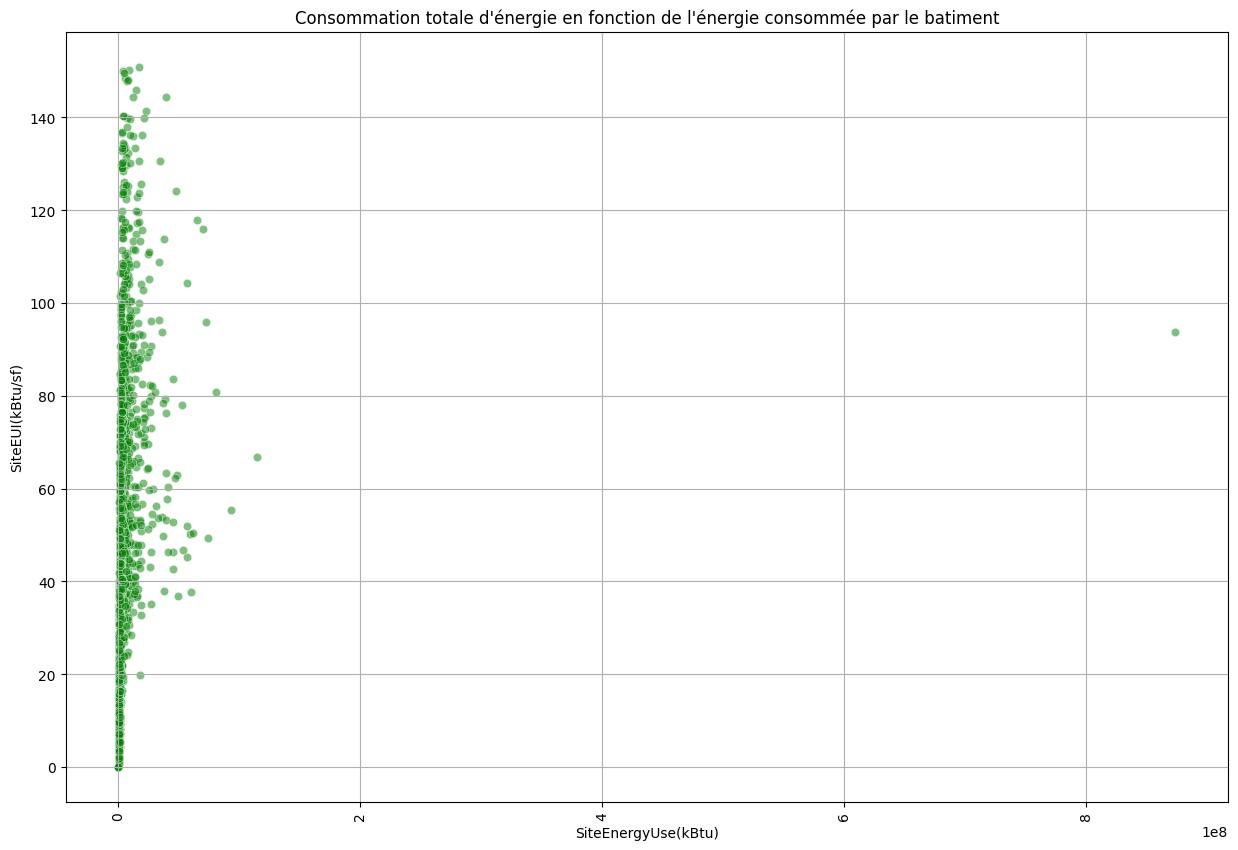

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


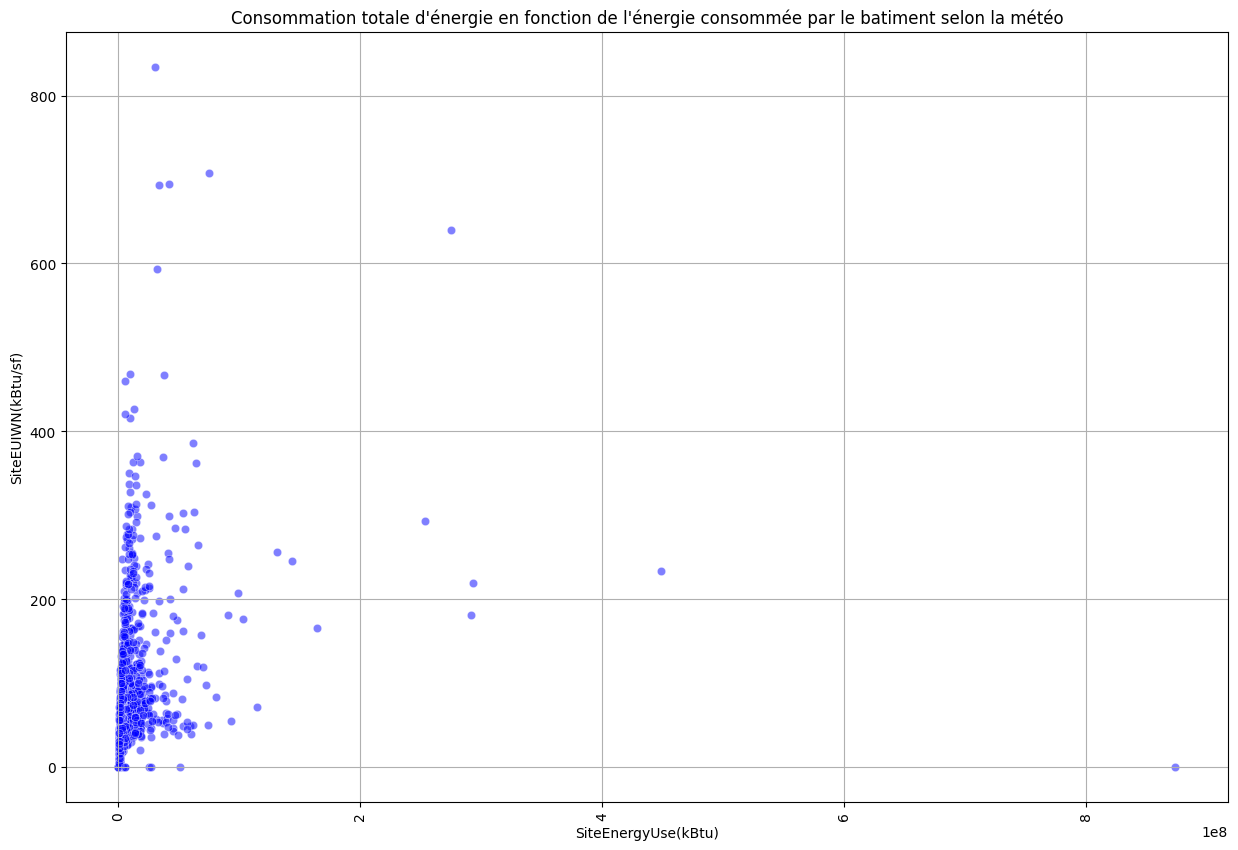

Colonne SiteEUIWN(kBtu/sf)
Q1 = 35.324999812499996, Q3 = 84.024999615, IQR = 48.6999998025
Borne inf = -37.72499989125001, Borne sup = 157.07499931875
Nombre d’outliers = 155


array([165.8999939, 233.1000061, 299.       , 207.3000031, 157.3000031,
       167.3999939, 264.       , 163.1000061, 293.2000122, 184.6999969,
       161.8999939, 244.8000031, 219.6999969, 303.7999878, 183.5      ,
       213.6000061, 219.5      , 165.6999969, 299.2000122, 834.4000244,
       161.1999969, 239.       , 157.5      , 283.7000122, 707.2999878,
       184.6999969, 174.6000061, 385.6000061, 218.6999969, 197.1999969,
       255.8000031, 275.1000061, 241.5      , 180.1999969, 182.       ,
       200.3000031, 177.8000031, 212.3999939, 211.1000061, 167.3999939,
       291.5      , 254.6000061, 163.3999939, 271.1000061, 284.7000122,
       235.6000061, 183.1999969, 249.1999969, 362.6000061, 210.       ,
       191.8999939, 199.3000031, 164.1999969, 214.8000031, 214.1000061,
       231.3999939, 311.7000122, 215.1999969, 369.1000061, 639.7999878,
       277.2999878, 467.       , 180.5      , 200.6999969, 225.5      ,
       273.2000122, 283.1000061, 168.6999969, 184.3000031, 162. 

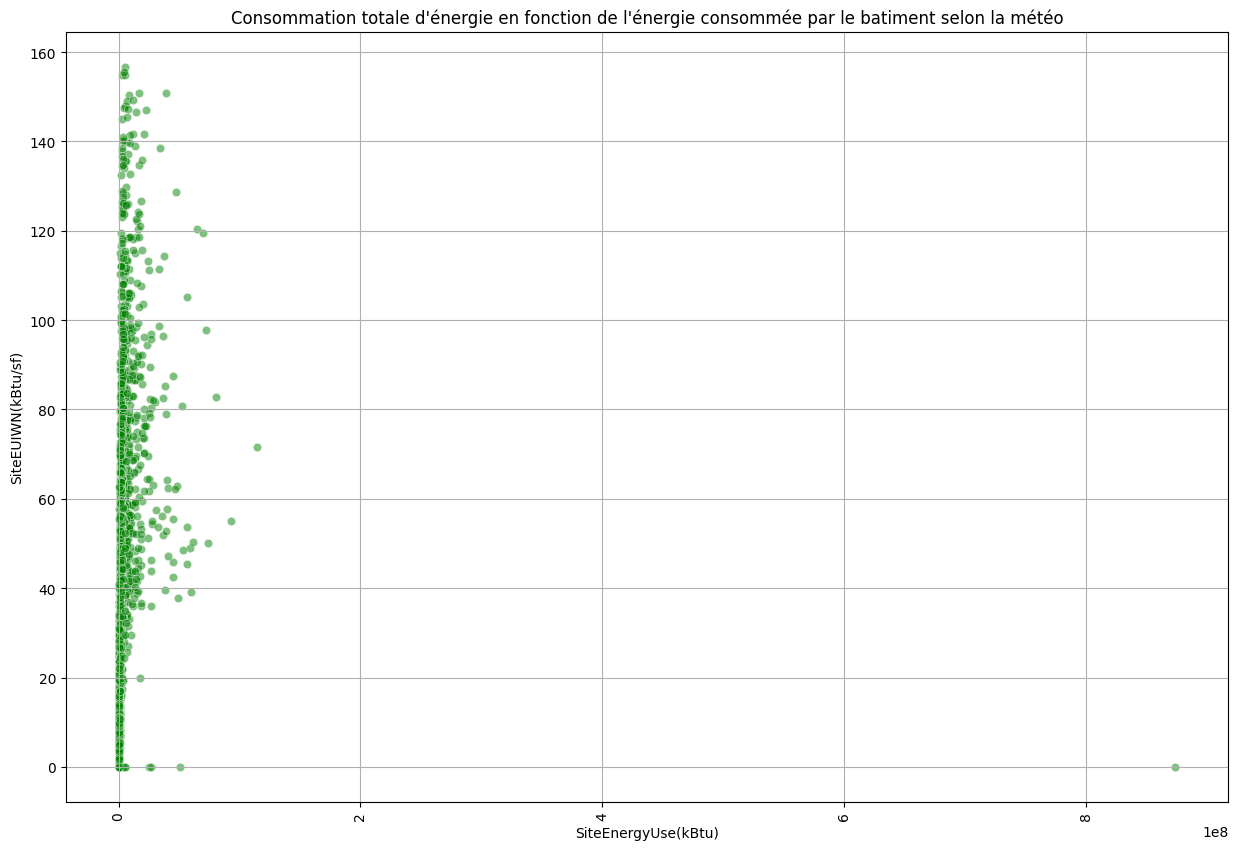

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


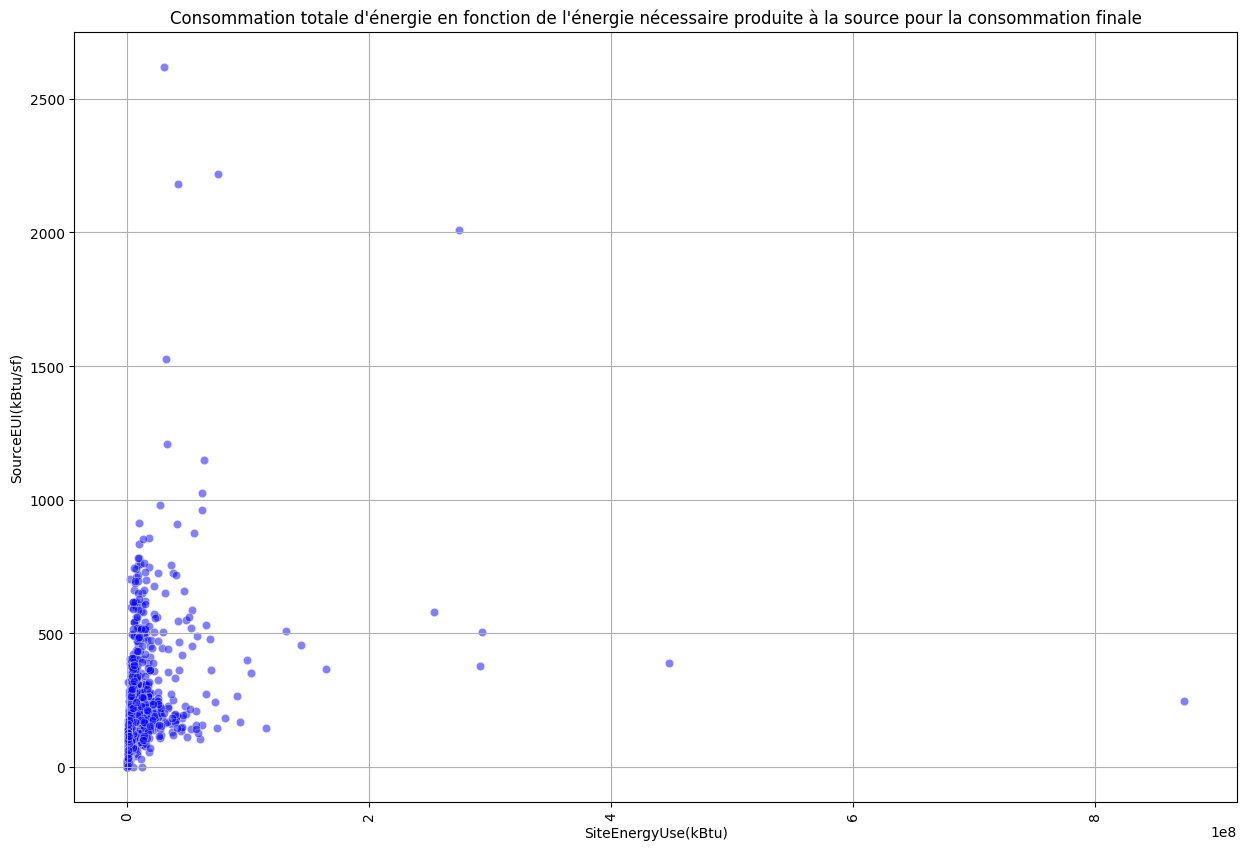

Colonne SourceEUI(kBtu/sf)
Q1 = 76.35000228999999, Q3 = 202.1500015, IQR = 125.79999921000001
Borne inf = -112.34999652500002, Borne sup = 390.850000315
Nombre d’outliers = 137


array([ 398.7000122,  485.2999878,  505.7999878,  407.3999939,
        479.5      ,  476.5      ,  530.7000122,  578.2000122,
        451.2000122,  454.3999939,  502.8999939,  962.0999756,
        443.       ,  541.7000122,  909.5999756, 2620.       ,
        506.1000061,  518.7999878,  407.7000122,  874.0999756,
       2217.800049 ,  550.7000122, 1026.599976 ,  504.5      ,
        442.7999878,  509.3999939,  650.5999756,  559.5      ,
        417.       ,  411.5      ,  467.6000061,  454.2000122,
        519.       ,  676.5999756,  525.5      ,  620.2000122,
        581.9000244,  513.       ,  657.0999756,  503.6000061,
        451.       ,  578.7000122, 1150.300049 ,  472.1000061,
        473.6000061,  443.       ,  405.2999878,  571.7000122,
        726.5999756,  978.9000244,  596.7999878,  471.6000061,
        756.       , 2007.900024 ,  422.3999939,  615.5999756,
        725.5999756,  502.7000122,  491.2000122,  439.       ,
        855.2000122,  476.1000061, 1206.699951 ,  701.9

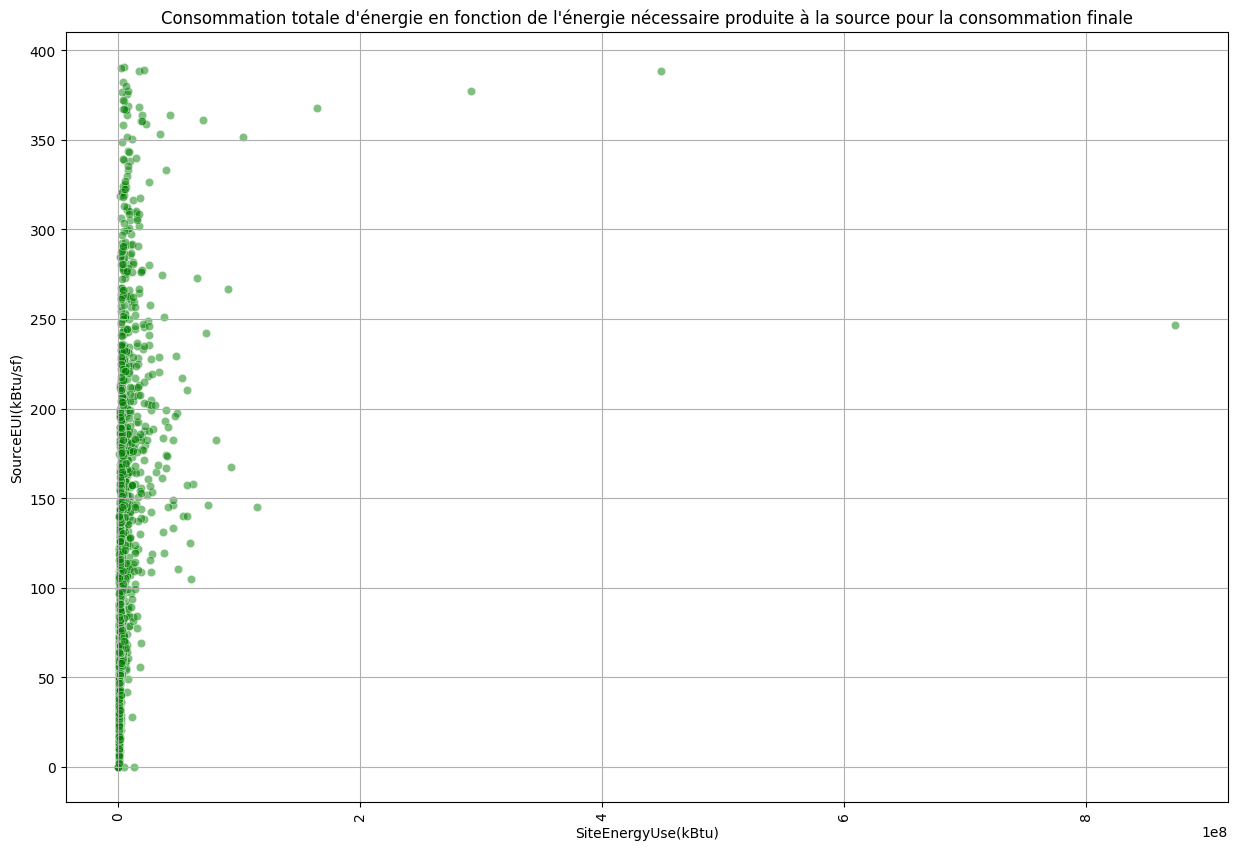

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


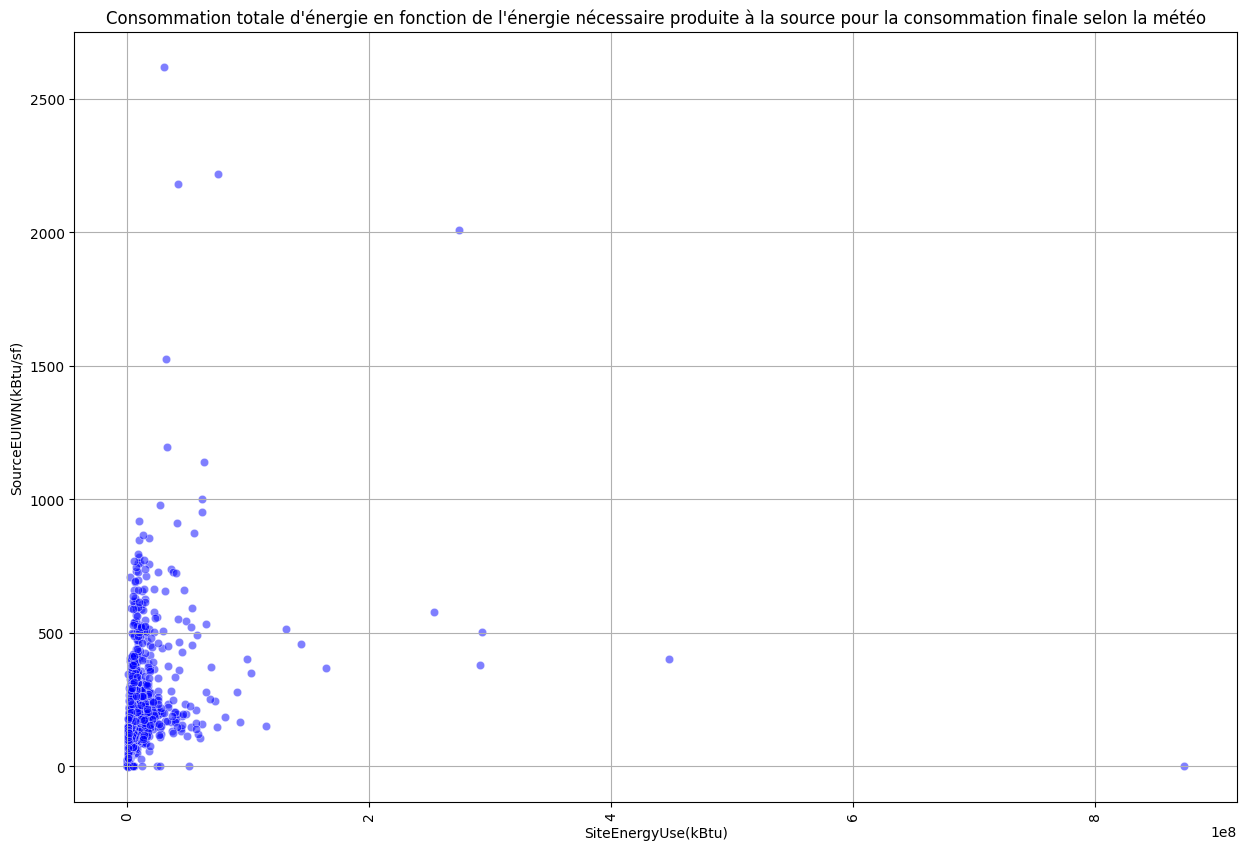

Colonne SourceEUIWN(kBtu/sf)
Q1 = 79.049999235, Q3 = 203.75, IQR = 124.700000765
Borne inf = -108.00000191249998, Borne sup = 390.8000011475
Nombre d’outliers = 138


array([ 400.2999878,  412.2000122,  495.5      ,  504.2999878,
        408.       ,  471.1000061,  532.2999878,  576.5999756,
        453.2999878,  459.2000122,  502.7999878,  954.       ,
        443.       ,  547.7000122,  911.5      , 2620.       ,
        506.1000061,  523.5999756,  407.7000122,  874.0999756,
       2217.800049 ,  545.9000244, 1001.       ,  509.       ,
        449.       ,  515.5999756,  655.5      ,  559.7000122,
        427.6000061,  416.2999878,  465.1000061,  459.2000122,
        522.7000122,  662.5      ,  515.2000122,  627.5999756,
        588.       ,  513.       ,  661.7000122,  502.       ,
        453.6000061,  587.       , 1138.400024 ,  472.1000061,
        480.7999878,  447.6000061,  406.2000122,  576.5999756,
        726.5999756,  978.9000244,  594.5      ,  463.1000061,
        739.9000244, 2008.       ,  423.       ,  618.0999756,
        727.2000122,  505.1000061,  496.2999878,  439.       ,
        855.2000122,  484.2000122, 1195.099976 ,  709.2

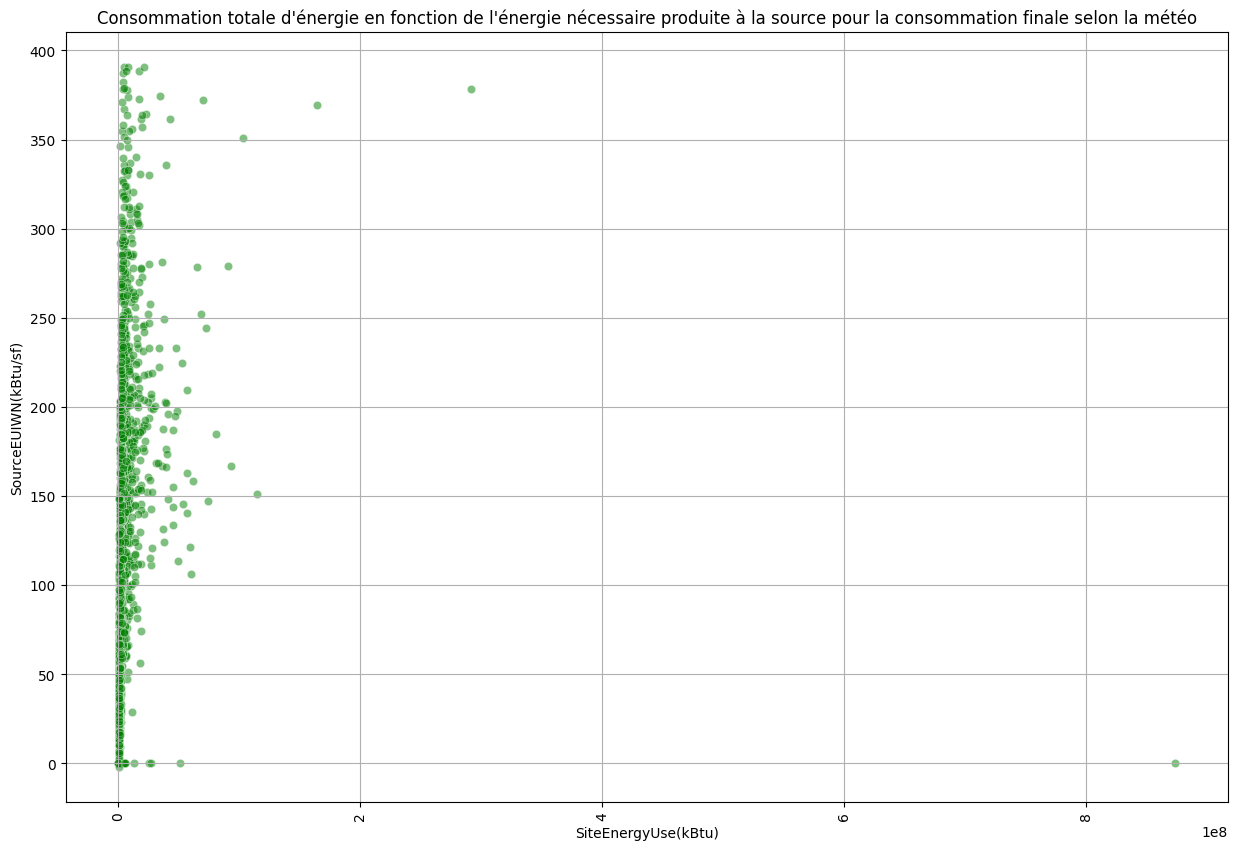

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


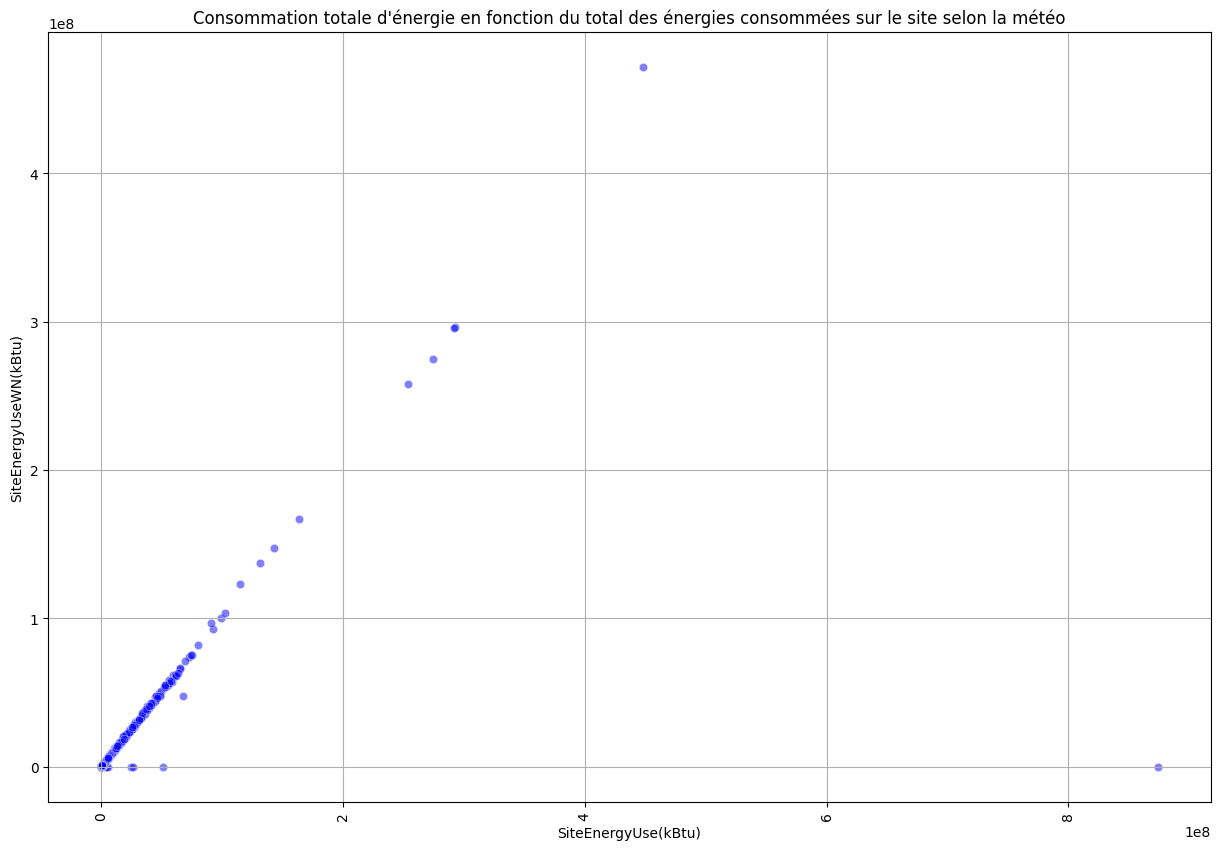

Colonne SiteEnergyUseWN(kBtu)
Q1 = 1285411.21875, Q3 = 7046407.75, IQR = 5760996.53125
Borne inf = -7356083.578125, Borne sup = 15687902.546875
Nombre d’outliers = 182


array([7.39371120e+07, 1.66469300e+07, 2.70701140e+07, 2.25249480e+07,
       1.87069120e+07, 3.43519200e+07, 4.70230880e+07, 4.95392120e+07,
       4.71613856e+08, 4.41100160e+07, 1.61631940e+07, 8.23180720e+07,
       1.65277110e+07, 2.01946060e+07, 2.37369240e+07, 2.12578360e+07,
       4.01534320e+07, 2.08235200e+07, 3.81051080e+07, 4.76027200e+07,
       4.11517320e+07, 1.62744490e+07, 6.60002960e+07, 2.87634980e+07,
       2.57764208e+08, 3.74108000e+07, 6.21603040e+07, 5.74069880e+07,
       5.41360680e+07, 6.65028360e+07, 1.47299056e+08, 2.96671744e+08,
       6.16748560e+07, 2.87315020e+07, 2.61220180e+07, 2.46063660e+07,
       2.68318960e+07, 1.88113220e+07, 2.47550860e+07, 4.00377360e+07,
       4.22274040e+07, 3.16937040e+07, 1.57427900e+07, 2.70180200e+07,
       3.93600160e+07, 1.84687760e+07, 1.89827480e+07, 4.46836600e+07,
       2.46034200e+07, 1.87544660e+07, 4.16504040e+07, 3.25770500e+07,
       4.75181240e+07, 4.20717120e+07, 7.15689520e+07, 6.15761840e+07,
      

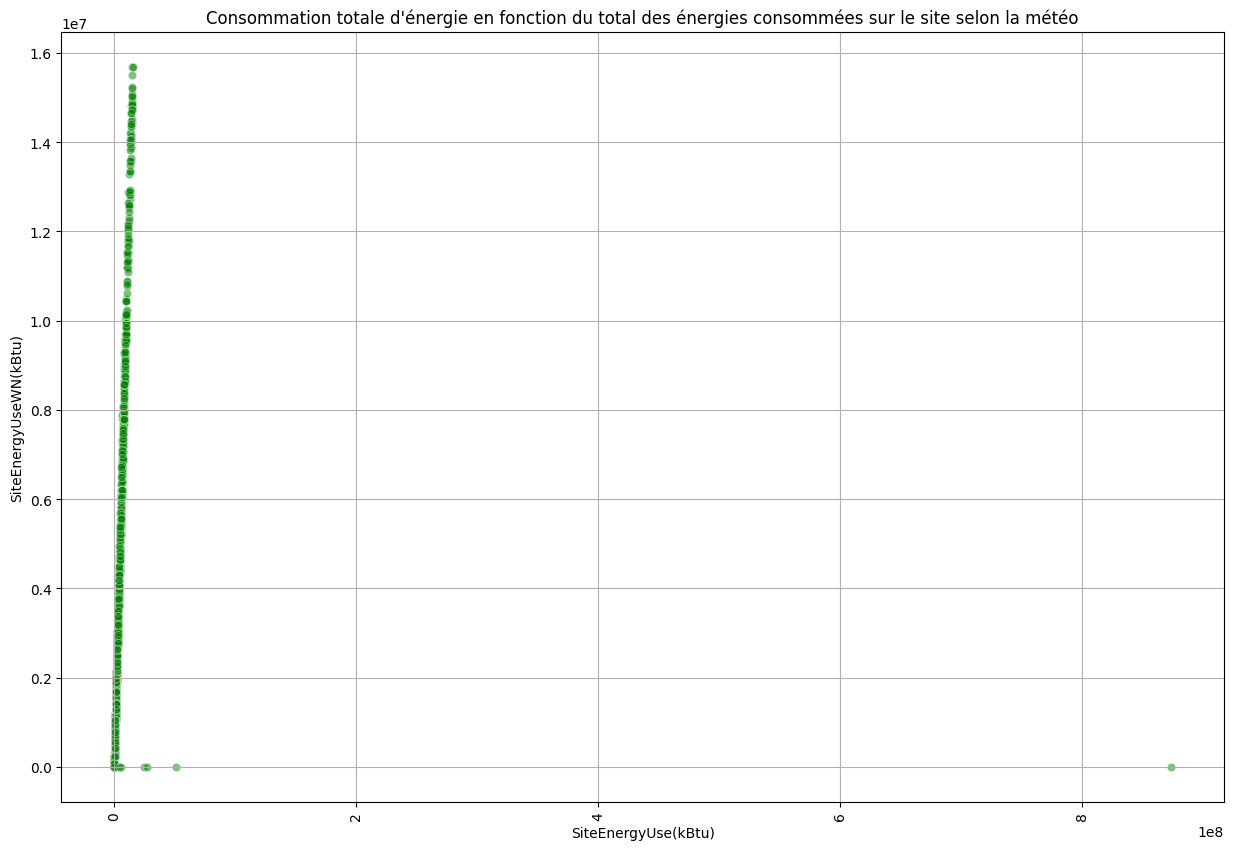

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


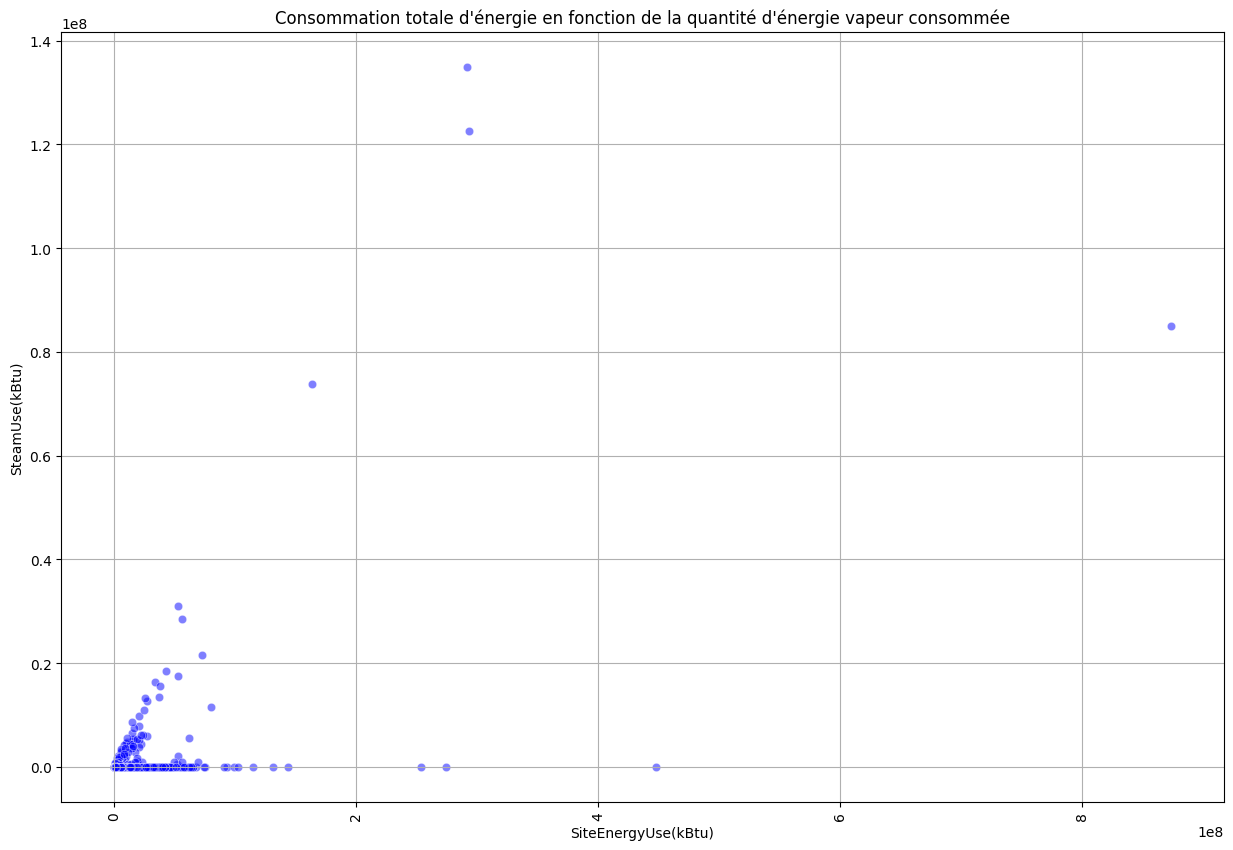

Colonne SteamUse(kBtu)
Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Borne inf = 0.0, Borne sup = 0.0
Nombre d’outliers = 114


array([2.00388200e+06, 2.15665540e+07, 2.21444625e+06, 2.27628650e+06,
       5.23716550e+06, 5.99936050e+06, 1.65635250e+06, 4.33773850e+06,
       4.87084750e+06, 7.37559500e+05, 4.59234750e+06, 1.77620188e+06,
       3.43086200e+06, 1.15986860e+07, 5.32780250e+06, 6.09315000e+06,
       4.12013000e+06, 9.76369000e+06, 1.20238000e+06, 5.13722000e+06,
       4.31113600e+06, 4.33652450e+06, 1.22575032e+08, 3.07644650e+06,
       4.92761812e+05, 2.12308008e+04, 2.08642475e+06, 6.56883200e+06,
       2.31249675e+06, 3.48386812e+05, 1.19234375e+06, 1.09210660e+07,
       4.80784000e+05, 1.80731797e+05, 2.15497750e+06, 8.82983500e+05,
       1.61996688e+06, 1.01442238e+06, 3.70062975e+06, 5.37061200e+06,
       1.27609710e+07, 2.84388840e+07, 2.17948775e+06, 1.62845700e+07,
       2.12120300e+06, 7.14523688e+05, 3.28247094e+05, 1.55860140e+07,
       6.31029000e+05, 2.25885525e+06, 2.85007775e+06, 5.19390000e+05,
       9.15654875e+05, 3.48088075e+06, 3.90278125e+06, 2.92793525e+06,
      

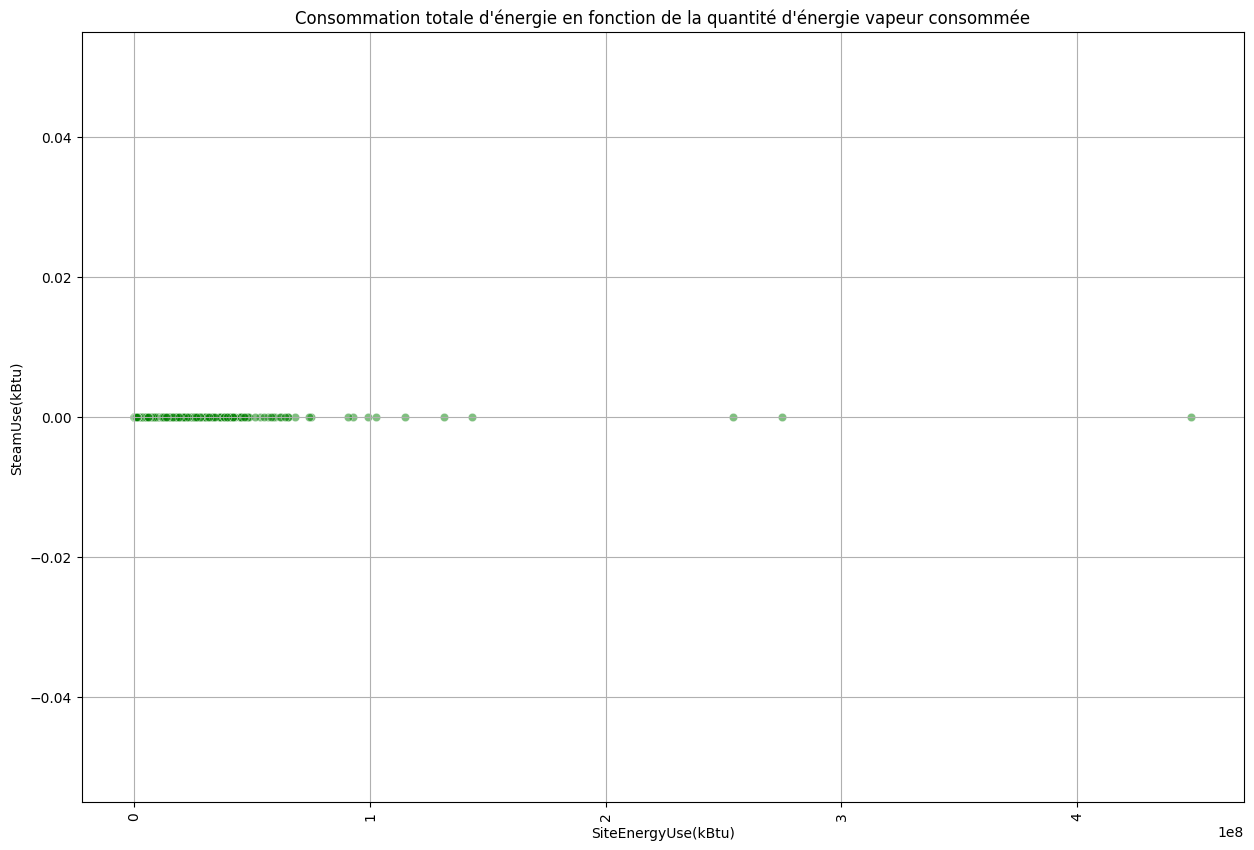

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


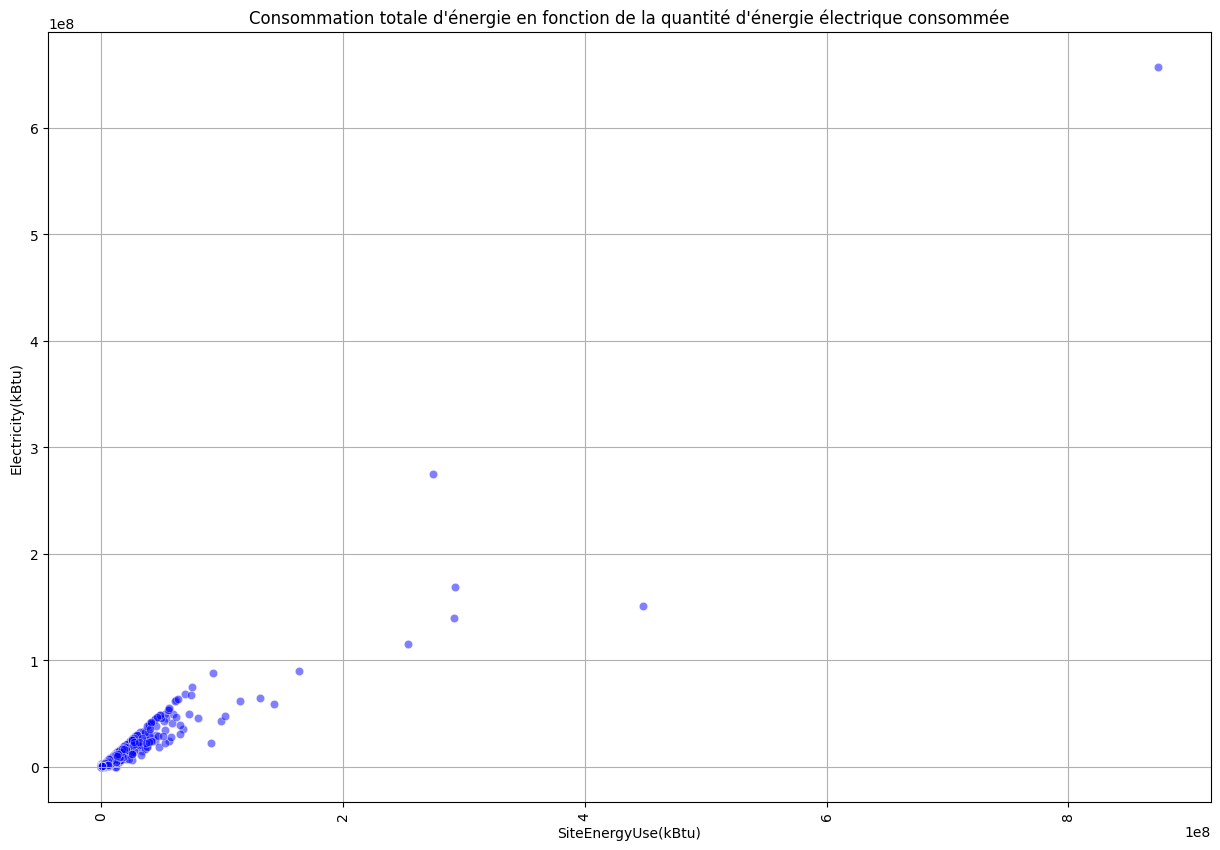

Colonne Electricity(kBtu)
Q1 = 718792.5, Q3 = 4821154.5, IQR = 4102362.0
Borne inf = -5434750.5, Borne sup = 10974697.5
Nombre d’outliers = 193


array([4.95266640e+07, 1.80830490e+07, 1.39041830e+07, 1.78512970e+07,
       2.12252770e+07, 2.43578330e+07, 1.82576610e+07, 1.50476283e+08,
       4.47311530e+07, 1.22044060e+07, 4.55455290e+07, 1.28710910e+07,
       1.09806520e+07, 1.44191460e+07, 3.22061990e+07, 1.35126860e+07,
       2.75972610e+07, 3.52372050e+07, 2.53145750e+07, 1.39736960e+07,
       3.06516440e+07, 1.62245290e+07, 1.15641210e+08, 3.34508320e+07,
       4.94399140e+07, 4.06223810e+07, 4.53213780e+07, 3.93641140e+07,
       5.87549270e+07, 1.68683602e+08, 6.21971710e+07, 1.87454410e+07,
       1.37888530e+07, 1.37635420e+07, 1.82461510e+07, 2.47550840e+07,
       3.74970680e+07, 4.08396370e+07, 2.78839390e+07, 2.61316430e+07,
       3.95238470e+07, 1.77332760e+07, 1.73845530e+07, 1.39850640e+07,
       4.45218440e+07, 2.46034170e+07, 1.80404890e+07, 3.97946680e+07,
       3.24573490e+07, 3.83788890e+07, 4.12135790e+07, 6.86368220e+07,
       6.15761800e+07, 1.61240360e+07, 1.12489860e+07, 2.84504330e+07,
      

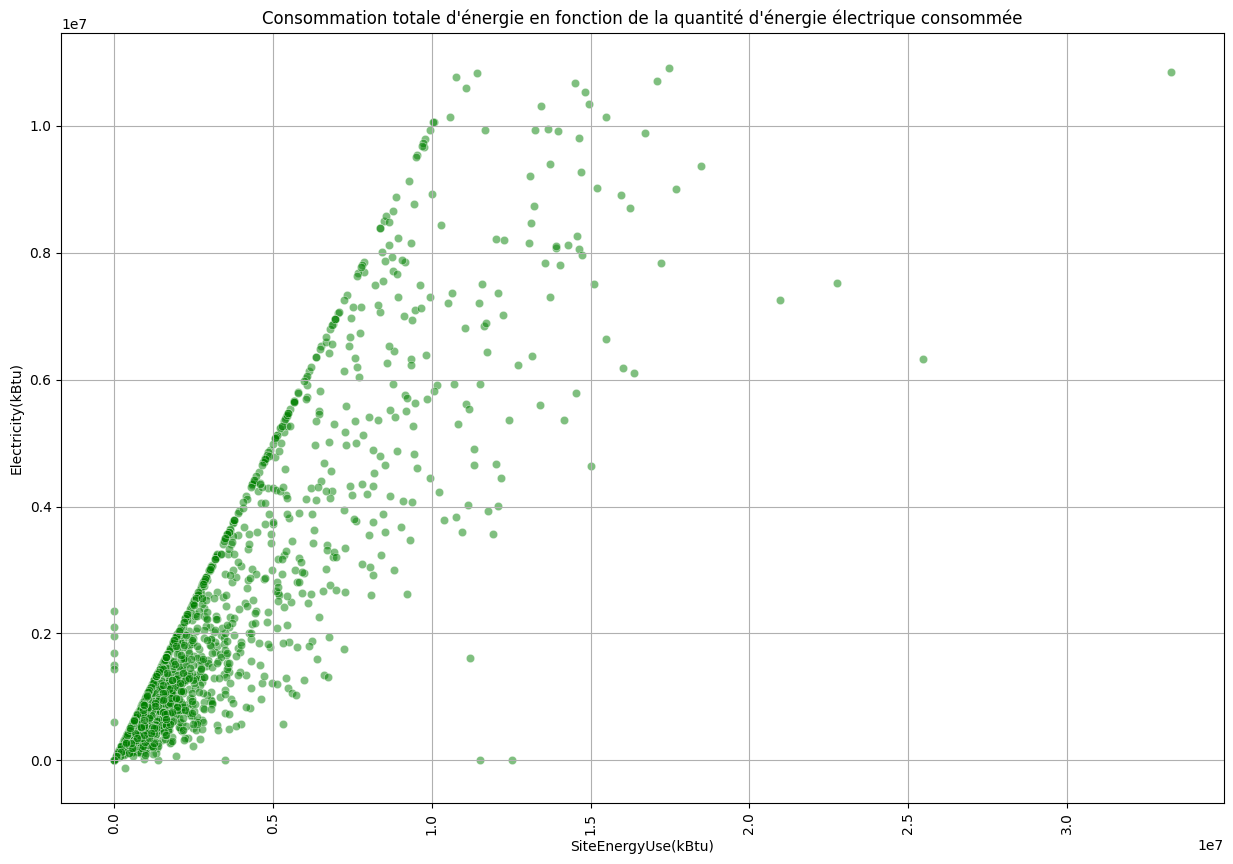

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


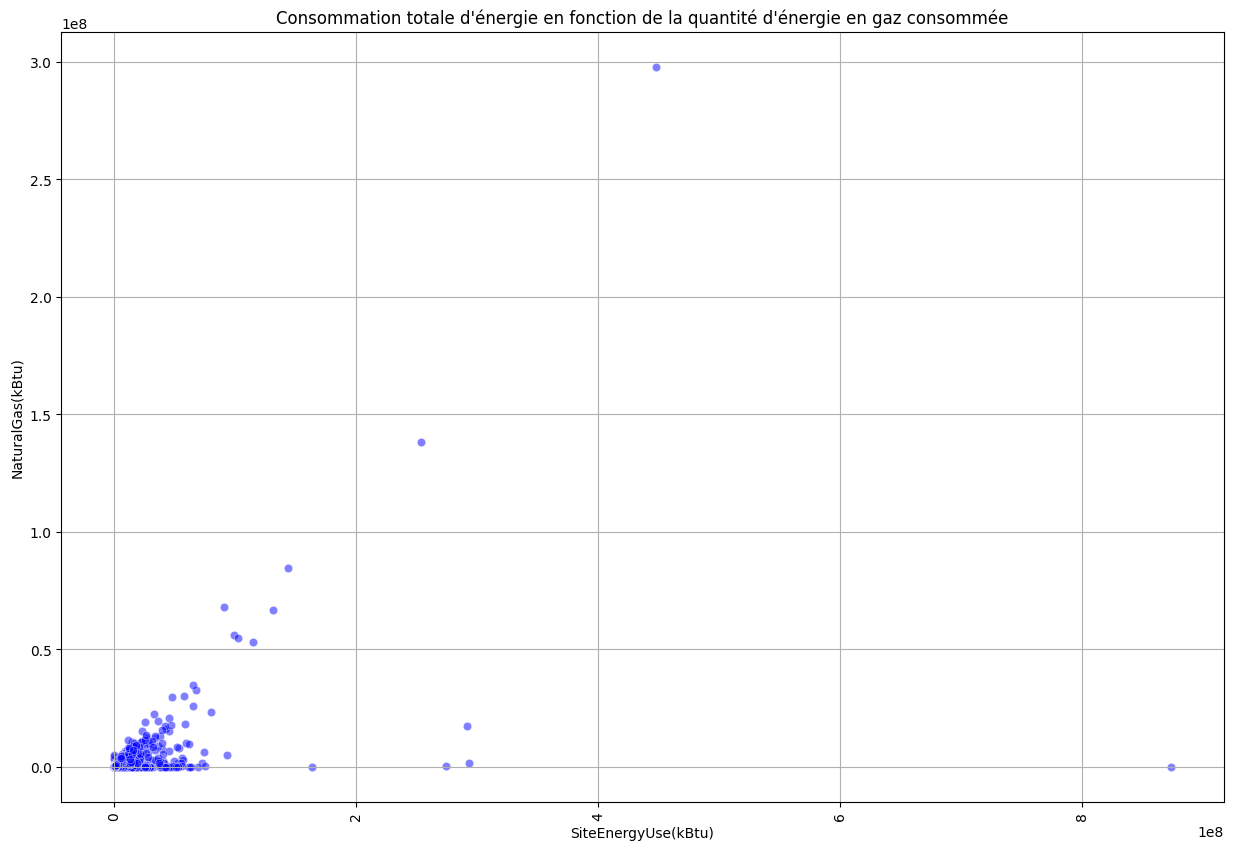

Colonne NaturalGas(kBtu)
Q1 = 0.0, Q3 = 1465150.0, IQR = 1465150.0
Borne inf = -2197725.0, Borne sup = 3662875.0
Nombre d’outliers = 182


array([5.14508200e+06, 8.80399800e+06, 4.71518200e+06, 6.42590000e+06,
       4.59185000e+06, 4.08344000e+06, 1.23314750e+07, 2.06266310e+07,
       2.96021500e+07, 6.69621100e+06, 4.75574500e+06, 5.45121000e+06,
       4.83157200e+06, 2.97909000e+08, 4.79944300e+06, 4.31500100e+06,
       3.95878700e+06, 1.03937370e+07, 2.33249920e+07, 4.10771600e+06,
       6.81457000e+06, 4.59801600e+06, 8.47865100e+06, 7.39968500e+06,
       9.06978000e+06, 4.33194900e+06, 4.19320700e+06, 7.83967000e+06,
       3.28535120e+07, 3.74949900e+06, 1.29871660e+07, 5.73270800e+06,
       3.46853310e+07, 1.14925030e+07, 3.92035000e+06, 1.38191238e+08,
       4.32704400e+06, 5.80043000e+06, 4.31891700e+06, 5.42750000e+06,
       6.60612100e+06, 4.06049600e+06, 5.29396100e+06, 3.75088200e+06,
       5.64120000e+06, 1.03175180e+07, 1.81389200e+07, 6.49455500e+06,
       4.69564100e+06, 8.14530000e+06, 2.56831620e+07, 8.46680940e+07,
       8.37397600e+06, 9.98605900e+06, 1.91311550e+07, 1.02289160e+07,
      

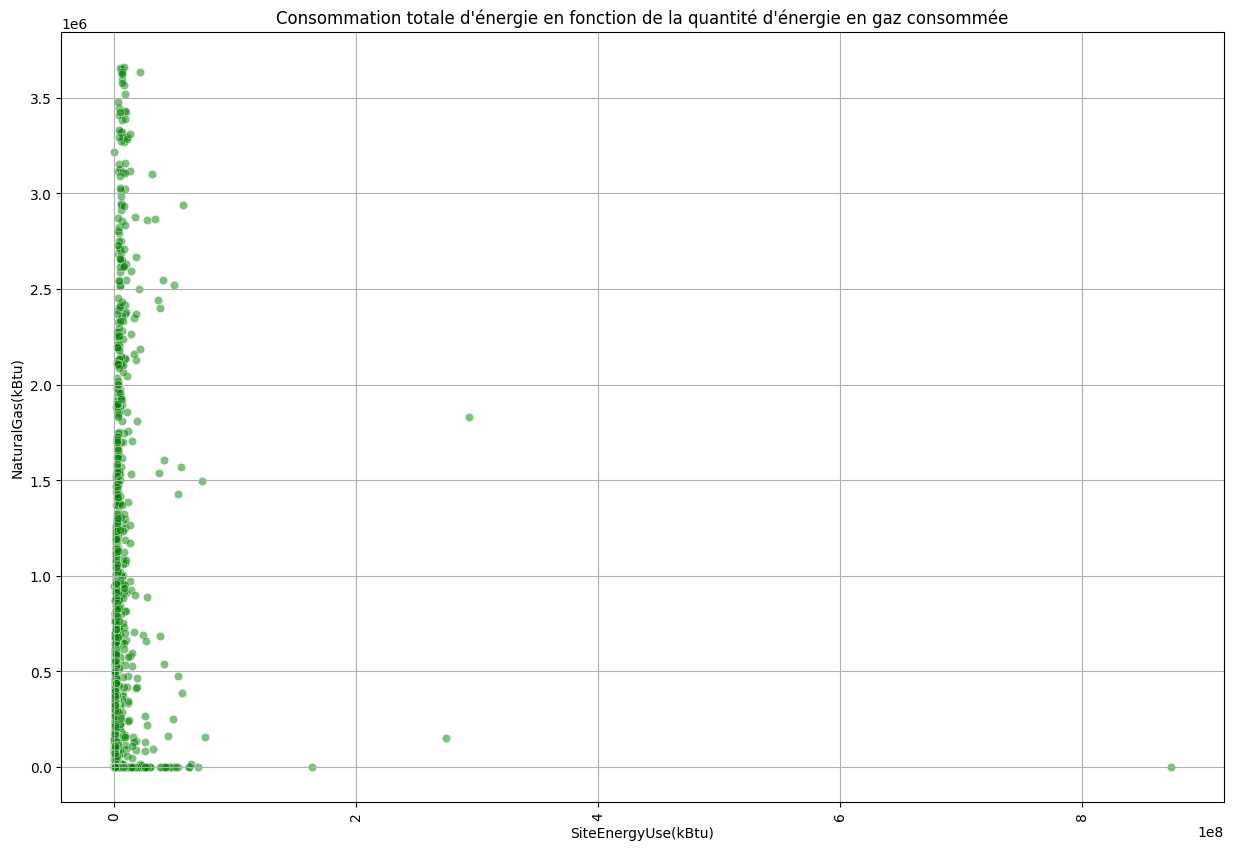

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


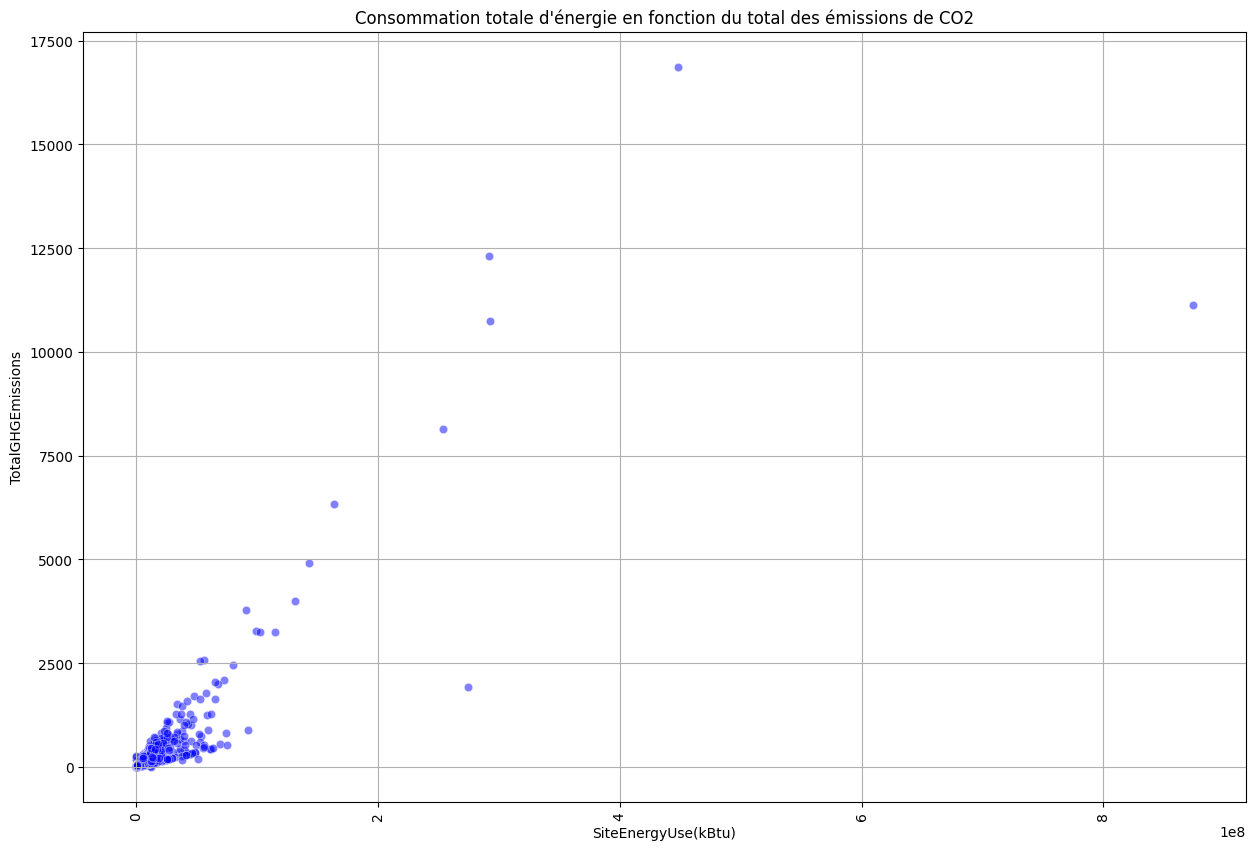

Colonne TotalGHGEmissions
Q1 = 19.814999999999998, Q3 = 135.02499999999998, IQR = 115.20999999999998
Borne inf = -152.99999999999997, Borne sup = 307.8399999999999
Nombre d’outliers = 183


array([ 2089.28,   505.01,   392.16,   691.26,   740.97,   328.23,
         648.62,   511.39,   433.86,   802.89,   349.32,  1265.29,
        1699.45,   388.04,   328.63, 16870.98,   311.84,   584.31,
        2451.58,   430.84,   481.97,   526.85,   607.41,   344.2 ,
         804.2 ,   617.52,   490.73,   674.09,   443.73,   429.12,
        1990.5 ,   866.23,   359.09,   422.39,  2055.82,   723.47,
        8145.52,   362.82,   328.97,   369.14,   309.6 ,   338.16,
         892.63,  1246.55,   388.37,   748.55,  1638.46,  4906.33,
       10734.57,   469.57,   433.6 ,   661.04,  1060.13,   639.39,
         780.84,   377.27,   398.19,   313.3 ,   359.11,   563.25,
         940.47,   318.97,   362.66,   627.87,   546.65,   429.27,
         380.37,   384.27,   741.3 ,   355.05,   530.66,  1084.79,
         337.97,  2573.75,   588.9 ,  1510.85,   530.18,  1468.5 ,
         318.08,   793.05,   316.2 ,   525.78,   418.9 ,   328.83,
         456.22,   530.59,   374.92,   454.49,   349.07,  1268

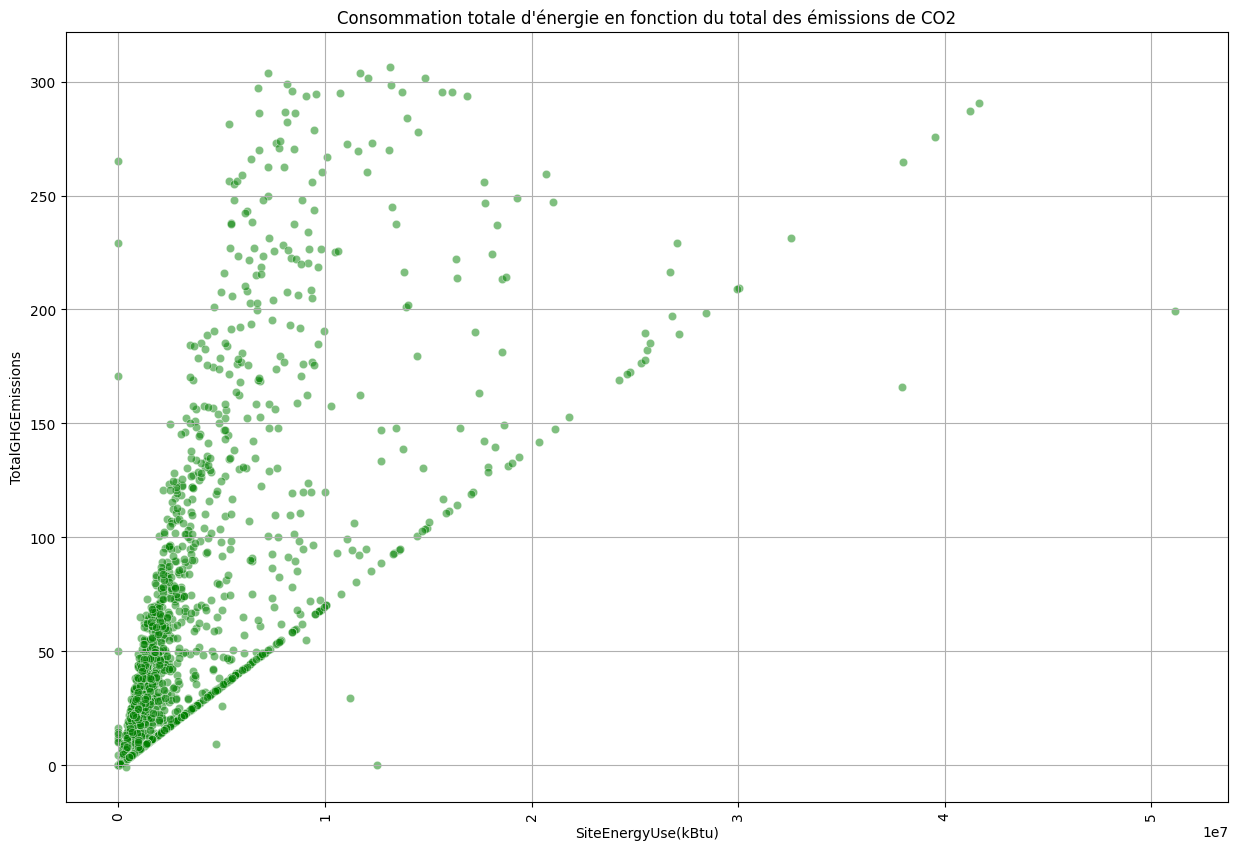

Colonne GHGEmissionsIntensity - Colonne SiteEnergyUse(kBtu)


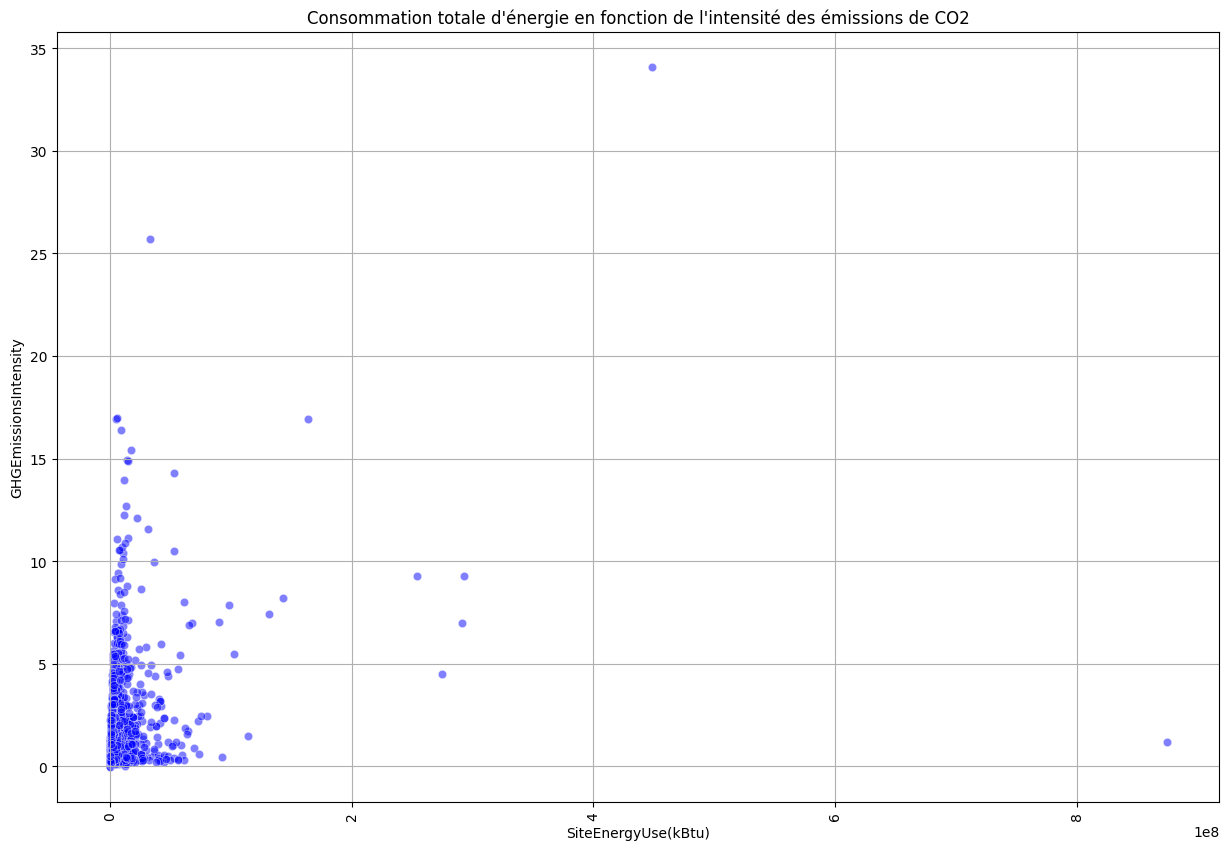

Colonne GHGEmissionsIntensity
Q1 = 0.34, Q3 = 1.87, IQR = 1.53
Borne inf = -1.9549999999999998, Borne sup = 4.165
Nombre d’outliers = 136


array([ 4.67,  4.51,  5.05,  5.55,  4.18,  4.75,  4.41, 34.09, 11.12,
        4.83,  6.98,  6.87,  4.27,  9.27,  5.45,  4.51,  8.21,  9.26,
        4.39,  8.67,  4.35,  6.  ,  5.82,  6.31,  4.75,  4.94,  4.42,
        7.99,  4.89,  7.45,  4.55,  5.74,  4.85, 10.5 ,  7.12,  4.66,
       13.98,  4.59,  5.02,  4.51,  5.2 ,  4.95,  9.98,  4.48,  6.97,
        6.49,  4.45, 10.41,  6.69,  5.96,  5.66, 25.71,  9.43,  5.54,
        9.11,  6.31,  6.01,  6.63,  9.85,  7.39,  6.55,  4.55, 10.1 ,
        7.08,  6.29, 15.42,  5.64,  8.62, 12.27,  5.39,  4.44,  6.84,
        5.55,  6.66,  7.14,  4.32,  9.19,  6.64, 10.57,  7.97,  7.89,
        6.01,  5.47,  4.68,  7.18,  4.17, 14.94,  4.96,  5.19, 16.38,
        6.8 ,  6.7 , 10.68, 10.54, 10.9 ,  6.23,  4.8 ,  7.02, 14.89,
        4.45,  6.66,  4.33,  6.61,  8.79,  5.31, 12.09,  7.87,  5.96,
        5.26,  4.99, 12.69,  6.12,  4.76,  8.4 ,  7.57,  5.47,  5.23,
        5.95,  6.52,  5.26,  4.67,  4.21,  6.62,  5.91,  7.41, 14.32,
       11.57,  5.97,

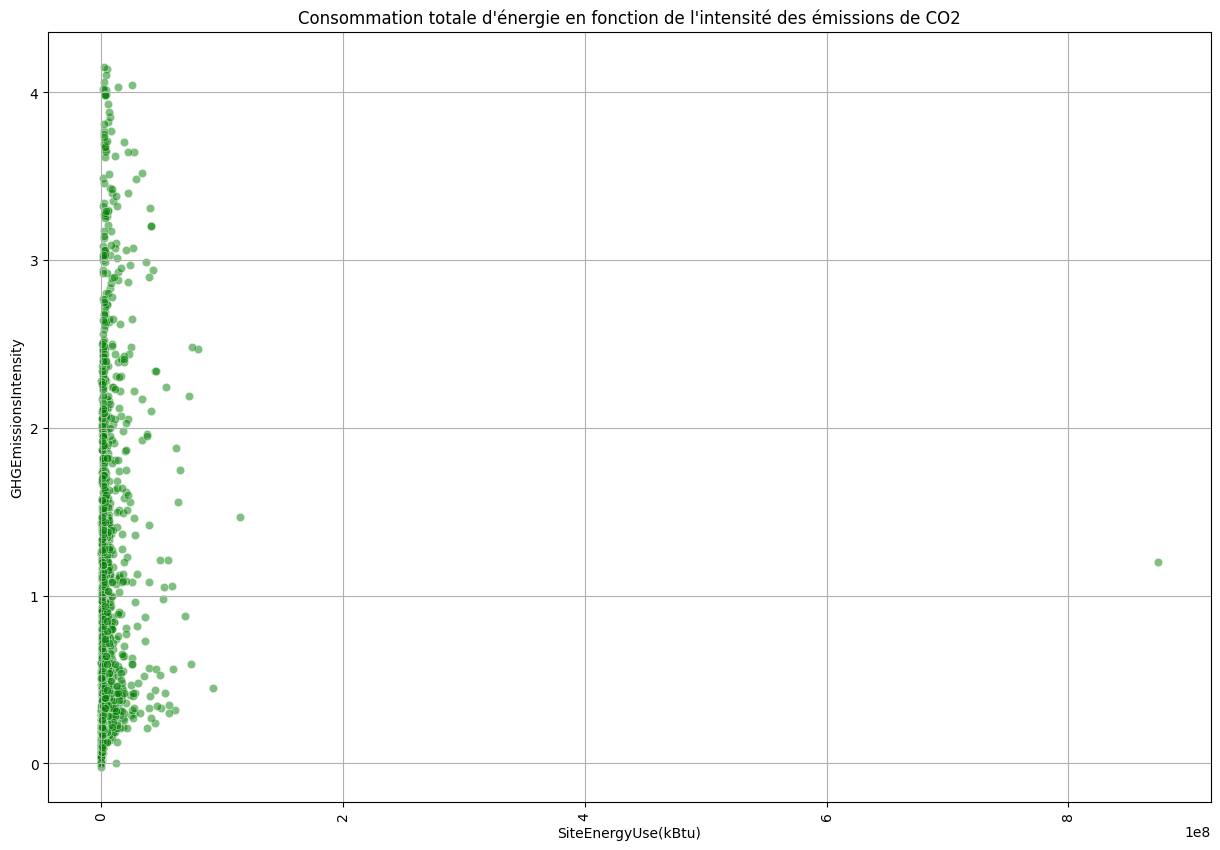


------------------------------- Total des émissions de CO2 ------------------------------- 

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


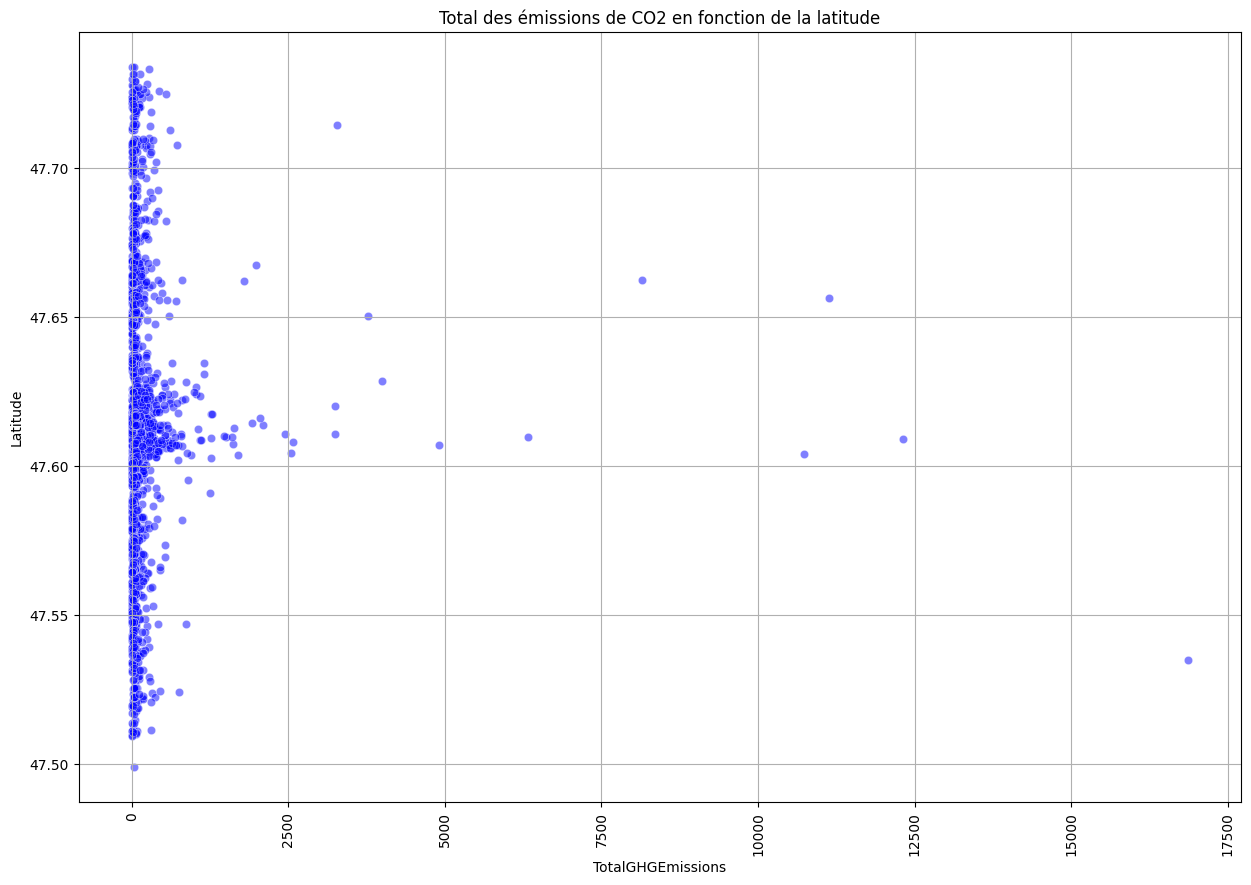

Colonne Latitude
Q1 = 47.58528, Q3 = 47.64963, IQR = 0.06435000000000457
Borne inf = 47.48875499999999, Borne sup = 47.74615500000001
Nombre d’outliers = 0


array([], dtype=float64)

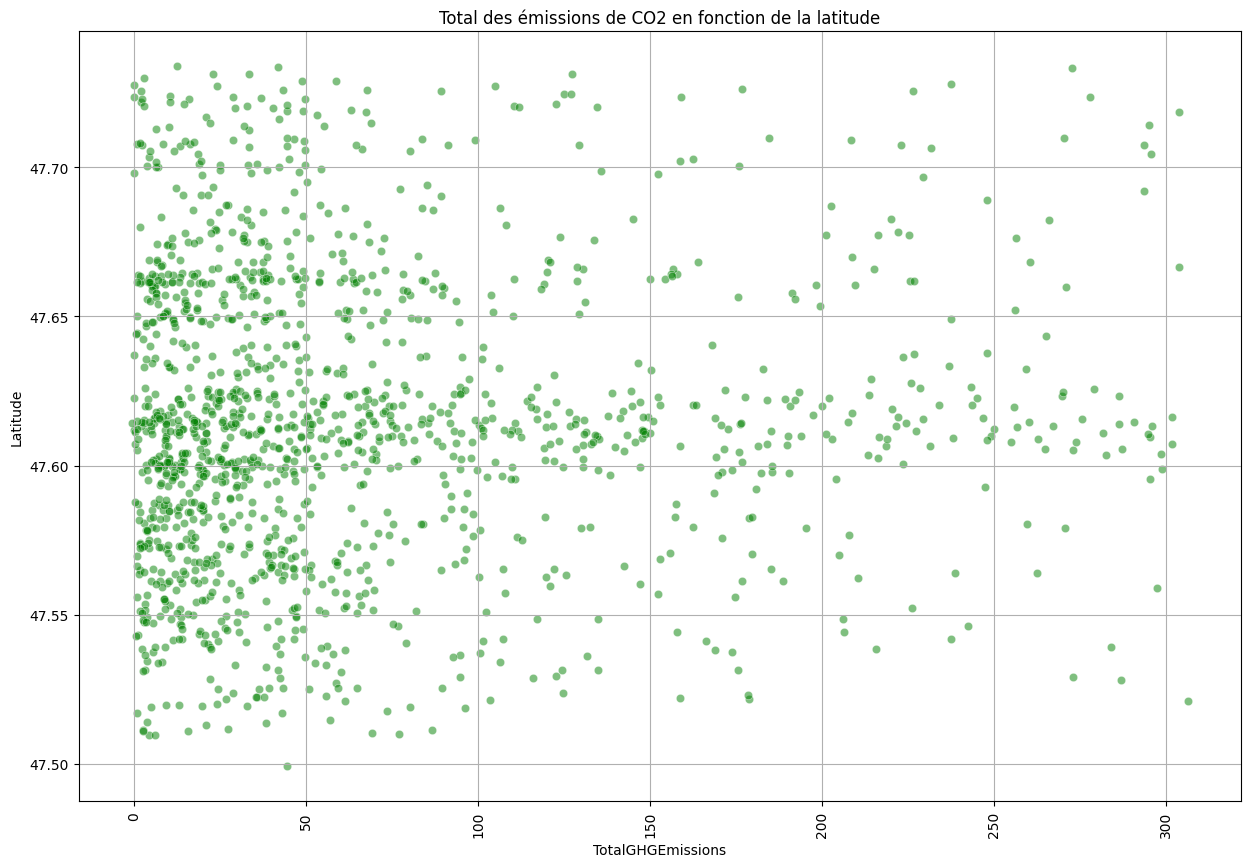

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


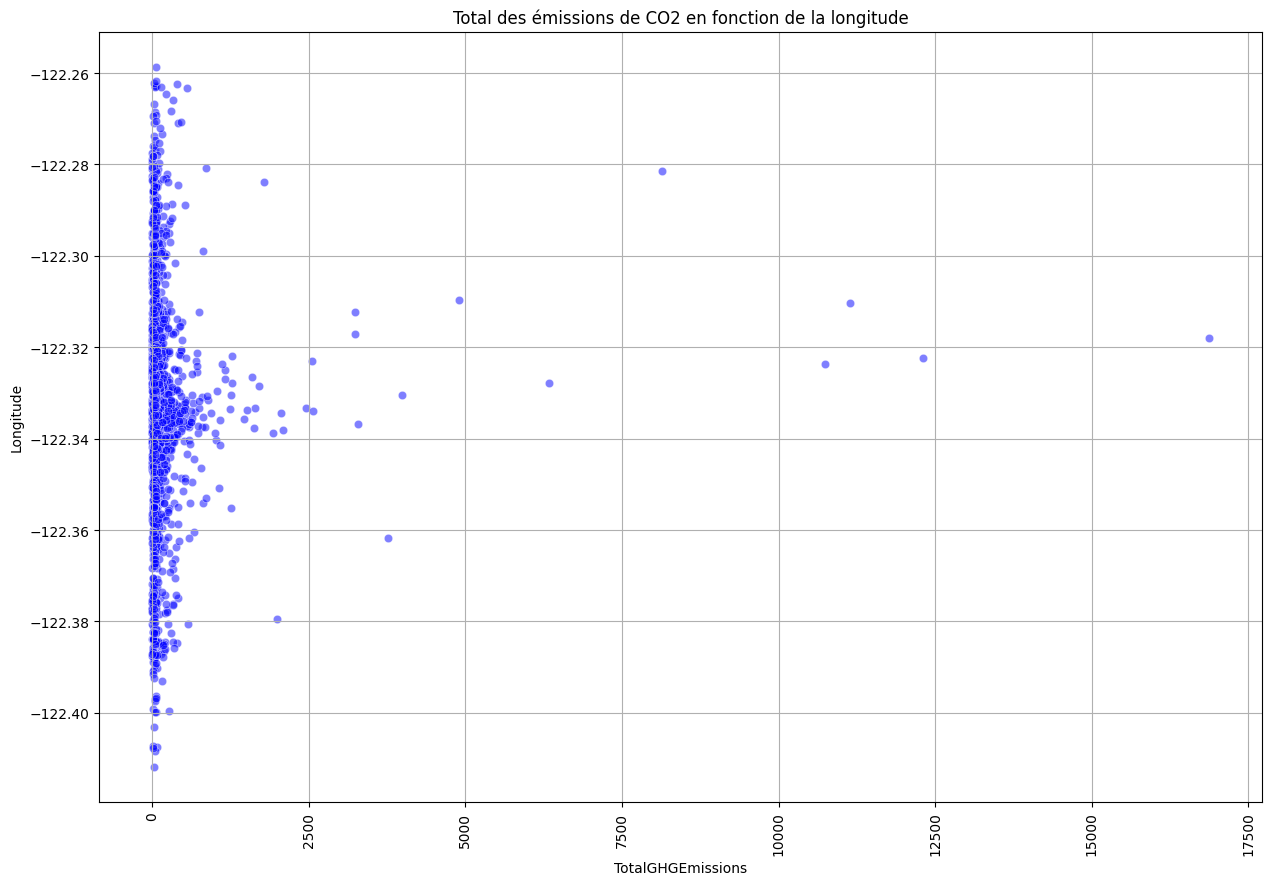

Colonne Longitude
Q1 = -122.34086, Q3 = -122.32283, IQR = 0.018030000000010205
Borne inf = -122.36790500000002, Borne sup = -122.29578499999998
Nombre d’outliers = 78


array([-122.29301, -122.29498, -122.29058, -122.29365, -122.29087,
       -122.29453, -122.37489, -122.37074, -122.37308, -122.29475,
       -122.29221, -122.29443, -122.3683 , -122.36857, -122.37121,
       -122.29232, -122.3748 , -122.37478, -122.3754 , -122.37059,
       -122.37551, -122.37549, -122.36892, -122.29181, -122.28996,
       -122.3753 , -122.29265, -122.29498, -122.29507, -122.29234,
       -122.29314, -122.29378, -122.29284, -122.29284, -122.36831,
       -122.29135, -122.37349, -122.29505, -122.29342, -122.29264,
       -122.29521, -122.29545, -122.37418, -122.37428, -122.37502,
       -122.37307, -122.37246, -122.37185, -122.37316, -122.37439,
       -122.37283, -122.37402, -122.37194, -122.2918 , -122.29278,
       -122.37223, -122.37507, -122.37428, -122.37412, -122.37387,
       -122.37417, -122.29002, -122.28967, -122.29023, -122.37056,
       -122.36918, -122.37346, -122.2956 , -122.29006, -122.37039,
       -122.29153, -122.37133, -122.28998, -122.29396, -122.29

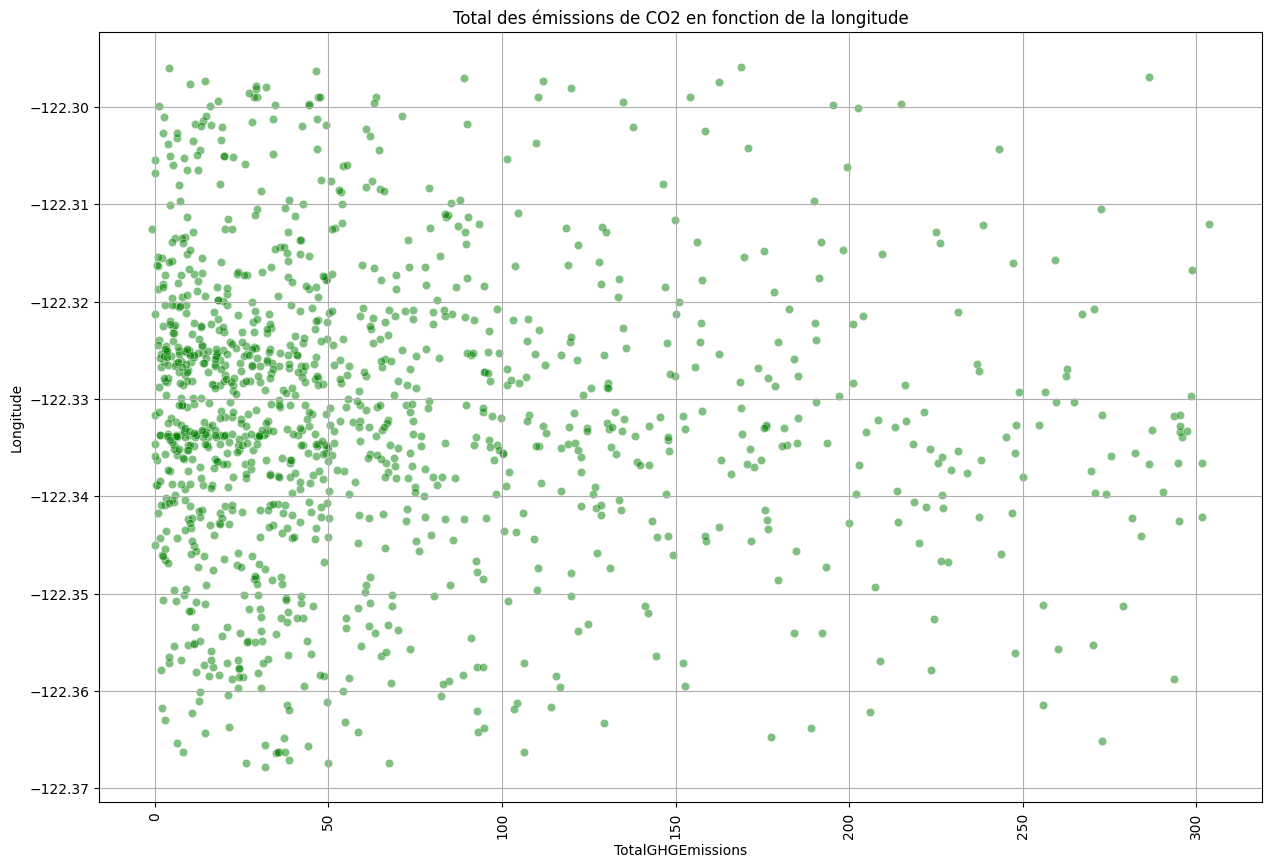

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


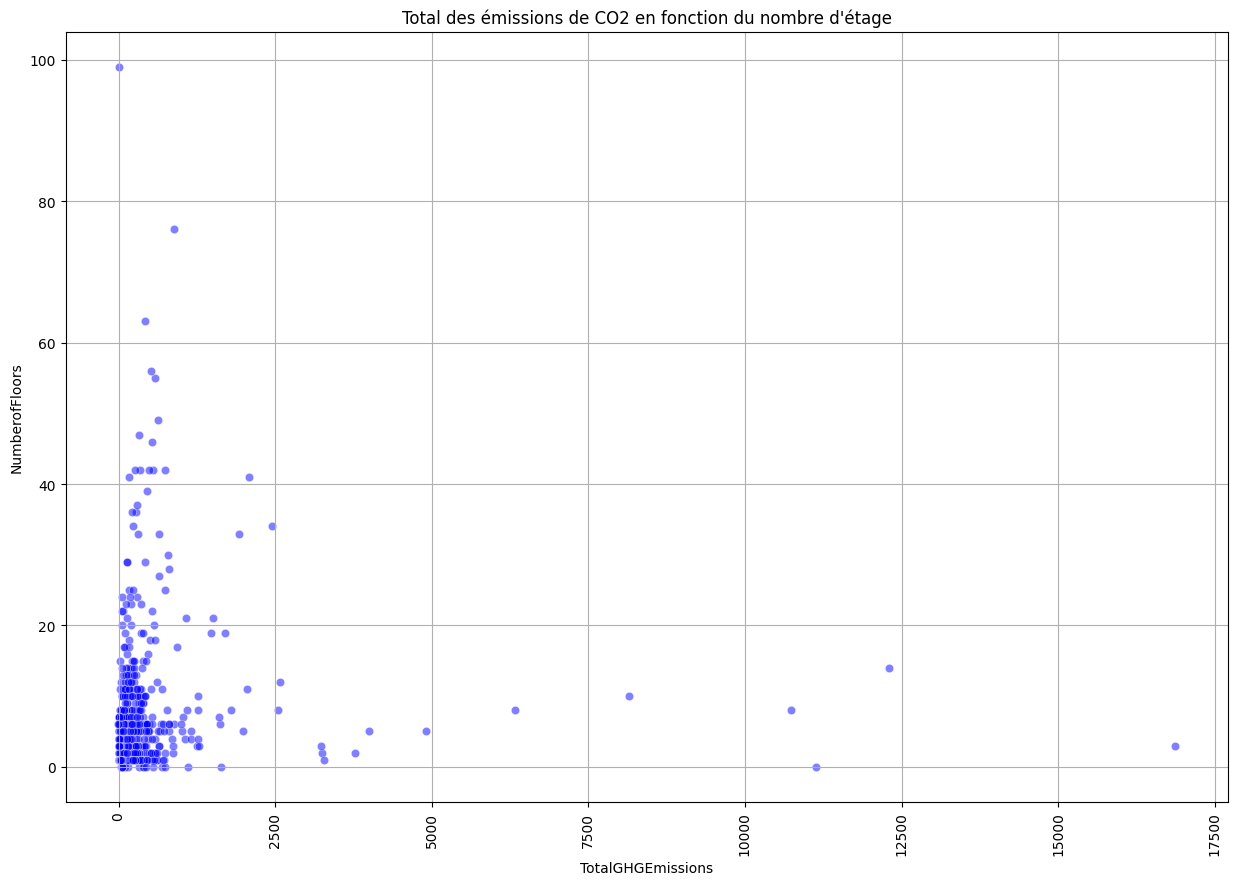

Colonne NumberofFloors
Q1 = 1.0, Q3 = 4.0, IQR = 3.0
Borne inf = -3.5, Borne sup = 8.5
Nombre d’outliers = 0


array([], dtype=float64)

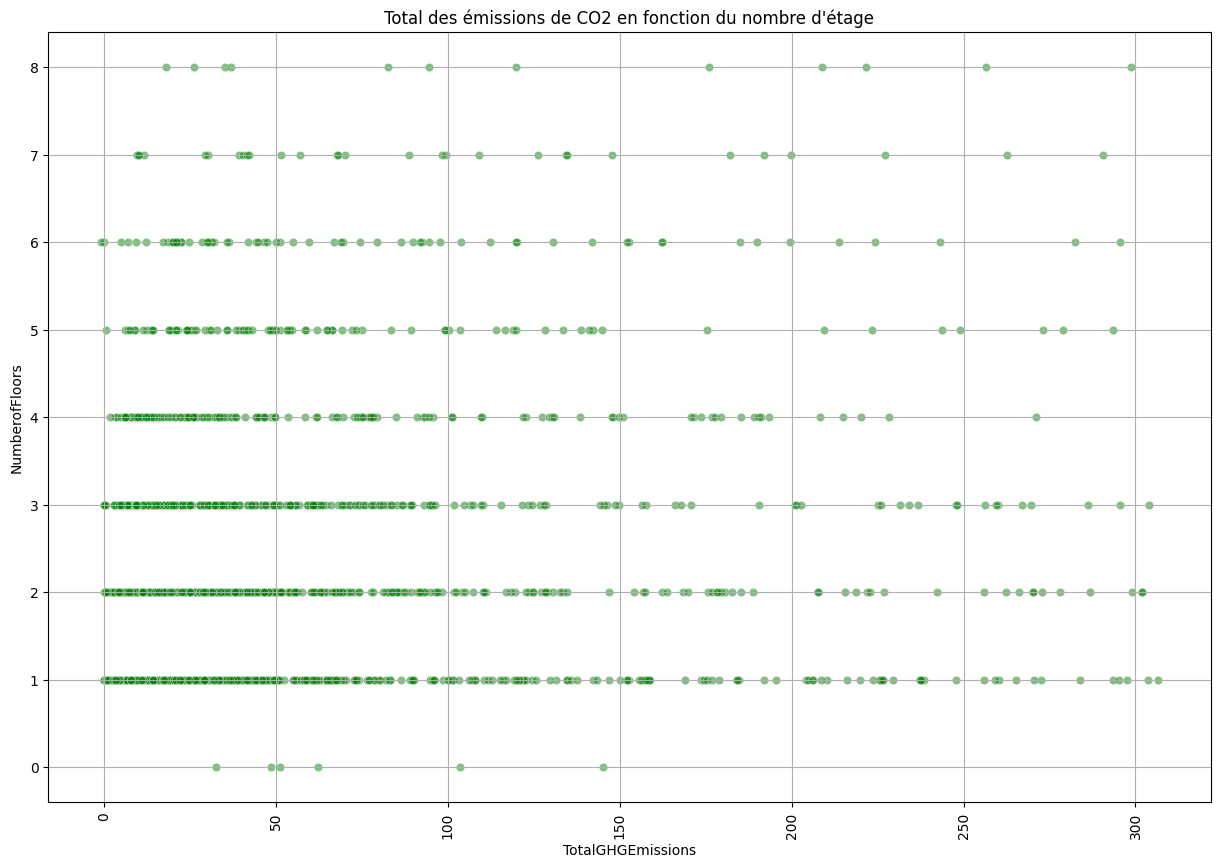

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


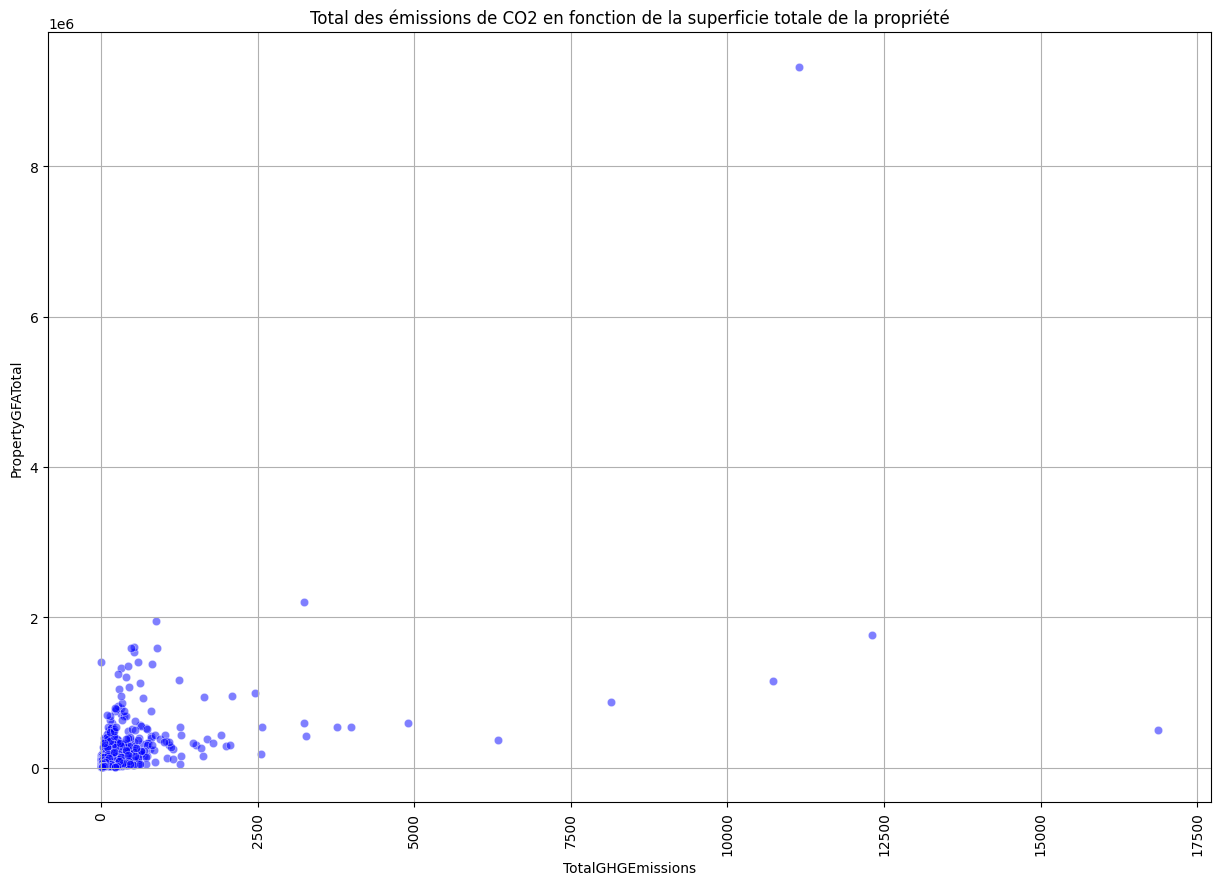

Colonne PropertyGFATotal
Q1 = 27828.5, Q3 = 74571.0, IQR = 46742.5
Borne inf = -42285.25, Borne sup = 144684.75
Nombre d’outliers = 102


array([175580., 163984., 153163., 158676., 171866., 160645., 175565.,
       175015., 168115., 150453., 155602., 179014., 194104., 206934.,
       190980., 162222., 173185., 145341., 184125., 160270., 207656.,
       179161., 168449., 208981., 204961., 190000., 215476., 203504.,
       204790., 206000., 157941., 172842., 186768., 201480., 199530.,
       192630., 176532., 151039., 147852., 193500., 206950., 213834.,
       158600., 213283., 158415., 158738., 164437., 184482., 159700.,
       209816., 196749., 191276., 144776., 154660., 181694., 161678.,
       154029., 161789., 168619., 175885., 175918., 169785., 154159.,
       164380., 160580., 184322., 205521., 191146., 158931., 165111.,
       159937., 183964., 208210., 187130., 154330., 167860., 145158.,
       149881., 202623., 150000., 169020., 216571., 189175., 188339.,
       156188., 179413., 170632., 150545., 152365., 147545., 206126.,
       155795., 160000., 178000., 162157., 157345., 192259., 146363.,
       149856., 1762

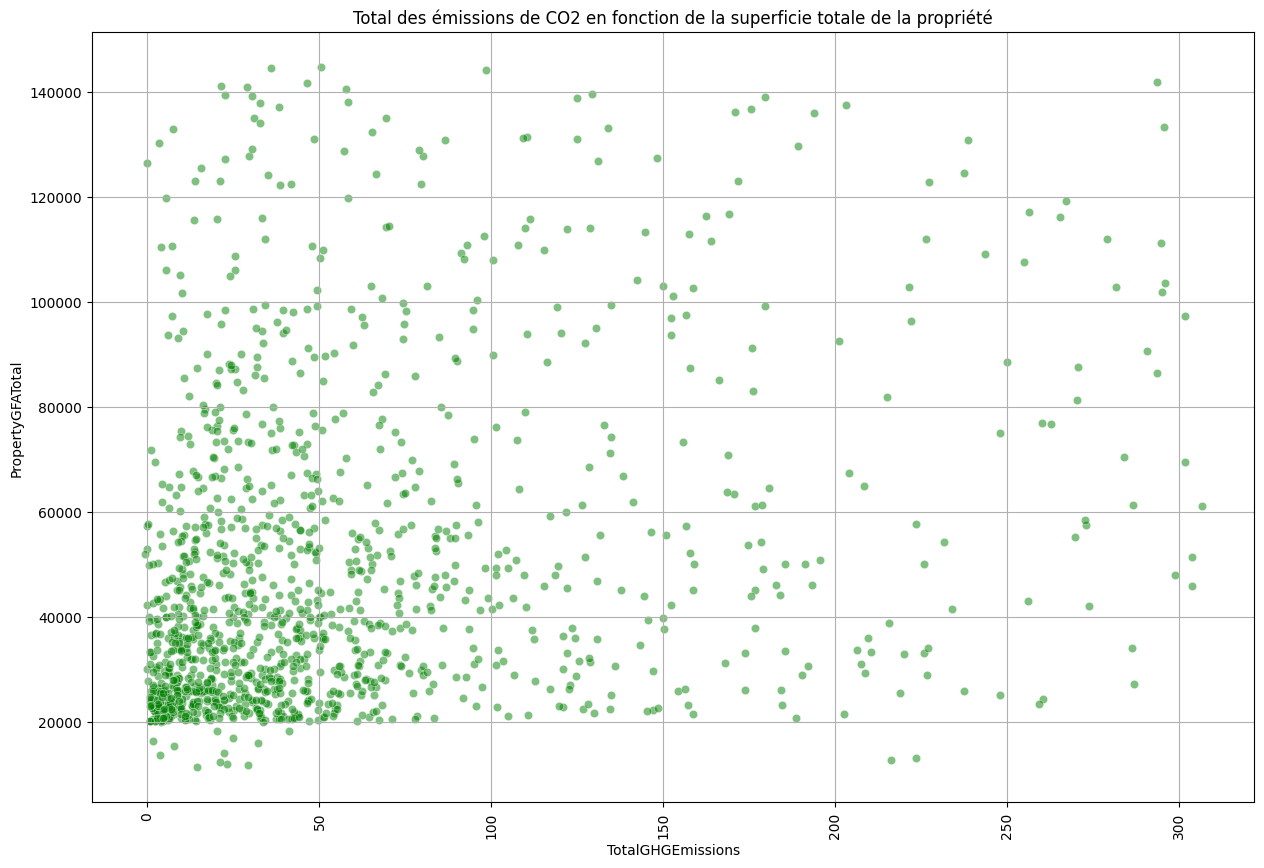

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


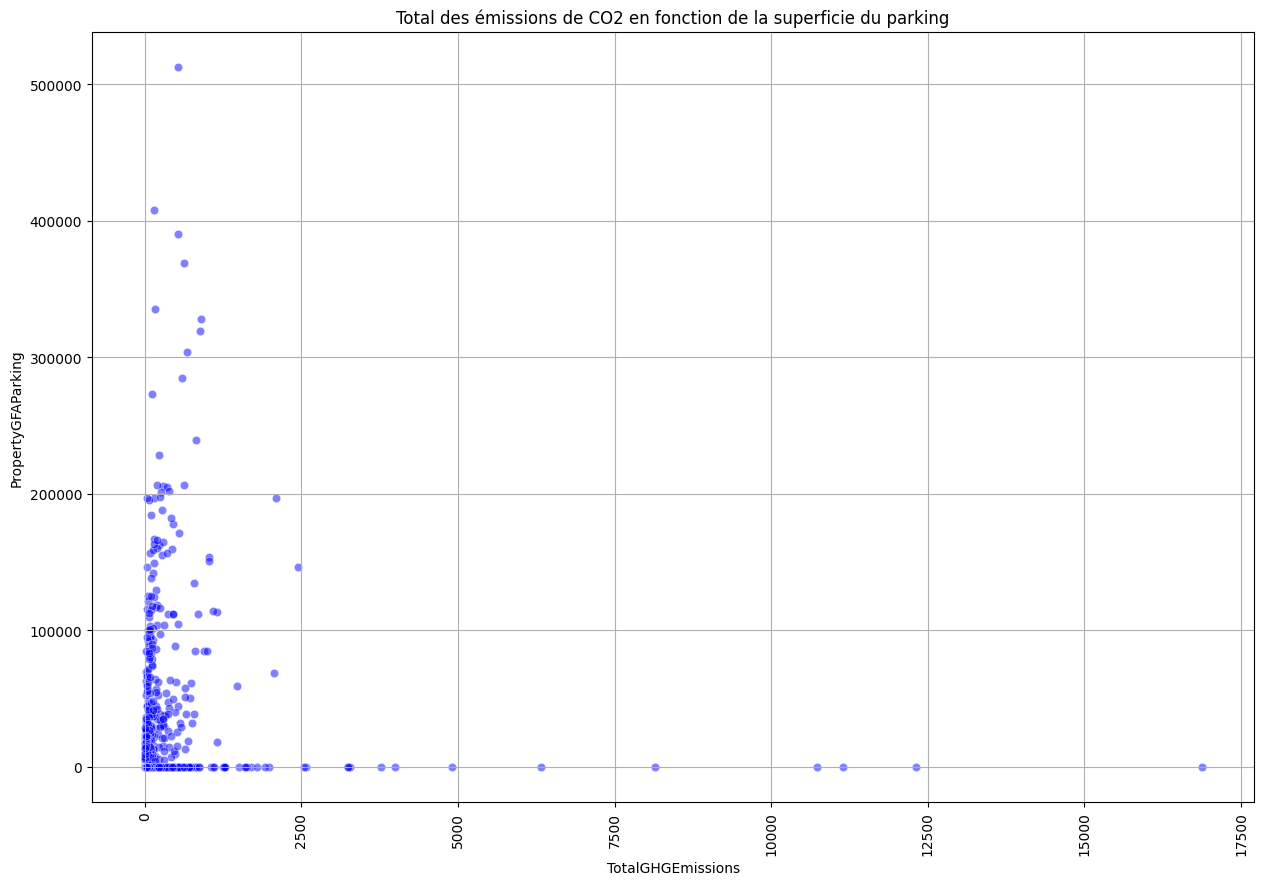

Colonne PropertyGFAParking
Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Borne inf = 0.0, Borne sup = 0.0
Nombre d’outliers = 0


array([], dtype=float64)

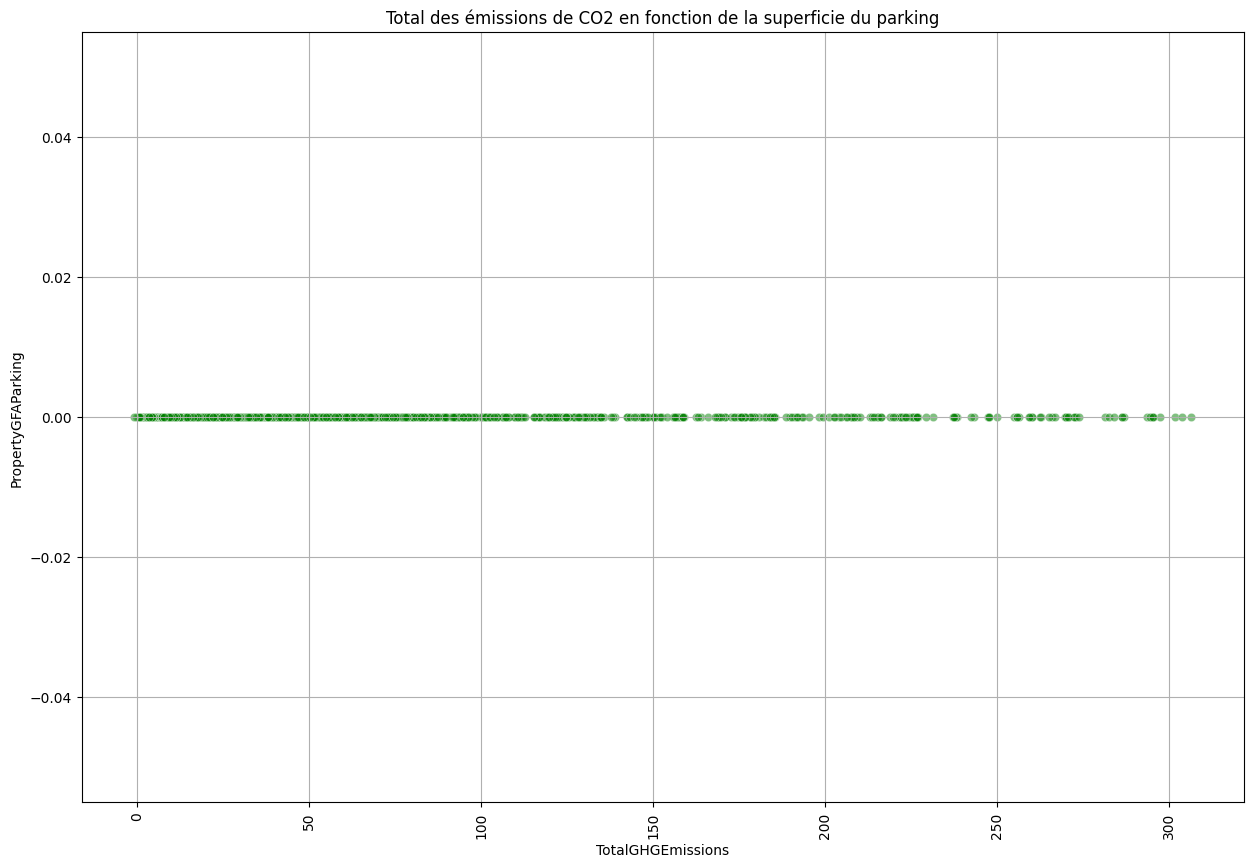

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


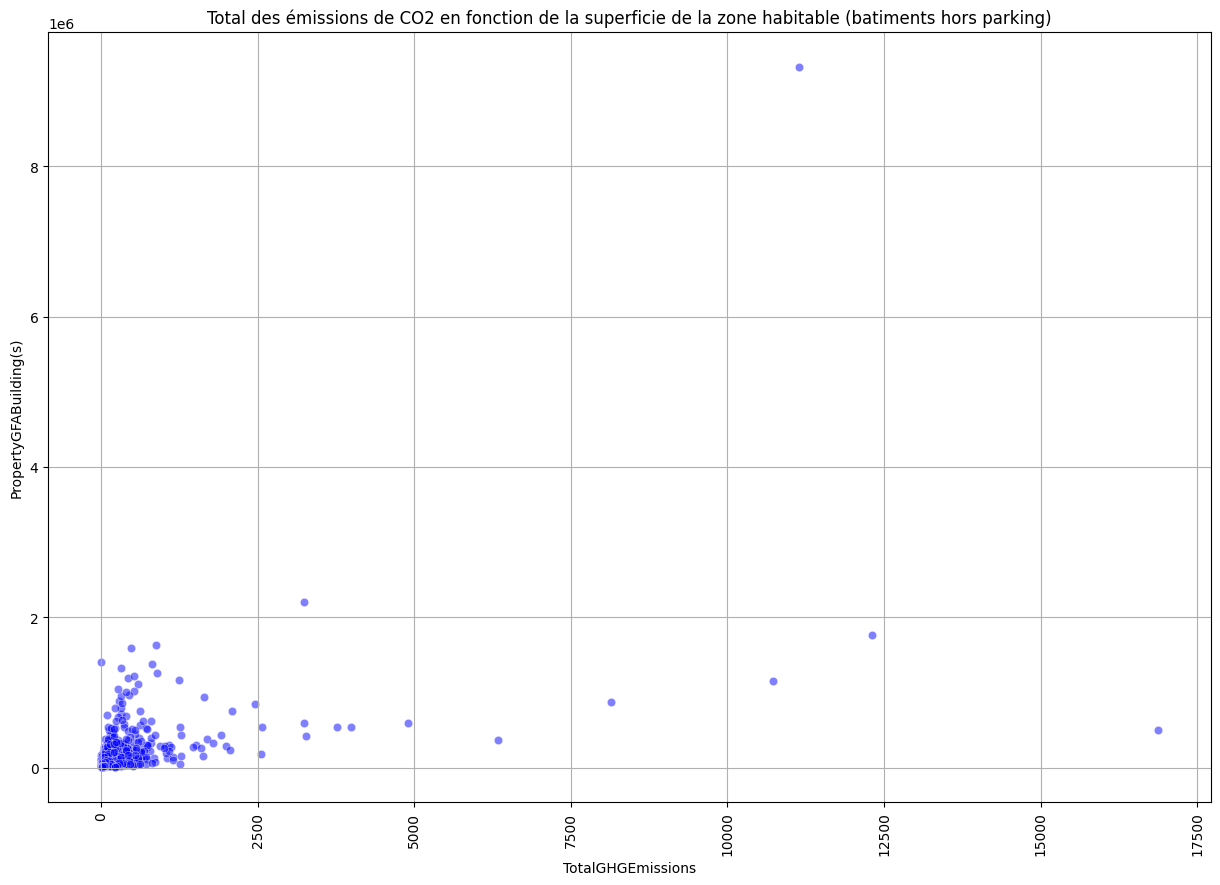

Colonne PropertyGFABuilding(s)
Q1 = 27042.5, Q3 = 69654.5, IQR = 42612.0
Borne inf = -36875.5, Borne sup = 133572.5
Nombre d’outliers = 96


array([163984., 133884., 133585., 160645., 175565., 175015., 168115.,
       179014., 194104., 190980., 148022., 173185., 145341., 184125.,
       160270., 136188., 153315., 179161., 153882., 134918., 151000.,
       174790., 146922., 162993., 168870., 137929., 185760., 144118.,
       191117., 135918., 137350., 151039., 137400., 189629., 155500.,
       162000., 158415., 158738., 164437., 172371., 136143., 193198.,
       144776., 166128., 140302., 154660., 140415., 143508., 161678.,
       140520., 168619., 138509., 191000., 154159., 164380., 160580.,
       184322., 174226., 144050., 163504., 137201., 187130., 154330.,
       167860., 145158., 149881., 143439., 183574., 157186., 169020.,
       189175., 141686., 156188., 142510., 179413., 170632., 162150.,
       141718., 152365., 147545., 155795., 138907., 160000., 138705.,
       178000., 162157., 157345., 136758., 192259., 137138., 146363.,
       187027., 149856., 176225., 166991., 144614.])

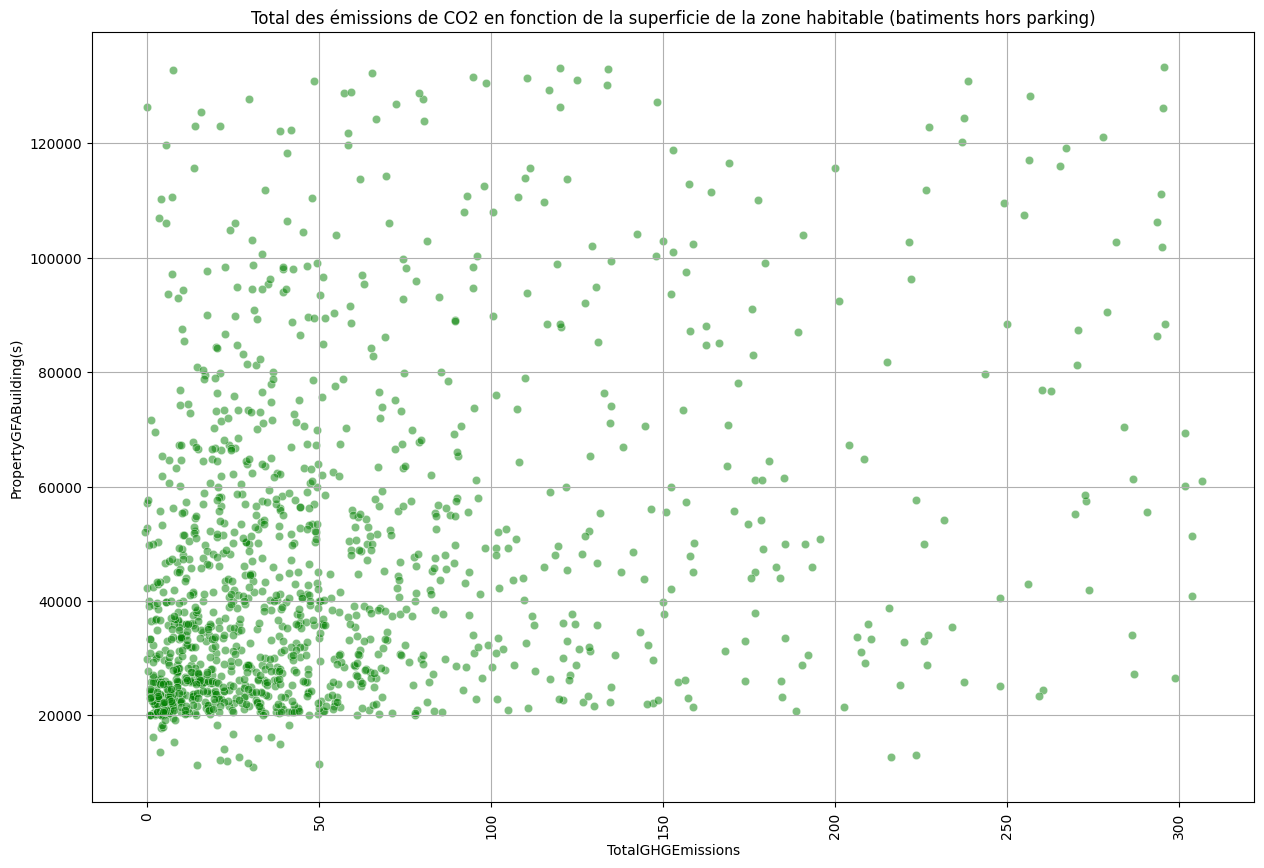

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


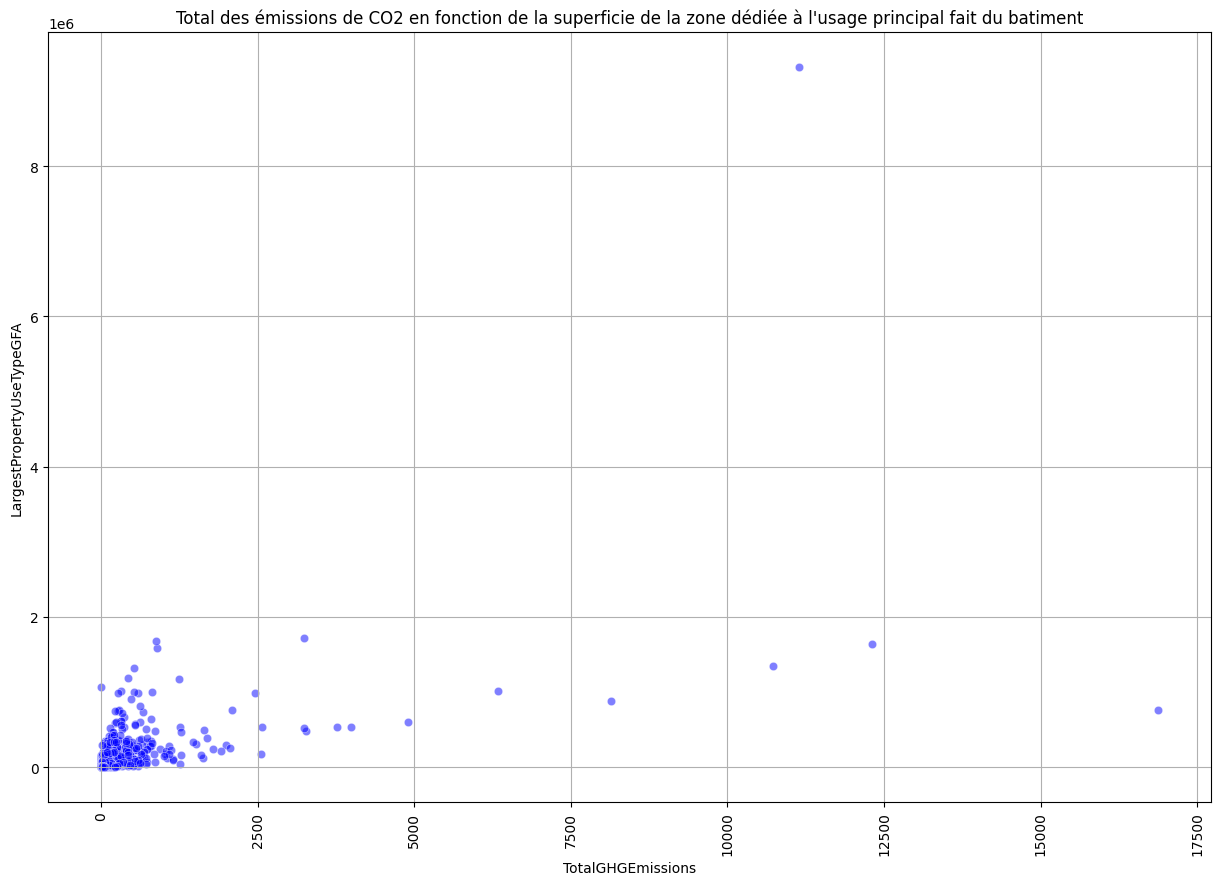

Colonne LargestPropertyUseTypeGFA
Q1 = 24109.0, Q3 = 66588.0, IQR = 42479.0
Borne inf = -39609.5, Borne sup = 130306.5
Nombre d’outliers = 106


array([163984., 133884., 164229., 182861., 175015., 155602., 179014.,
       134446., 131909., 190980., 189750., 135520., 137565., 173185.,
       139069., 184125., 160270., 136188., 141591., 135006., 134918.,
       146741., 159372., 173786., 142034., 161000., 182540., 161762.,
       160418., 145754., 182820., 146157., 158681., 166919., 144570.,
       166960., 150969., 146689., 155000., 162000., 164332., 158415.,
       155985., 158738., 176171., 168132., 131592., 178628., 175364.,
       156312., 144776., 152579., 138995., 182454., 150840., 162425.,
       140520., 133298., 173106., 160580., 142901., 183916., 144050.,
       170727., 133451., 178625., 171783., 168735., 163082., 156414.,
       138257., 182604., 151740., 145491., 152511., 141917., 149081.,
       178087., 164806., 177748., 146150., 134197., 132828., 130767.,
       180633., 149293., 147545., 150000., 155795., 139557., 160000.,
       162422., 138705., 181930., 157345., 188118., 138602., 160482.,
       146363., 1727

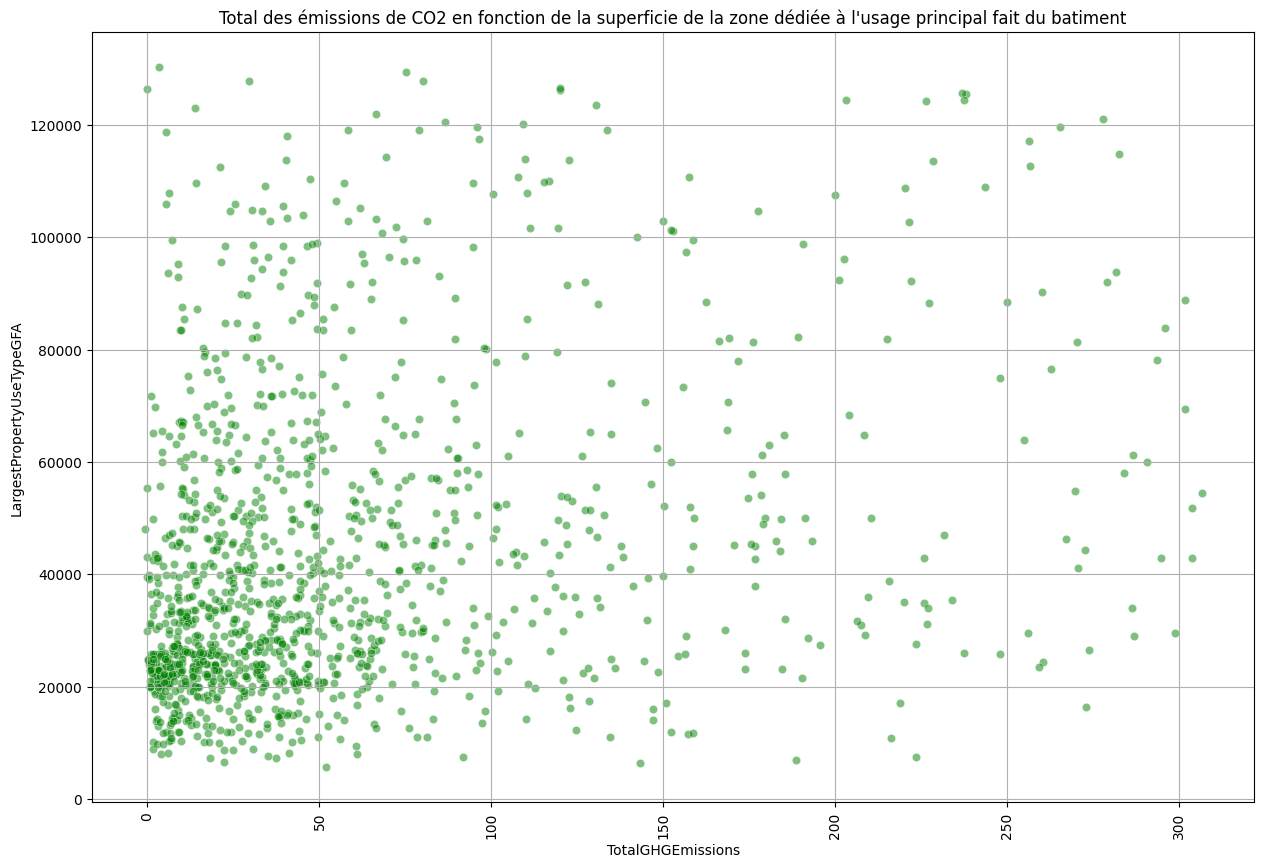

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


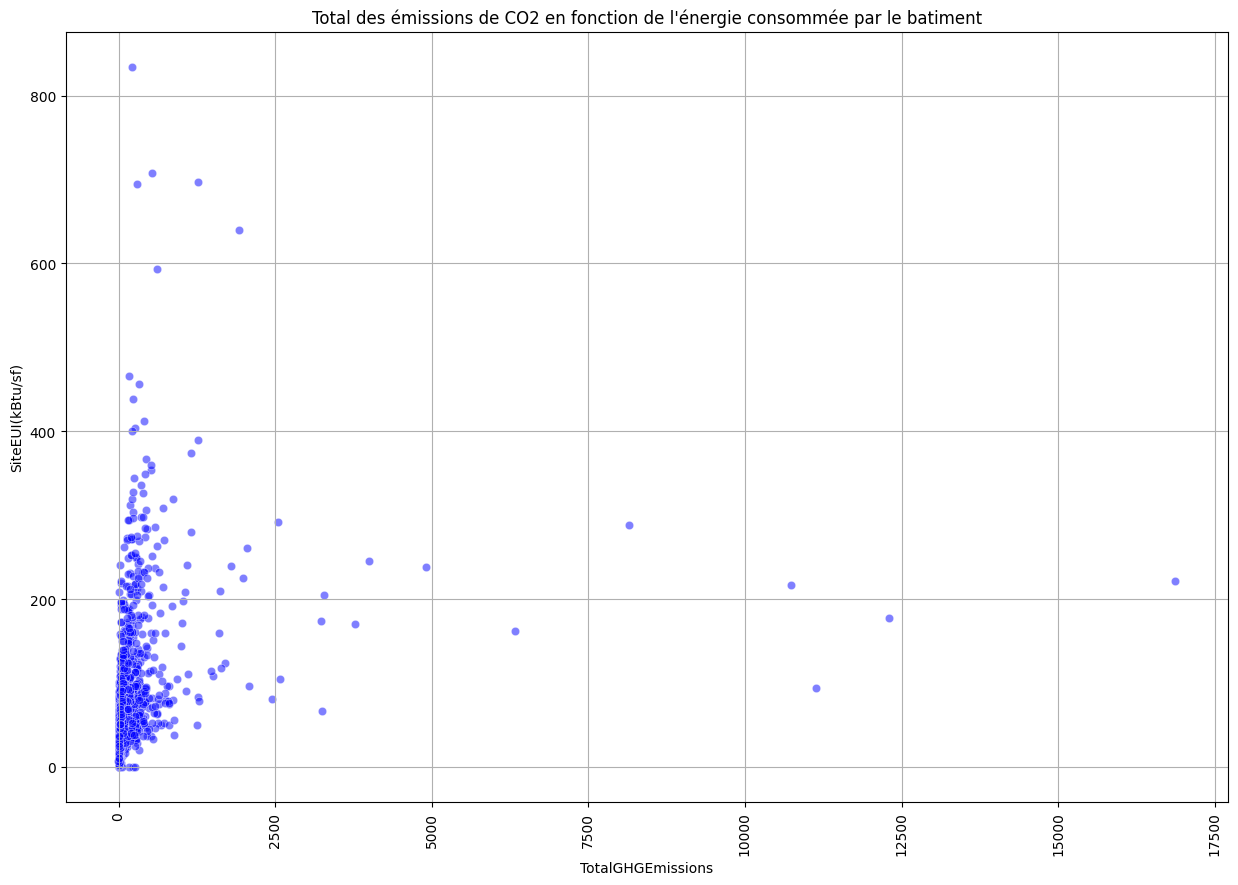

Colonne SiteEUI(kBtu/sf)
Q1 = 31.5, Q3 = 70.0, IQR = 38.5
Borne inf = -26.25, Borne sup = 127.75
Nombre d’outliers = 41


array([136.1000061, 132.3999939, 129.6999969, 130.1000061, 136.1999969,
       141.3999939, 150.8999939, 130.6999969, 150.3000031, 139.8999939,
       146.       , 133.3999939, 136.3000031, 139.8000031, 133.3999939,
       133.1999969, 131.3999939, 129.6999969, 132.8000031, 136.6000061,
       148.3999939, 140.3000031, 150.       , 128.5      , 136.8999939,
       130.6999969, 129.       , 147.8000031, 129.       , 134.       ,
       140.1999969, 134.5      , 138.       , 130.3999939, 130.1000061,
       133.3000031, 149.6000061, 148.       , 144.5      , 139.6999969,
       144.5      ])

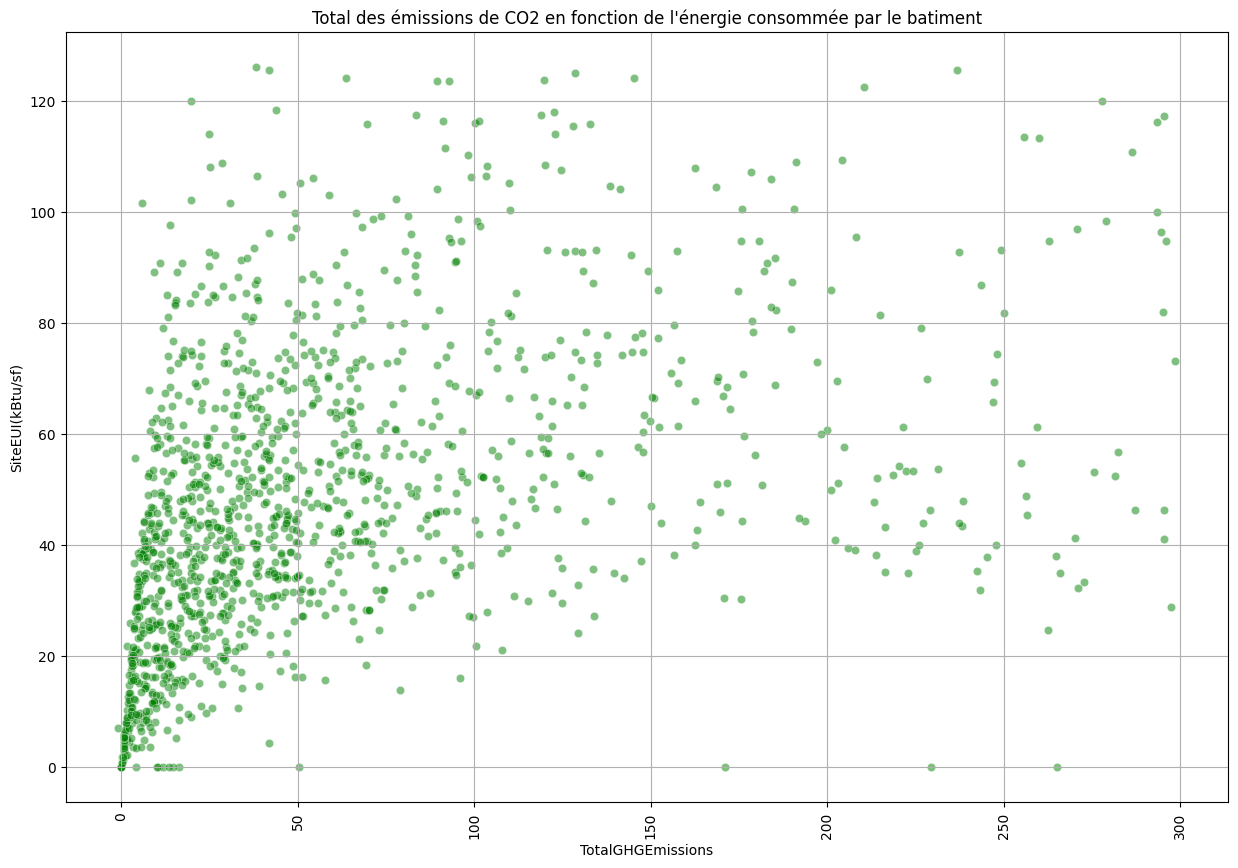

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


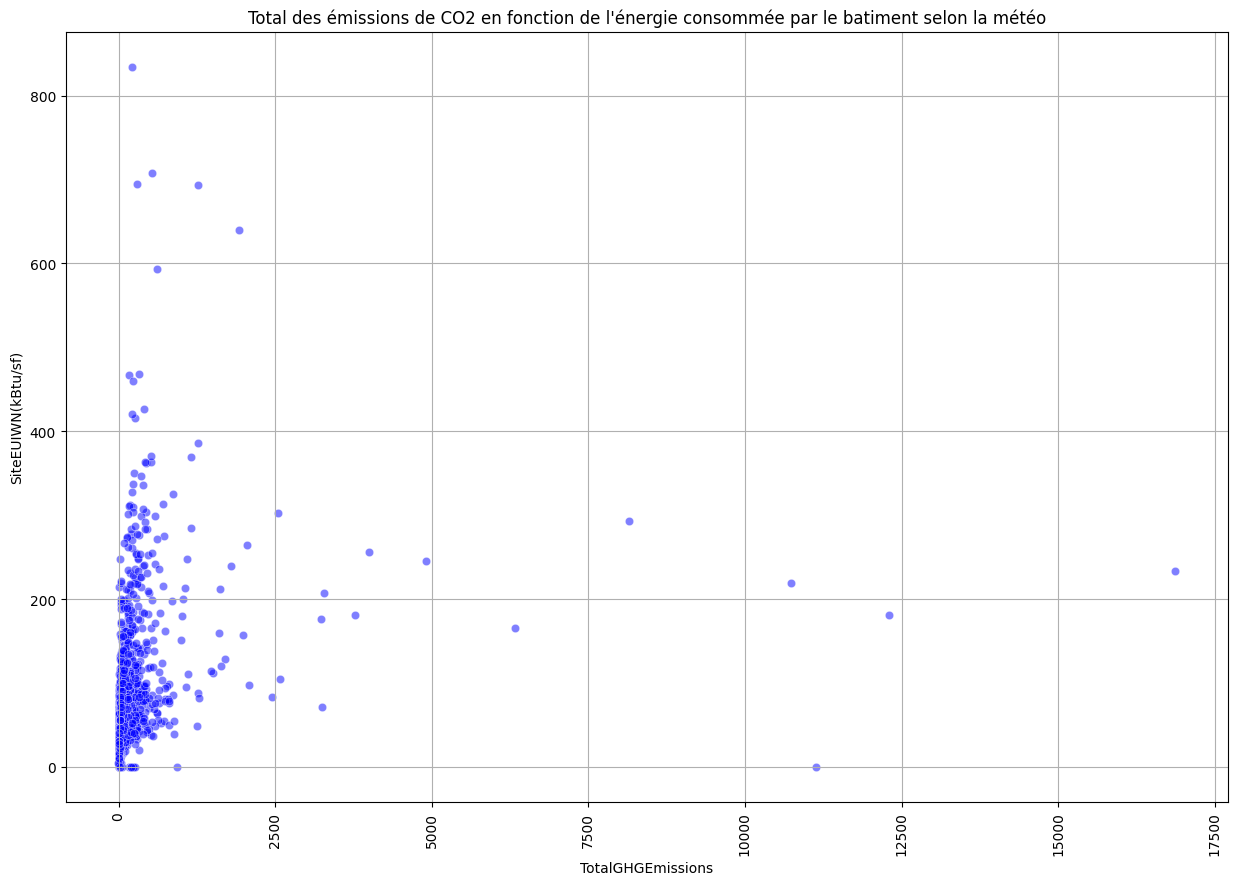

Colonne SiteEUIWN(kBtu/sf)
Q1 = 33.59999847, Q3 = 73.0, IQR = 39.40000153
Borne inf = -25.500003824999993, Borne sup = 132.100002295
Nombre d’outliers = 40


array([141.6000061, 137.1000061, 132.6999969, 141.5      , 147.       ,
       150.8999939, 134.8000031, 150.3000031, 141.6000061, 146.5      ,
       138.8999939, 135.8000031, 139.8000031, 135.6000061, 140.3000031,
       135.6999969, 132.6000061, 137.8000031, 145.1000061, 148.       ,
       147.5      , 156.6999969, 154.8000031, 138.5      , 149.1000061,
       136.6999969, 134.       , 140.1999969, 141.1000061, 145.3999939,
       136.       , 134.6000061, 154.8999939, 138.6000061, 155.5      ,
       147.3000031, 149.1999969, 139.6999969, 134.8000031, 150.8000031])

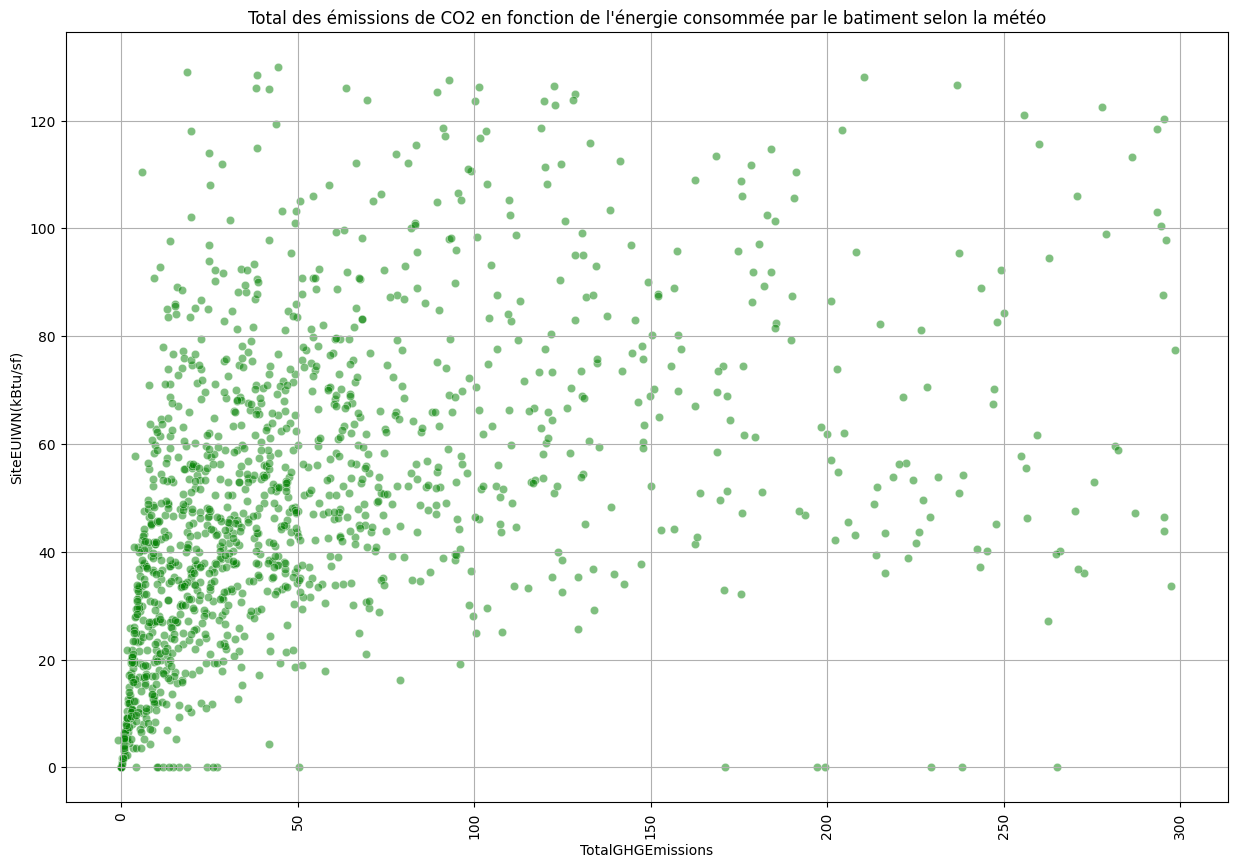

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


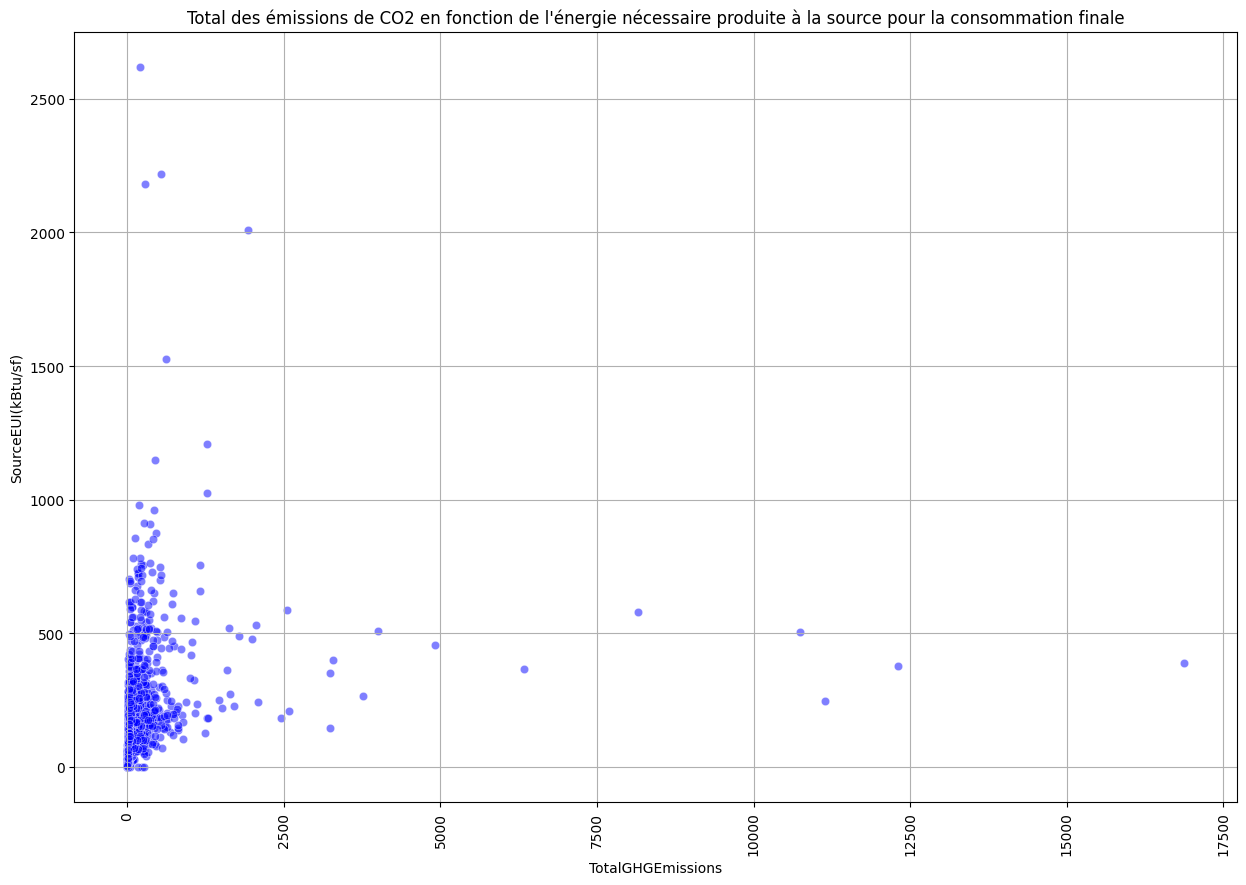

Colonne SourceEUI(kBtu/sf)
Q1 = 71.50000191, Q3 = 179.27500535000001, IQR = 107.77500344000002
Borne inf = -90.16250325000003, Borne sup = 340.93751051000004
Nombre d’outliers = 34


array([388.2000122, 368.8999939, 361.2000122, 343.6000061, 360.3999939,
       350.2999878, 358.6000061, 343.1000061, 388.3999939, 388.8999939,
       363.6000061, 368.5      , 377.       , 360.7000122, 371.6000061,
       375.7000122, 367.3999939, 390.7000122, 390.1000061, 349.       ,
       364.       , 351.6000061, 382.2999878, 353.2000122, 358.1000061,
       376.3999939, 351.7000122, 377.2999878, 366.3999939, 372.2999878,
       363.7000122, 367.8999939, 367.       , 380.1000061])

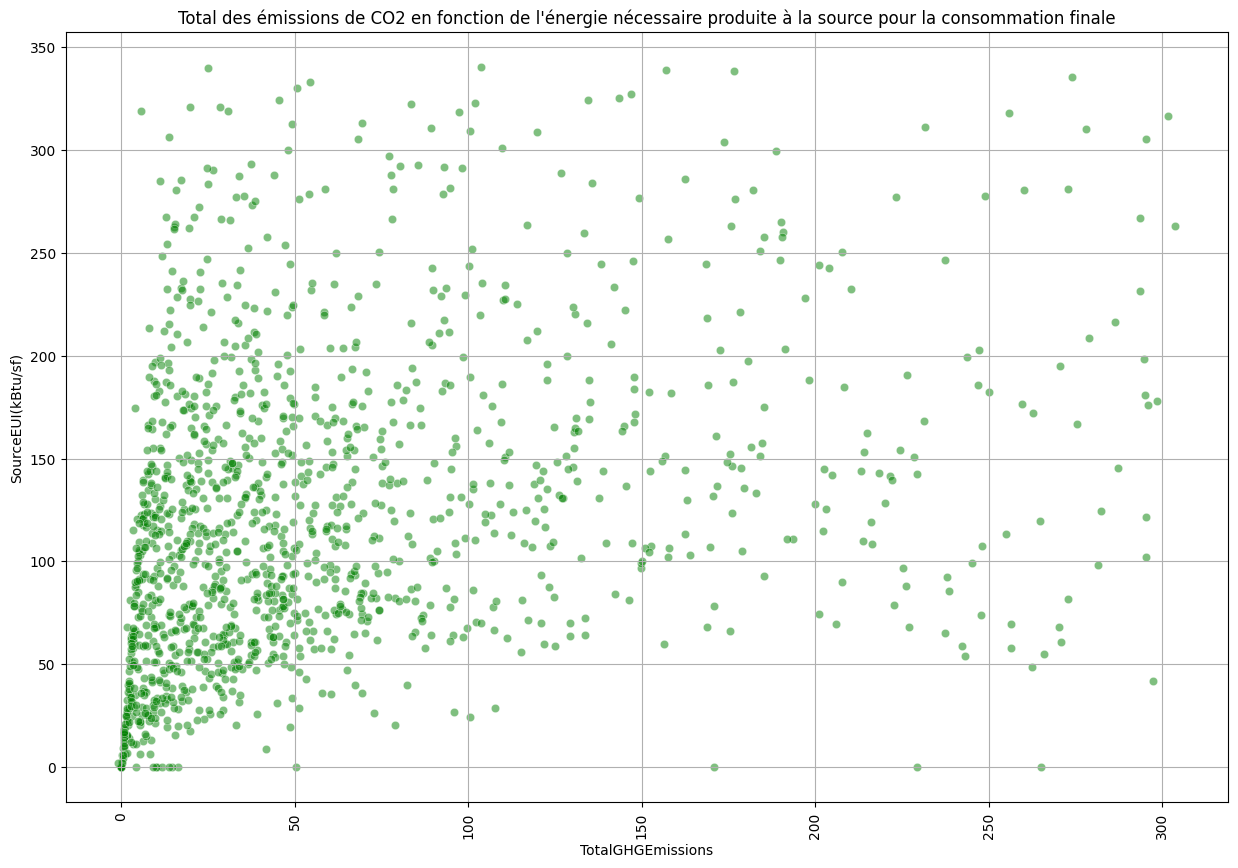

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


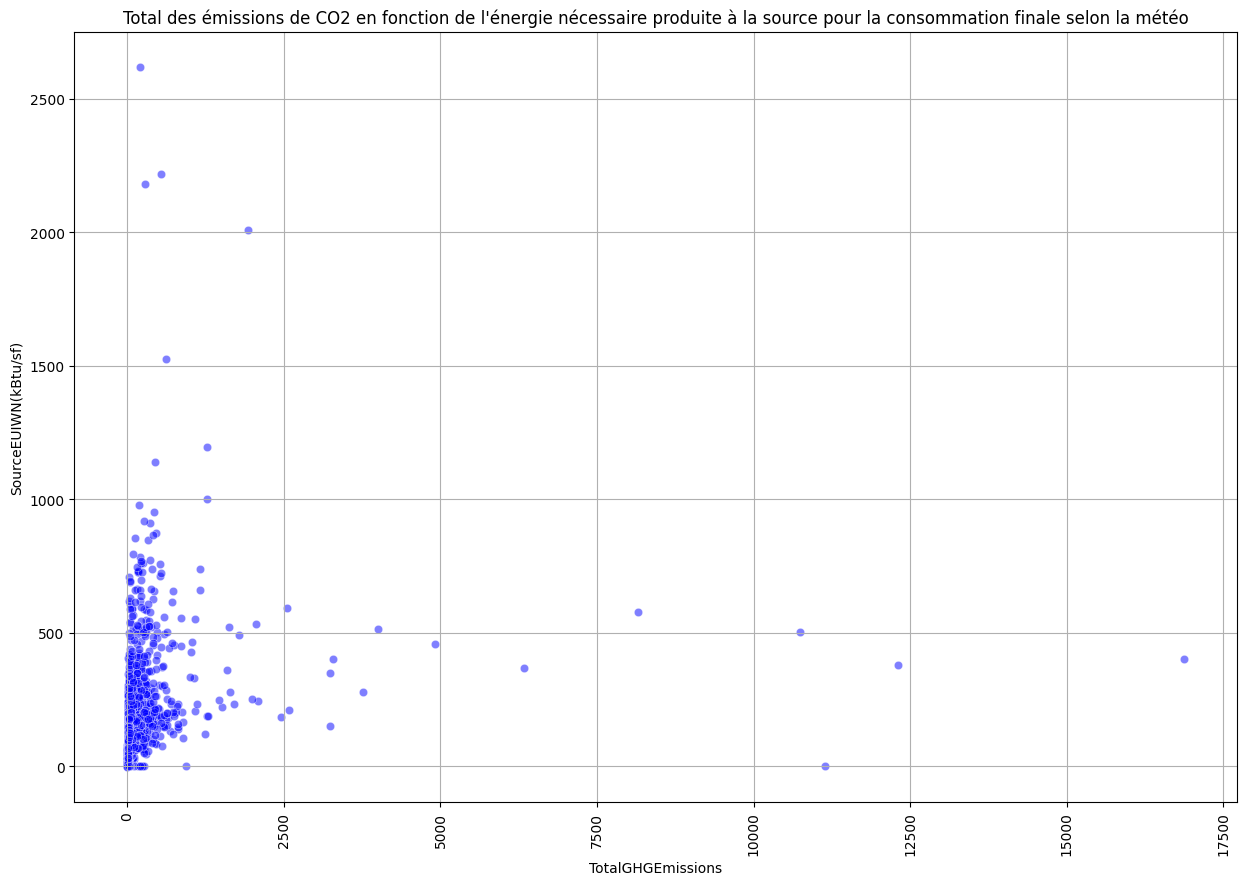

Colonne SourceEUIWN(kBtu/sf)
Q1 = 74.40000153, Q3 = 181.8999939, IQR = 107.49999237
Borne inf = -86.84998702500002, Borne sup = 343.149982455
Nombre d’outliers = 33


array([373.7000122, 372.       , 346.       , 361.6000061, 356.1000061,
       364.5      , 355.       , 388.3999939, 390.7000122, 363.6000061,
       372.7000122, 378.3999939, 357.       , 367.2000122, 377.7999878,
       387.1000061, 390.7999878, 355.       , 364.       , 351.       ,
       382.2999878, 374.5      , 351.2000122, 346.6000061, 358.1000061,
       370.8999939, 349.8999939, 390.7000122, 388.3999939, 378.1000061,
       361.3999939, 369.3999939, 378.7000122])

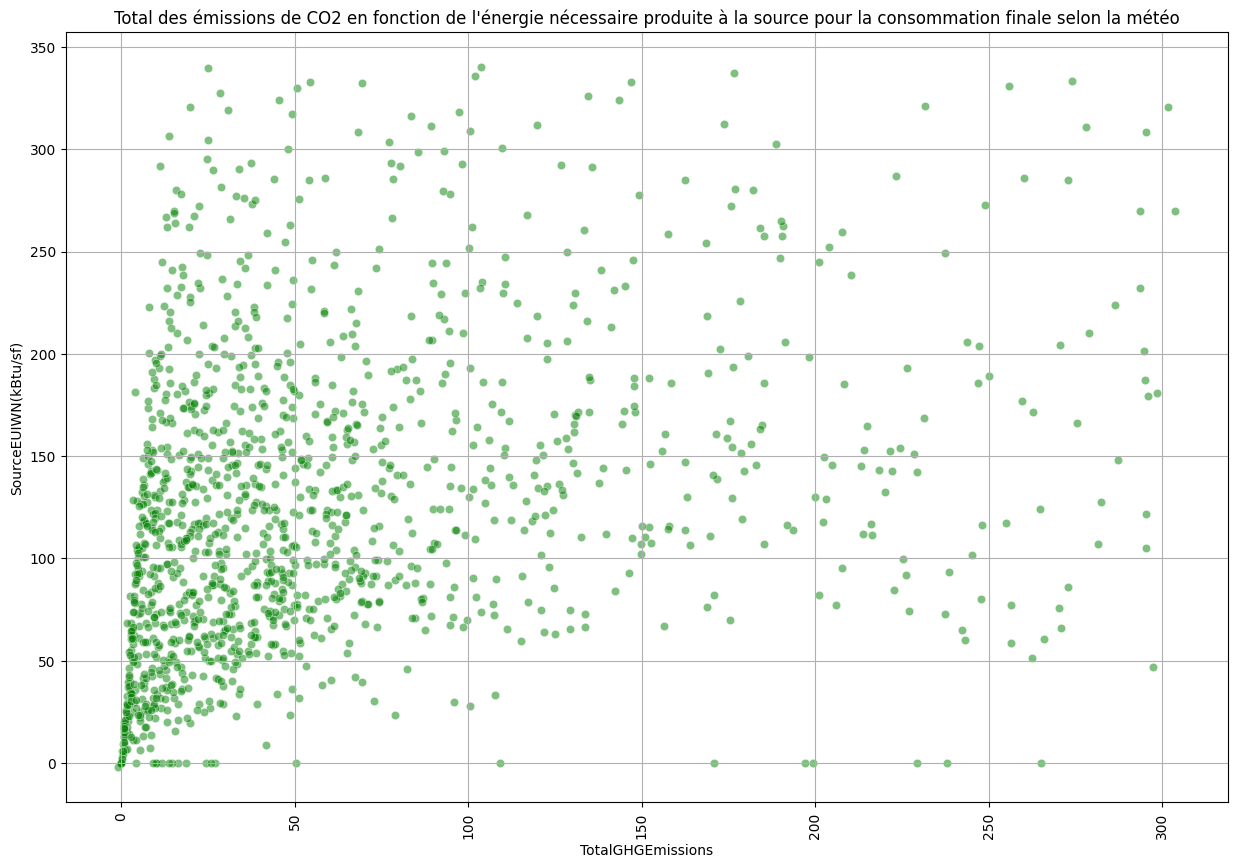

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


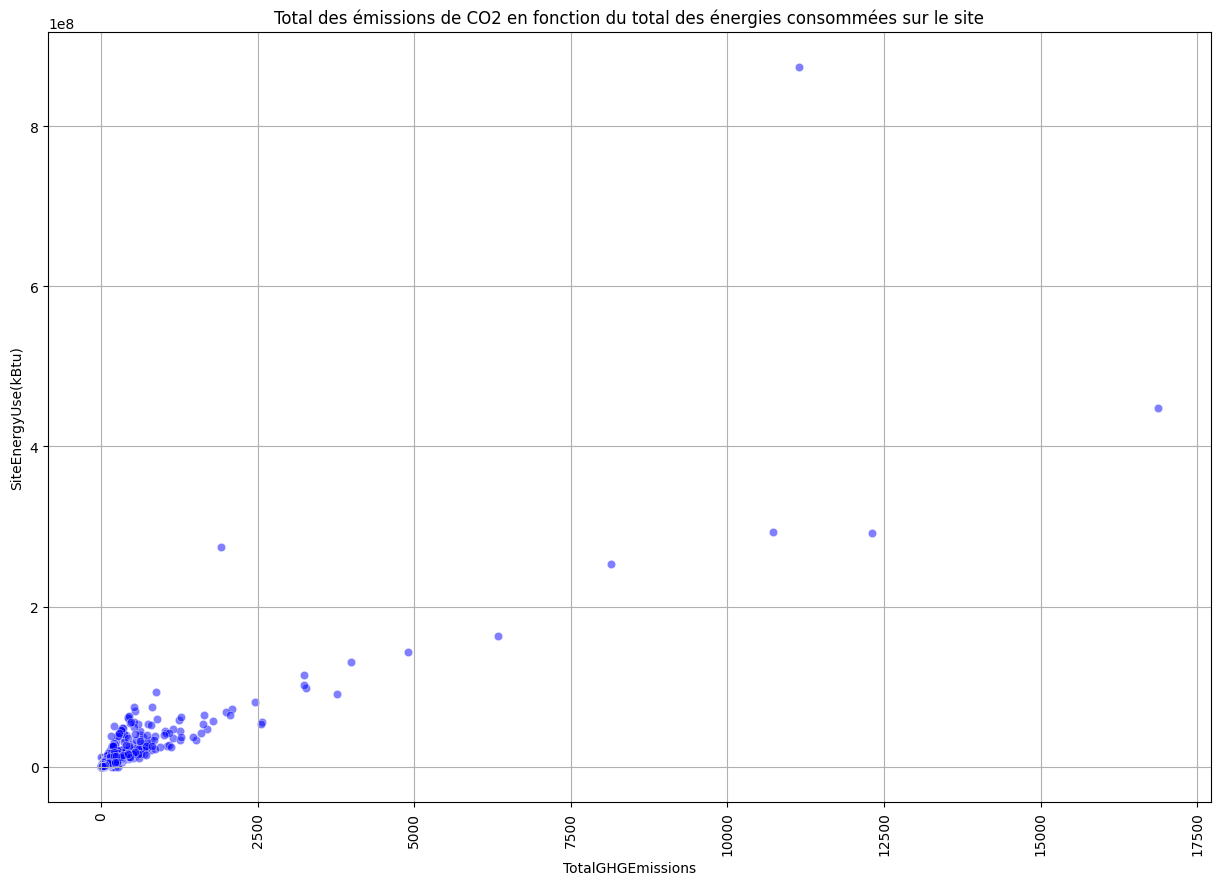

Colonne SiteEnergyUse(kBtu)
Q1 = 1218928.375, Q3 = 6840377.5, IQR = 5621449.125
Borne inf = -7213245.3125, Borne sup = 15272551.1875
Nombre d’outliers = 183


array([7.25870240e+07, 1.60166440e+07, 2.69411100e+07, 2.23253640e+07,
       1.85888600e+07, 3.35567560e+07, 4.49844680e+07, 4.78598120e+07,
       4.48385312e+08, 4.47311600e+07, 1.61631940e+07, 8.04692160e+07,
       1.67010550e+07, 1.54731170e+07, 1.94593040e+07, 2.36589780e+07,
       2.09550260e+07, 3.96058880e+07, 2.07232480e+07, 3.66670440e+07,
       6.80907280e+07, 3.83017440e+07, 1.63198350e+07, 6.53369800e+07,
       2.77170340e+07, 2.53832464e+08, 3.58914840e+07, 5.97574400e+07,
       5.87613040e+07, 5.34666840e+07, 6.50472840e+07, 1.43423024e+08,
       2.93090784e+08, 6.21971760e+07, 2.87315020e+07, 2.54536900e+07,
       2.40177700e+07, 2.66592440e+07, 1.86616060e+07, 2.47550860e+07,
       4.00628880e+07, 4.08477520e+07, 3.09854200e+07, 2.70180200e+07,
       3.95238520e+07, 1.78670020e+07, 1.85769000e+07, 2.49061320e+07,
       4.46836600e+07, 2.46034200e+07, 1.82212240e+07, 4.13995040e+07,
       3.25524280e+07, 4.51633080e+07, 4.12135840e+07, 6.95198080e+07,
      

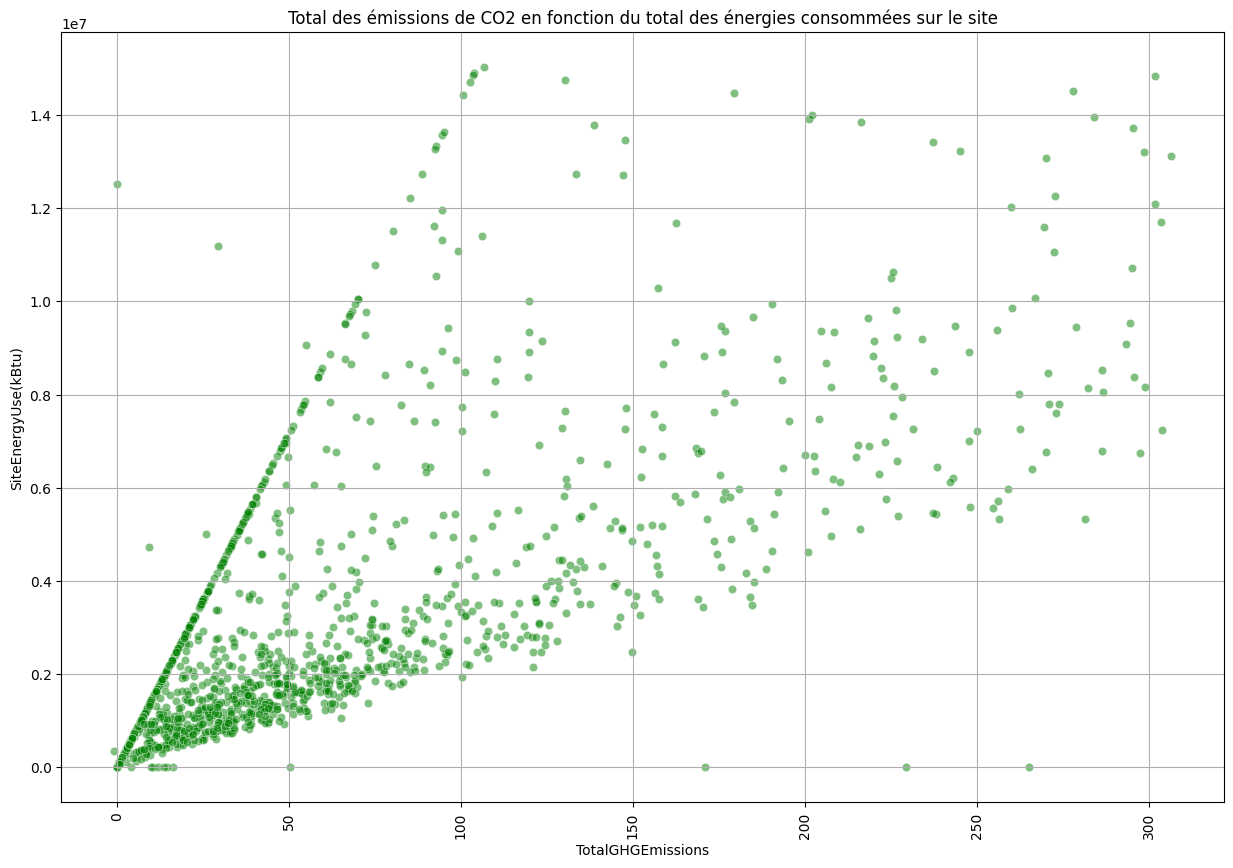

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


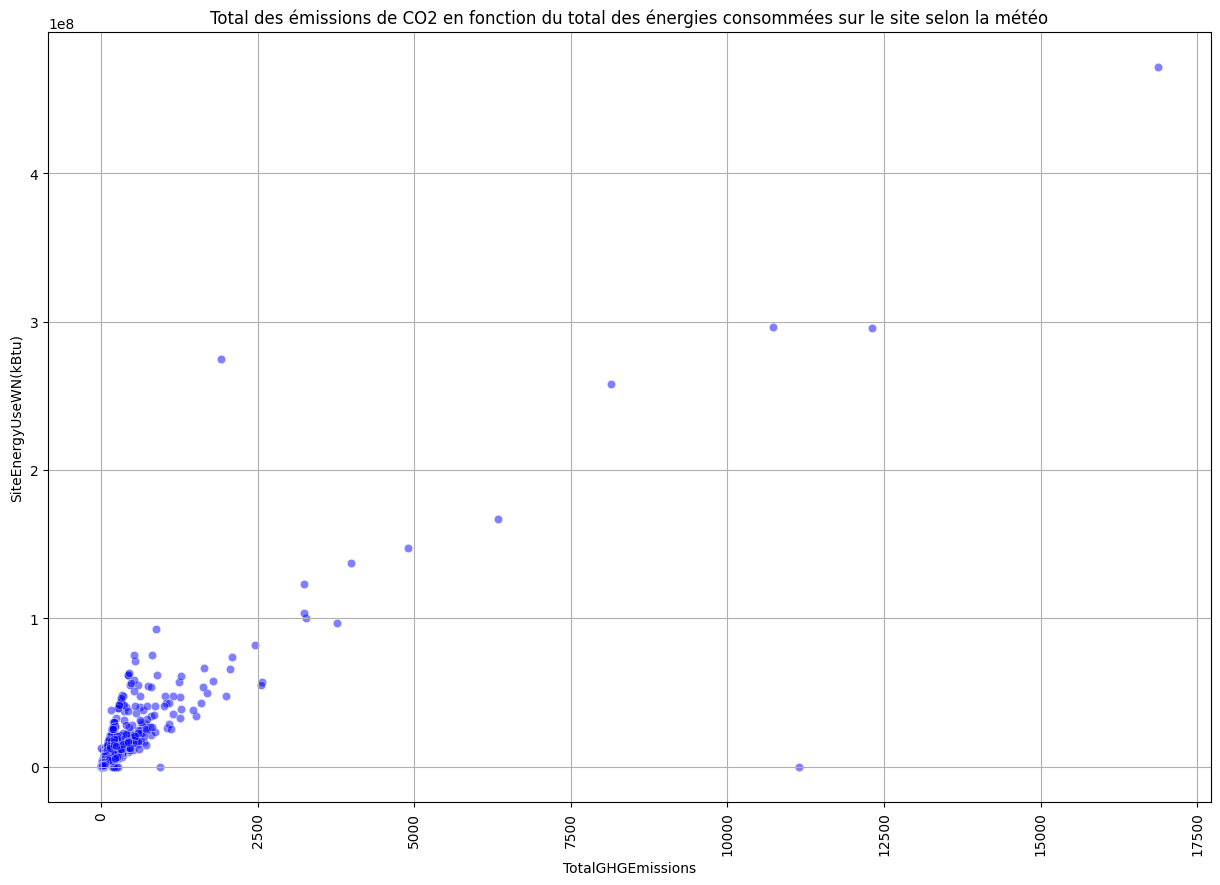

Colonne SiteEnergyUseWN(kBtu)
Q1 = 1180292.625, Q3 = 4902021.875, IQR = 3721729.25
Borne inf = -4402301.25, Borne sup = 10484615.75
Nombre d’outliers = 92


array([14656503., 12581712., 14194054., 11179203., 12183313., 11171407.,
       15683742., 15684371., 13909270., 12870916., 14881950., 14810159.,
       14196194., 13279344., 11754087., 12871628., 10864032., 12616417.,
       11208195., 15230290., 10883874., 13972700., 13862720., 14913424.,
       14736775., 14072349., 12080064., 11792293., 14879755., 13329024.,
       14436982., 14009703., 11672252., 12072969., 11812678., 14843382.,
       11521702., 13827966., 11325513., 15076756., 11311432., 12232124.,
       11854450., 14339818., 13564414., 11348758., 14802479., 15490998.,
       13360349., 12843856., 14856199., 12729858., 10622784., 12289373.,
       12019477., 13568148., 14522162., 10775646., 11077140., 11518169.,
       13631141., 12637976., 12814944., 13961121., 14128860., 11474490.,
       11316338., 11542708., 12512916., 10821972., 14473242., 12559767.,
       14745217., 12869714., 15006878., 13584036., 13473994., 14368231.,
       11943740., 15033874., 14709151., 12581302., 

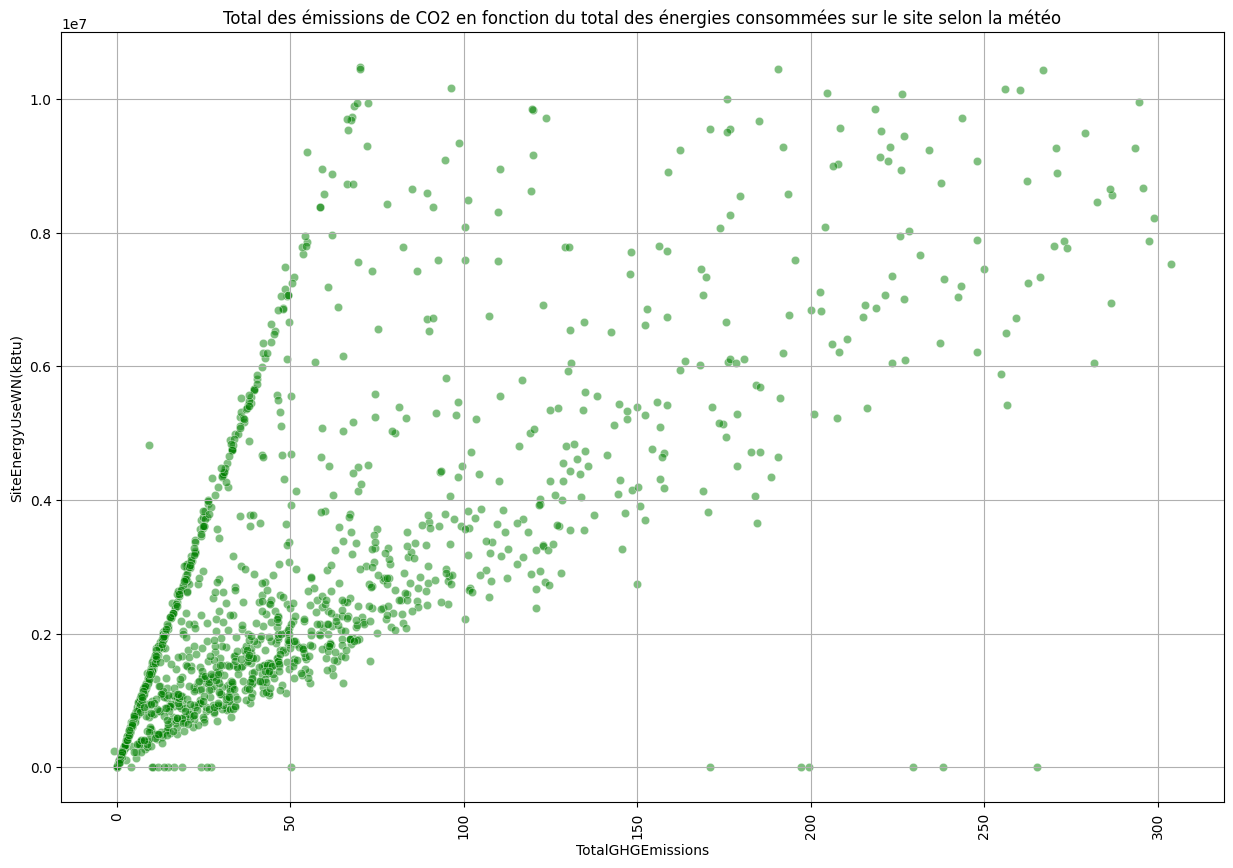

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


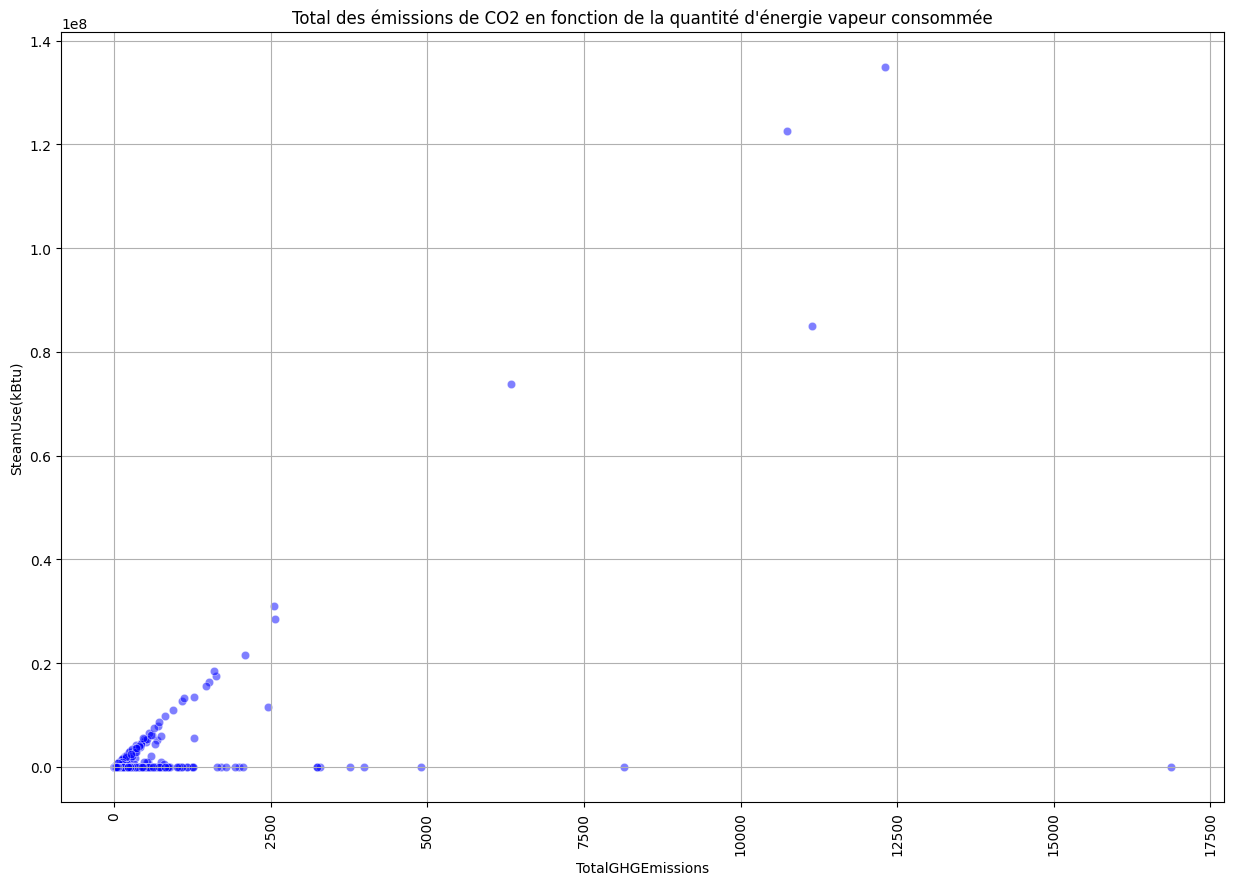

Colonne SteamUse(kBtu)
Q1 = 0.0, Q3 = 0.0, IQR = 0.0
Borne inf = 0.0, Borne sup = 0.0
Nombre d’outliers = 0


array([], dtype=float64)

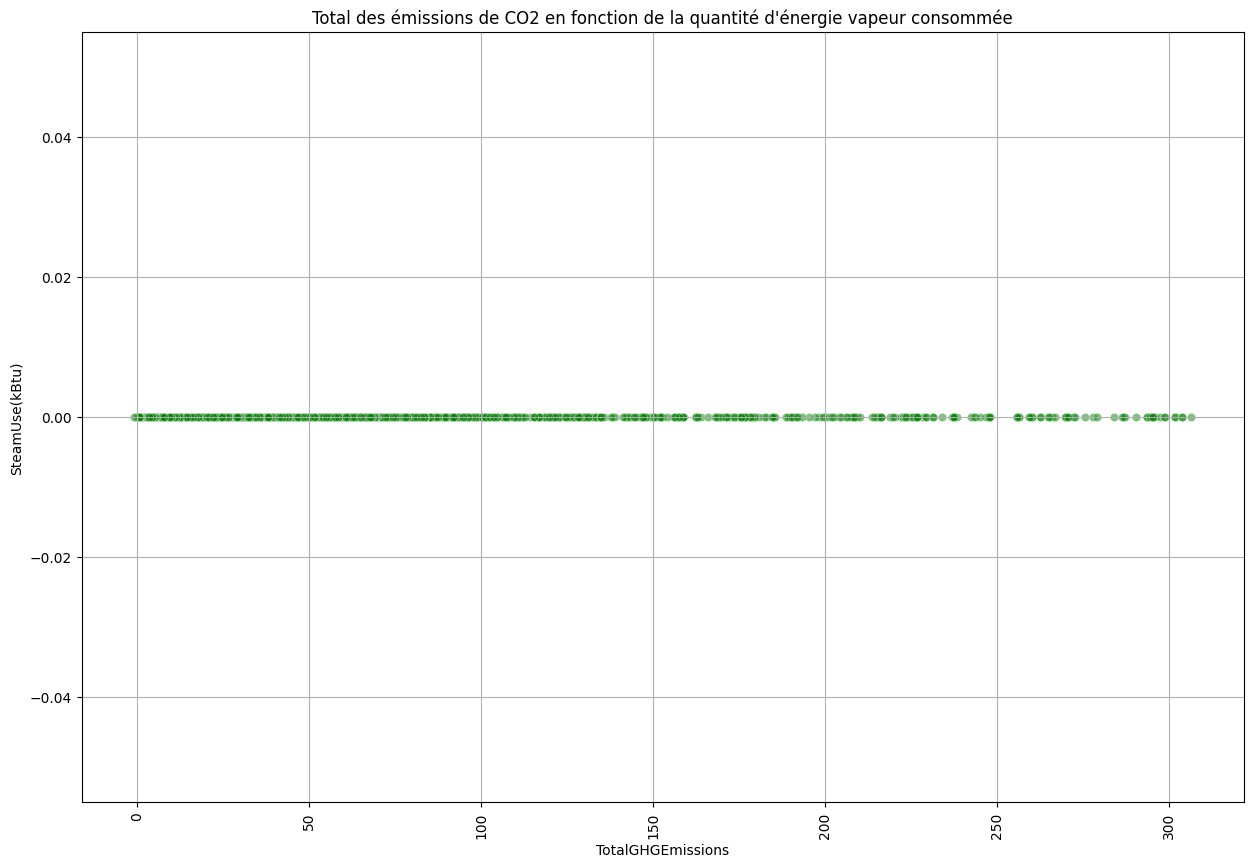

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


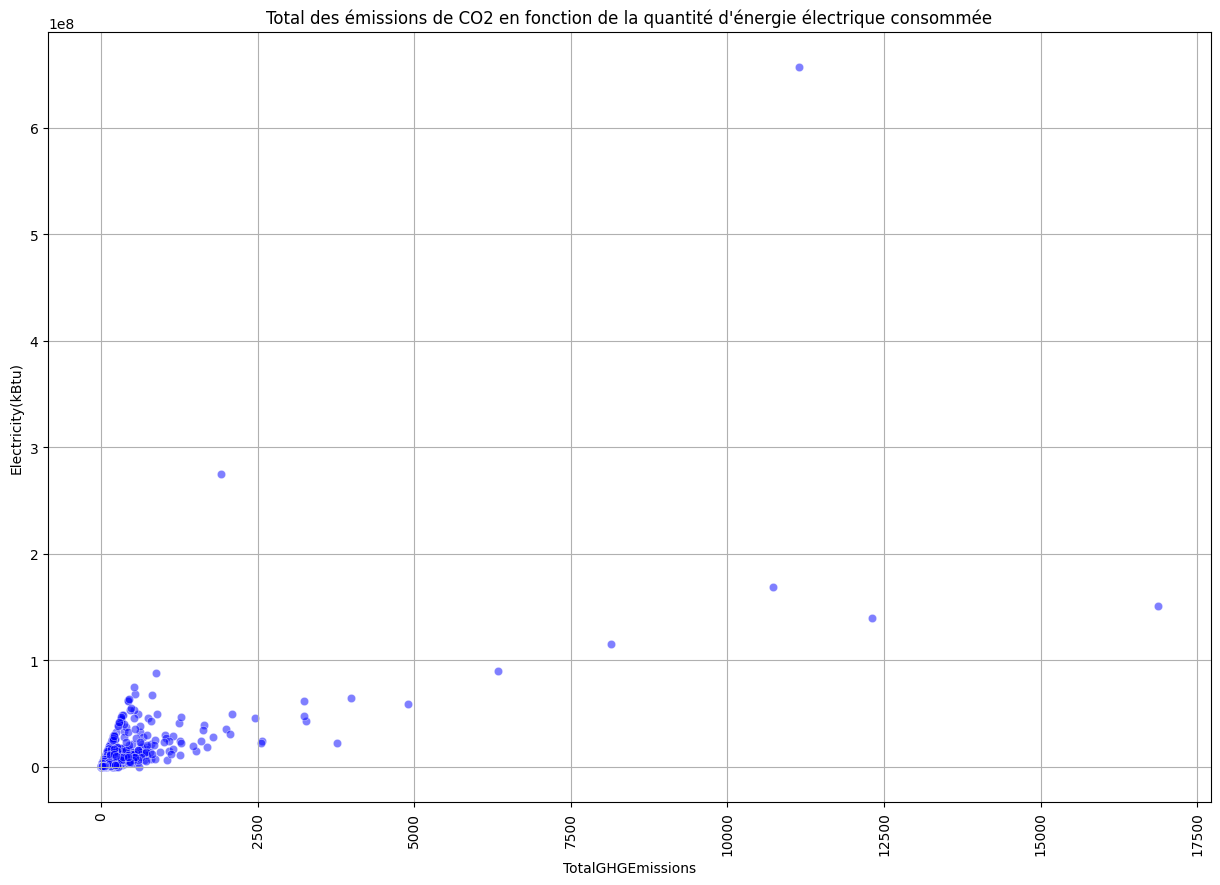

Colonne Electricity(kBtu)
Q1 = 638613.25, Q3 = 3179606.0, IQR = 2540992.75
Borne inf = -3172875.875, Borne sup = 6991095.125
Nombre d’outliers = 102


array([ 7371434.,  7297919.,  9536160.,  9886484., 10145313.,  7252325.,
        9803021.,  7835065.,  8155002.,  8653621.,  7859464.,  8205020.,
        7093984.,  8772104.,  6995246., 10139555.,  7203965., 10534370.,
        9788716.,  8064399., 10062435.,  7486064.,  7301810.,  8738965.,
        7046345.,  9671822.,  7484659.,  8125218.,  9955956.,  9933861.,
        7335905., 10344729.,  7122619.,  7500378.,  7695280.,  7147457.,
        8005293., 10680826.,  7704514., 10307295.,  7836595.,  8116657.,
        7683884., 10708106.,  7637985.,  8493419.,  7956442.,  7877393.,
        7307906.,  8069980.,  8474644.,  9722889.,  8570570.,  8381833.,
        9206777.,  7938248.,  7857972., 10053488.,  7062138.,  8429189.,
        8873484.,  8488392.,  8209260.,  8155743.,  7209495.,  7177346.,
        7802052.,  8704772.,  7873601., 10775645.,  7663584., 10602152.,
        7501894.,  9683978., 10834205.,  9941307.,  7771933.,  9916987.,
        7070998.,  7251588., 10854749.,  7560588., 

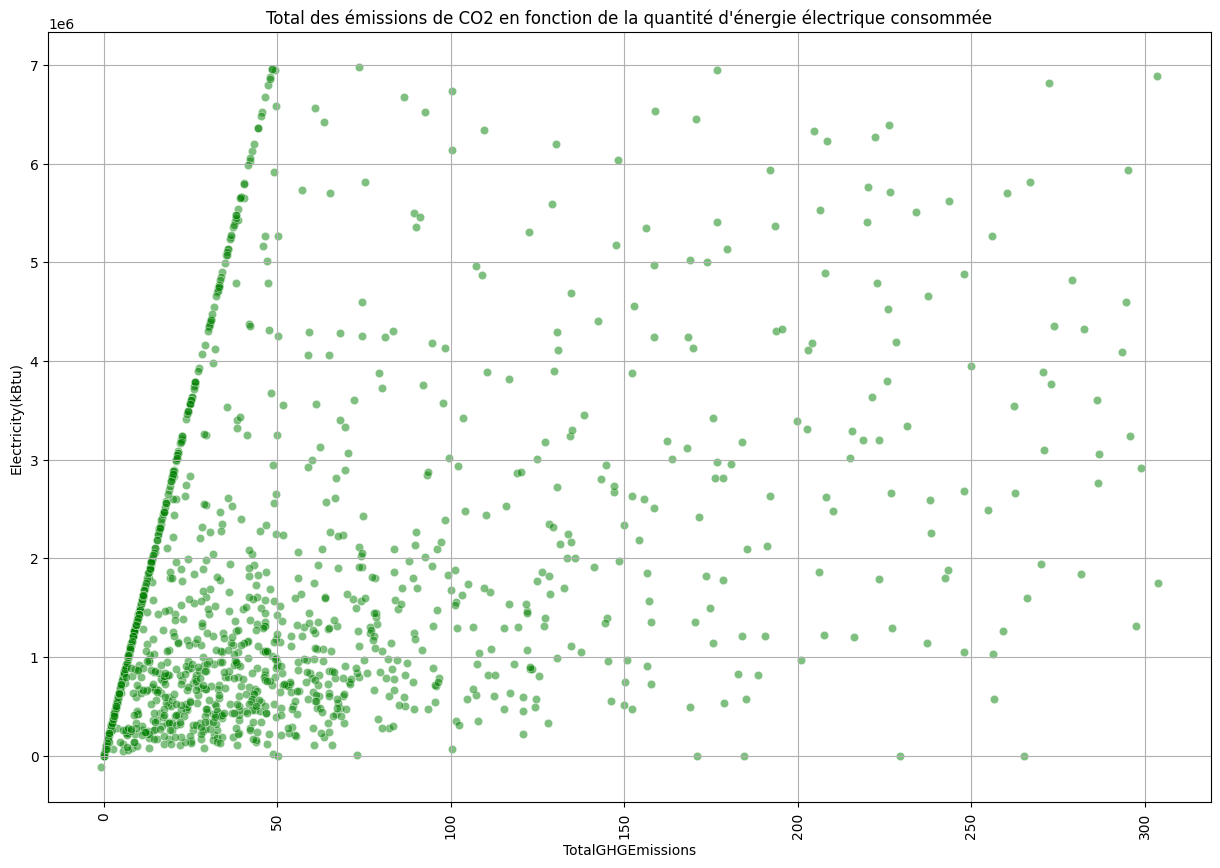

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


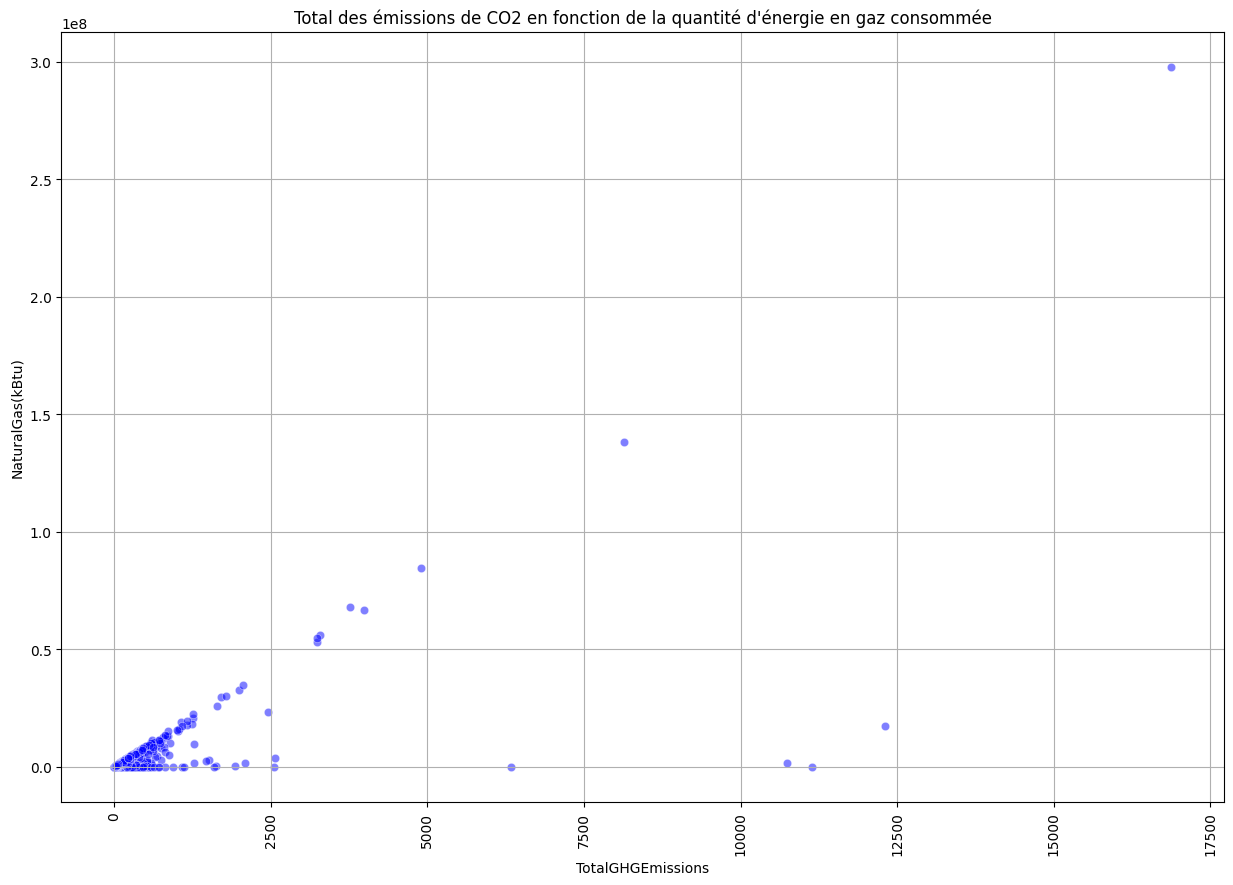

Colonne NaturalGas(kBtu)
Q1 = 0.0, Q3 = 982947.0, IQR = 982947.0
Borne inf = -1474420.5, Borne sup = 2457367.5
Nombre d’outliers = 85


array([2947580., 2858700., 3596705., 2793077., 3652169., 3319078.,
       2639138., 2682920., 2913604., 2518558., 3320669., 3293576.,
       3566039., 3634130., 3217877., 3577277., 3115310., 3270002.,
       2515995., 3294379., 3658577., 3662082., 2544584., 3101477.,
       2594878., 2706578., 2866705., 2938070., 2548999., 2520230.,
       2689958., 3424670., 3116783., 3025227., 2629800., 3016015.,
       2590279., 3129241., 2615822., 3635421., 2667680., 2713055.,
       3111684., 2500035., 2653559., 2615949., 3381491., 3412276.,
       3444604., 3633594., 2938397., 2874465., 3272098., 3332616.,
       3390579., 2752785., 3283070., 3626753., 2614450., 3108958.,
       3475801., 2707389., 3297197., 3091218., 2751028., 2988397.,
       3431110., 3154333., 2802474., 3426052., 3519045., 2659447.,
       3030034., 3159194., 2729901., 2826262., 2618093., 2936020.,
       2548619., 2656210., 2854748., 2835888., 2542771., 3313279.,
       2873052.])

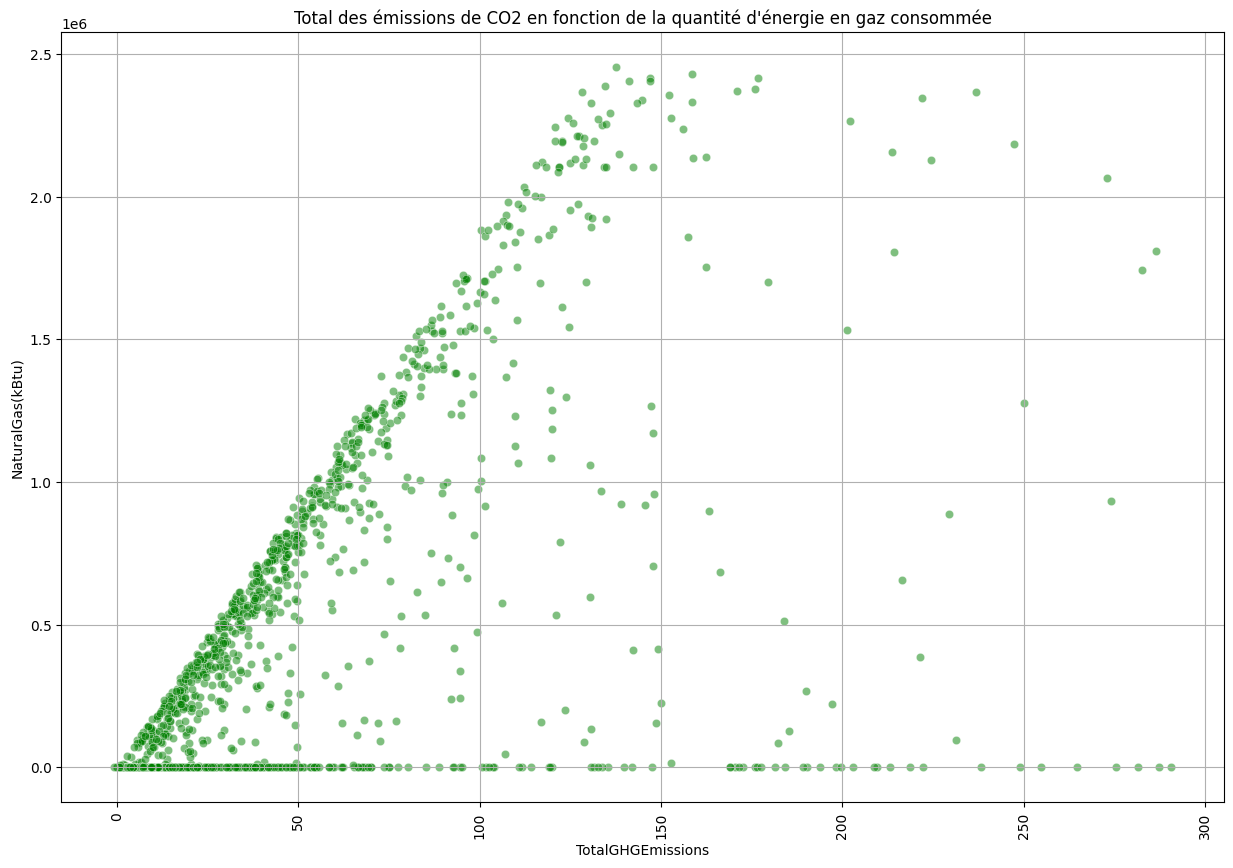

Colonne GHGEmissionsIntensity - Colonne TotalGHGEmissions


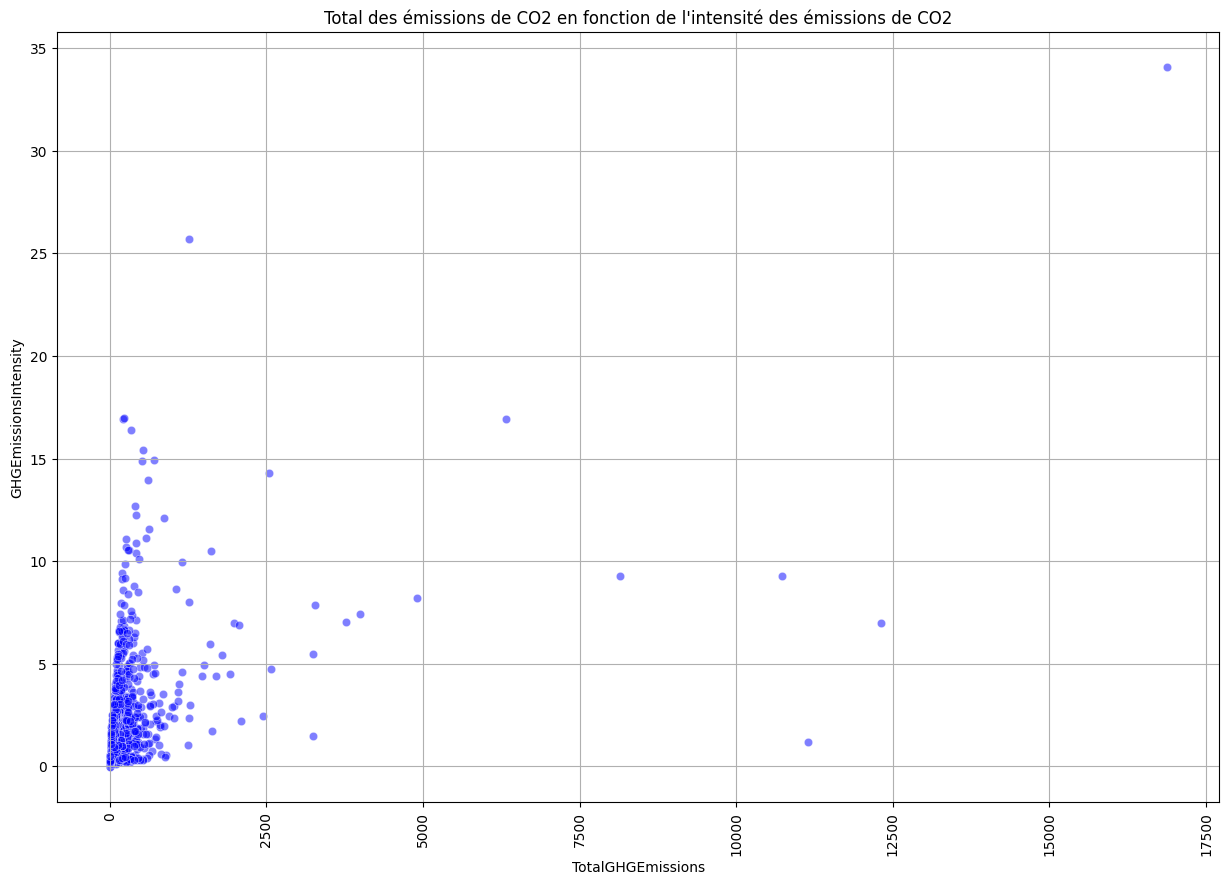

Colonne GHGEmissionsIntensity
Q1 = 0.32, Q3 = 1.49, IQR = 1.17
Borne inf = -1.4349999999999998, Borne sup = 3.245
Nombre d’outliers = 57


array([3.35, 3.43, 3.77, 3.82, 3.48, 3.64, 3.62, 3.52, 3.4 , 3.64, 3.7 ,
       3.32, 3.4 , 3.38, 3.85, 4.03, 3.42, 3.34, 3.7 , 3.65, 3.69, 3.77,
       3.93, 3.3 , 3.49, 3.27, 4.14, 3.98, 3.27, 4.1 , 3.32, 3.68, 4.04,
       3.65, 4.01, 3.26, 4.02, 3.29, 3.51, 3.99, 3.46, 4.06, 3.25, 3.61,
       4.02, 3.98, 3.67, 3.28, 3.88, 4.15, 3.75, 3.71, 3.73, 3.81, 3.98,
       3.31, 3.29])

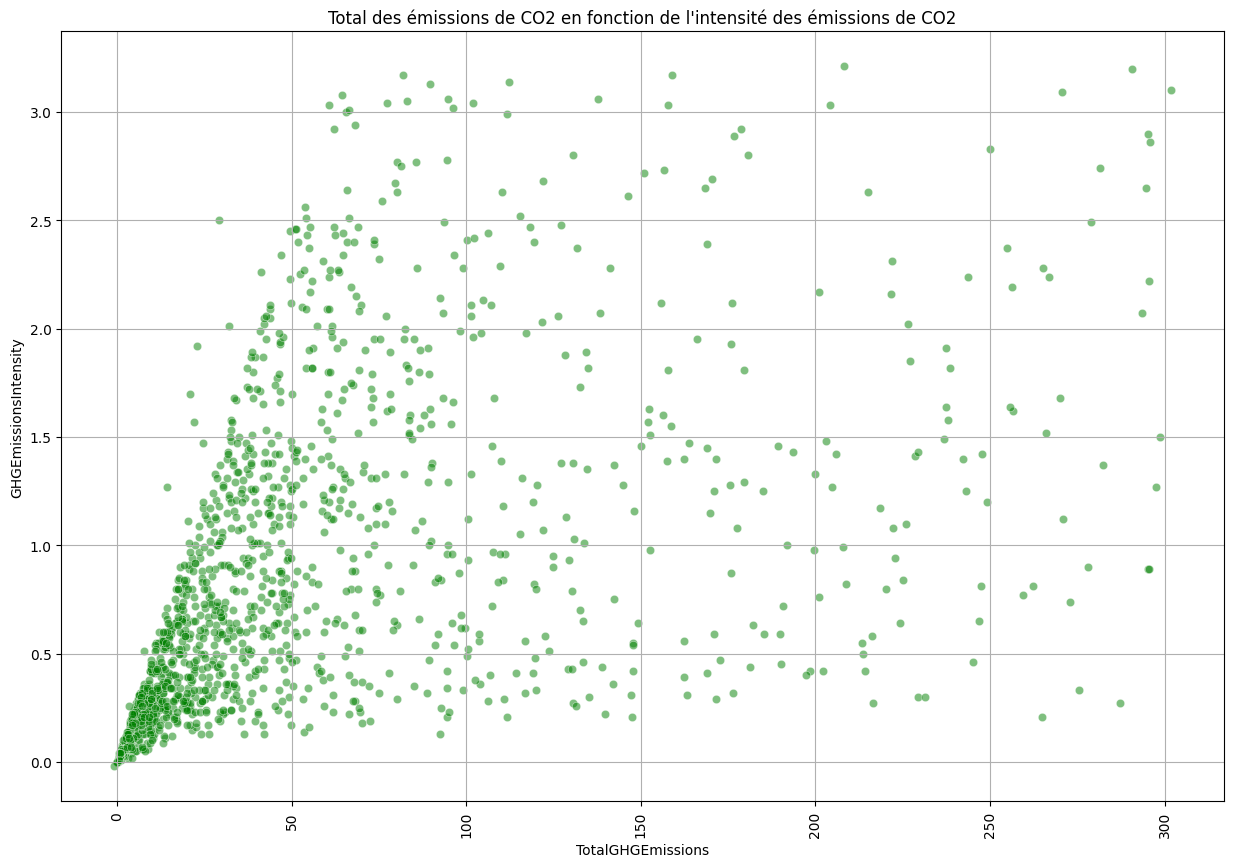

In [198]:
colmuns_to_verified = {
    "Latitude": "de la latitude",
    "Longitude": "de la longitude",
    "NumberofFloors": "du nombre d'étage",
    "PropertyGFATotal": "de la superficie totale de la propriété",
    "PropertyGFAParking": "de la superficie du parking",
    "PropertyGFABuilding(s)": "de la superficie de la zone habitable (batiments hors parking)",
    "LargestPropertyUseTypeGFA": "de la superficie de la zone dédiée à l'usage principal fait du batiment",
    "SiteEUI(kBtu/sf)": "de l'énergie consommée par le batiment",
    "SiteEUIWN(kBtu/sf)": "de l'énergie consommée par le batiment selon la météo",
    "SourceEUI(kBtu/sf)": "de l'énergie nécessaire produite à la source pour la consommation finale",
    "SourceEUIWN(kBtu/sf)": "de l'énergie nécessaire produite à la source pour la consommation finale selon la météo",
    "SiteEnergyUse(kBtu)": "du total des énergies consommées sur le site",
    "SiteEnergyUseWN(kBtu)": "du total des énergies consommées sur le site selon la météo",
    "SteamUse(kBtu)": "de la quantité d'énergie vapeur consommée",
    "Electricity(kBtu)": "de la quantité d'énergie électrique consommée",
    "NaturalGas(kBtu)": "de la quantité d'énergie en gaz consommée",
    "TotalGHGEmissions": "du total des émissions de CO2",
    "GHGEmissionsIntensity": "de l'intensité des émissions de CO2"
}

predict_variables = {
    "SiteEnergyUse(kBtu)": "Consommation totale d'énergie",
    "TotalGHGEmissions": "Total des émissions de CO2",
}

for predict_variable, meaning in predict_variables.items():
    print(f"\n------------------------------- {meaning} ------------------------------- \n")
    for key, value in colmuns_to_verified.items():
        if key != predict_variable:
            print(f"Colonne {column} - Colonne {predict_variable}")
            utils.make_plot(building_consumption, {
                "x":predict_variable,
                "y":key,
                "title": f"{meaning} en fonction {value}",
                "grid": True,
                "color": "blue",
                "alpha": 0.5,
            }, type="scatterplot")
            
            #Détection des outliers et remplacement par NaN
            outliers = utils.outlier_detect_iqr(building_consumption_copy, key)
            outliers_values = outliers[key].values
            display(outliers_values)
            building_consumption_copy.loc[building_consumption_copy[key].isin(outliers_values), key] = np.nan
            utils.make_plot(building_consumption_copy, {
                "x":predict_variable,
                "y":key,
                "title": f"{meaning} en fonction {value}",
                "grid": True,
                "color": "green",
                "alpha": 0.5
            }, type="scatterplot")





#### EMISSSIONS DE CO2

# Modélisation 

### Import des modules 

In [22]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


ModuleNotFoundError: No module named 'sklearn'

### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [38]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [1]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE